<div style="background-color: #D2E3C8; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Global Power Plant Database</b>
 </div>

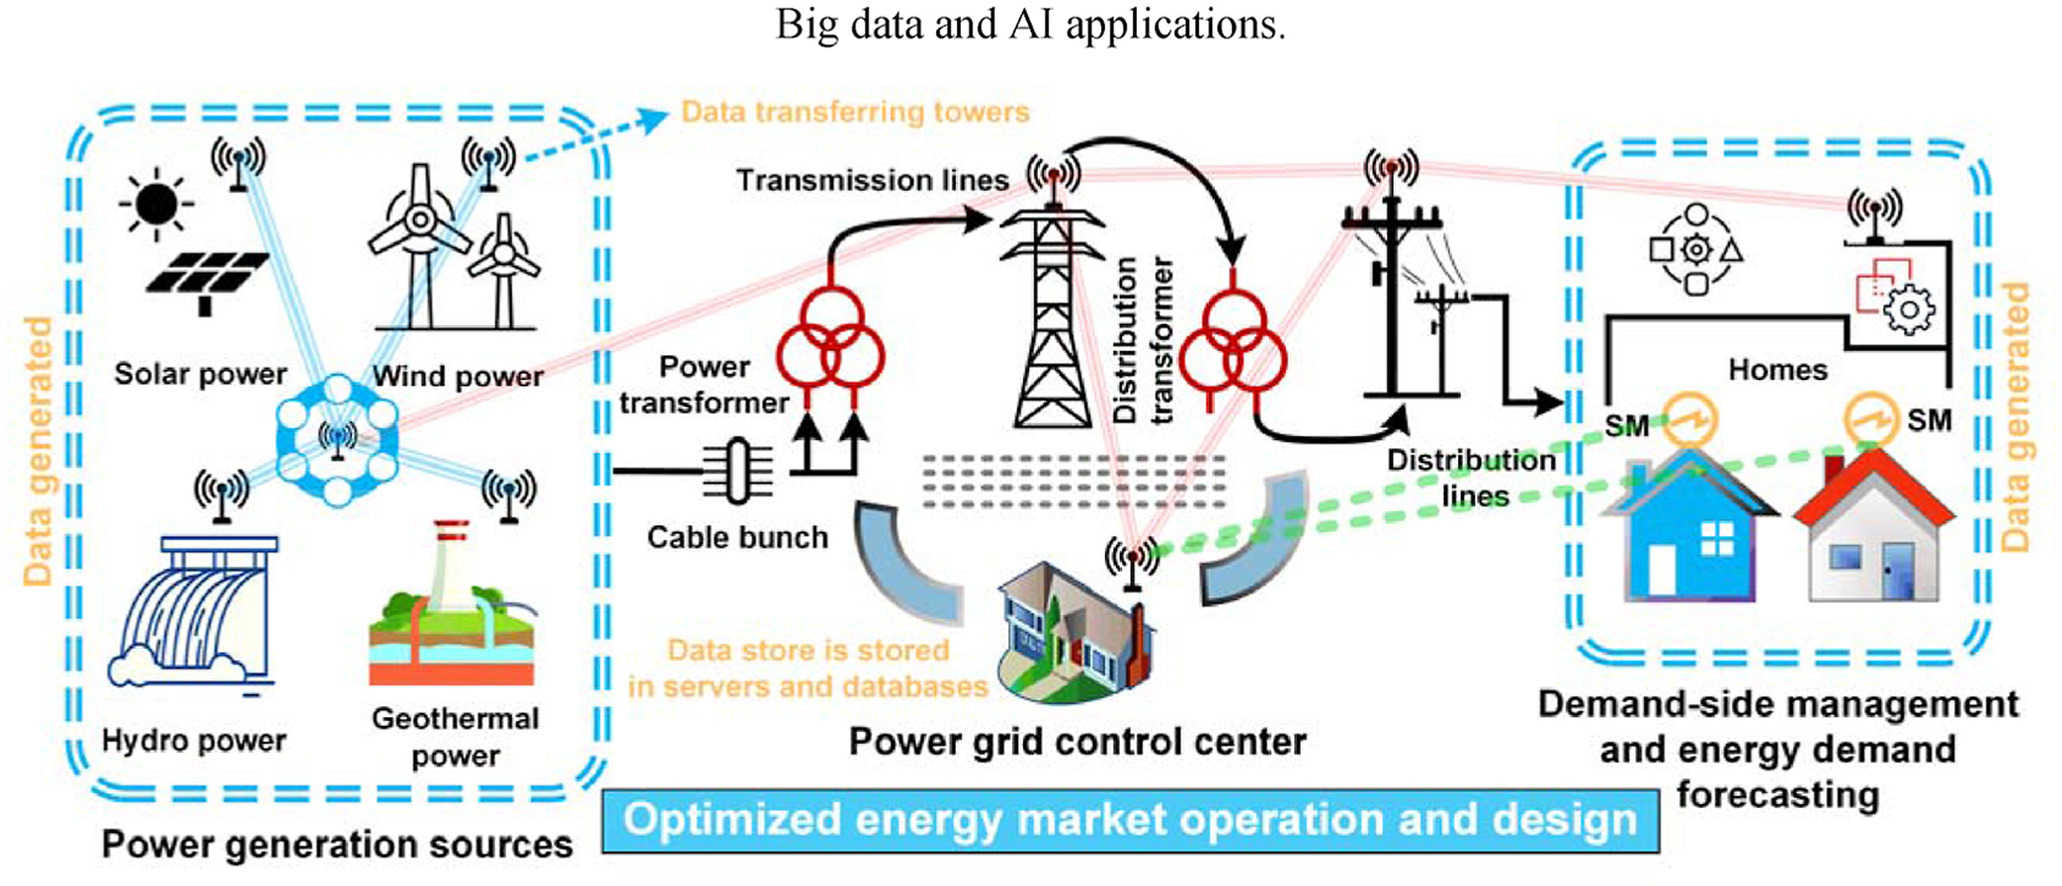

### **Project Description:**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one's own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### **Key attributes of the database:**

The database includes the following indicators:

**`country` (text):** 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

**`country_long` (text):** longer form of the country designation

**`name` (text): name** or title of the power plant, generally in Romanized form

**`gppd_idnr` (text):**10 or 12 character identifier for the power plant

**`capacity_mw` (number):** electrical generating capacity in megawatts

**`latitude` (number):**geolocation in decimal degrees; WGS84 (EPSG:4326)

**`longitude` (number):**geolocation in decimal degrees; WGS84 (EPSG:4326)

**`primary_fuel` (text):** energy source used in primary electricity generation or export

**`other_fuel1` (text):** energy source used in electricity generation or export

**`other_fuel2` (text):** energy source used in electricity generation or export

**`other_fuel3` (text):** energy source used in electricity generation or export

**`commissioning_year` (number):** year of plant operation, weighted by unit-capacity when data is available

**`owner` (text):** majority shareholder of the power plant, generally in Romanized form

**`source` (text):**entity reporting the data; could be an organization, report, or document, generally in Romanized form

**`url` (text):** web document corresponding to the `source` field

**`geolocation_source` (text):** attribution for geolocation information

**`wepp_id` (text):** a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

**`year_of_capacity_data` (number):** year the capacity information was reported

**`generation_gwh_2013` (number):** electricity generation in gigawatt-hours reported for the year 2013

**`generation_gwh_2014` (number):**electricity generation in gigawatt-hours reported for the year 2014

**`generation_gwh_2015` (number):** electricity generation in gigawatt-hours reported for the year 2015

**`generation_gwh_2016` (number):** electricity generation in gigawatt-hours reported for the year 2016

**`generation_gwh_2017` (number):** electricity generation in gigawatt-hours reported for the year 2017

**`generation_gwh_2018` (number):** electricity generation in gigawatt-hours reported for the year 2018

**`generation_gwh_2019` (number):** electricity generation in gigawatt-hours reported for the year 2019

**`generation_data_source` (text):** attribution for the reported generation information

**`estimated_generation_gwh_2013` (number):** estimated electricity generation in gigawatt-hours for the year 2013

**`estimated_generation_gwh_2014` (number):** estimated electricity generation in gigawatt-hours for the year 2014

**`estimated_generation_gwh_2015`(number):**  estimated electricity generation in gigawatt-hours for the year 2015

**`estimated_generation_gwh_2016` (number):** estimated electricity generation in gigawatt-hours for the year 2016

**`estimated_generation_gwh_2017` (number):** estimated electricity generation in gigawatt-hours for the year 2017

**'estimated_generation_note_2013` (text):** label of the model/method used to estimate generation for the year 2013

**`estimated_generation_note_2014`(text):**  label of the model/method used to estimate generation for the year 2014

**`estimated_generation_note_2015` (text):** label of the model/method used to estimate generation for the year 2015

**`estimated_generation_note_2016` (text):** label of the model/method used to estimate generation for the year 2016

**`estimated_generation_note_2017` (text):** label of the model/method used to estimate generation for the year 2017

**Fuel Type Aggregation:-**

We define the "Fuel Type" attribute of our database based on common fuel categories.

**Prediction :**   Make two prediction  **1) Primary Fuel  2) capacity_mw**


**Dataset Link-**

•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv




<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Importing Essential Libraries</b>
</div>

In [ ]:
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
import seaborn as sns # Statistical Data Visualization
import matplotlib.pyplot as plt  # Plotting
# Inline plotting in the notebook environment
%matplotlib inline

import missingno as msno  #Visualizing Missing Data
import warnings  # Suppressing warnings
warnings.filterwarnings("ignore")  # Ignore warnings
from scipy import stats #Statistical Analysis Library

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
import copy
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

# Data Preprocessing
from scipy.stats import zscore  # Z-Score transformation
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder  # Data preprocessing tools
from imblearn.over_sampling import SMOTE  # Over-sampling for imbalanced datasets


# Statistical Analysis
import scipy.stats as stats  # Statistical functions and tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # Detect multicollinearity with VIF


# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score,
    precision_score, recall_score, f1_score
)

# Classification Models
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Regression Models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, ExtraTreesRegressor
)
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [ ]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [ ]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [ ]:
df.sample()

country country_long                           name   gppd_idnr  \
610     IND        India  Pokhran THE Solar Power Plant  WRI1026184   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
610        100.0   26.7874    72.0099        Solar         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
610  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
610                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  generation_data_source  \
610                  NaN                  NaN                     NaN   

     estimated_generation_gwh  
610                       NaN  

[1 rows x 27 columns]

### Comprehensive  Overview  for  Dataset

**Features/Attributes:**

> **Country (text):** A 3-character country code following ISO 3166-1 alpha-3.

> **Country_long (text):** The full country name.

> **Name (text):** Name or title of the power plant, typically in Romanized form.

> **Gppd_idnr (text):** A 10 or 12-character identifier for the power plant.

> **Capacity_mw (number):** The electrical generating capacity in megawatts.

> **Latitude (number):** Geolocation in decimal degrees, using WGS84 (EPSG:4326).

> **Longitude (number):** Geolocation in decimal degrees, using WGS84 (EPSG:4326).

> **Primary_fuel (text):** The primary energy source used for electricity generation or export.

> **Other_fuel1 (text):** An additional energy source used in electricity generation.

> **Other_fuel2 (text):** Another energy source used in electricity generation.

> **Other_fuel2 (text):** Another energy source used in electricity generation.

> **Other_fuel3 (text):** A third energy source used in electricity generation.

> **Commissioning_year (number):** The year of plant operation, weighted by unit capacity when data is available.

> **Owner (text):** The majority shareholder of the power plant, often in Romanized form.

> **Source (text):** The entity reporting the data, which could be an organization, report, or document, generally in Romanized form.

> **URL (text):** The web document corresponding to the source field.

> **Geolocation_source (text):** Attribution for geolocation information.

> **Wepp_id (text):** A reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

> **Year_of_capacity_data (number):** The year the capacity information was reported.

> **Generation_gwh_2013 to Generation_gwh_2019 (number):** Electricity generation in gigawatt-hours reported for each respective year.

> **Generation_data_source (text):** Attribution for the reported generation information.

> **Estimated_generation_gwh_2013 to Estimated_generation_gwh_2017 (number):** Estimated electricity generation in gigawatt-hours for each respective year.

> **Estimated_generation_note_2013 to Estimated_generation_note_2017 (text)**: Label of the model/method used to estimate generation for each respective year.

**Label/Target:**

> **Condition :** The dataset can be seen in two angles to find the Primary Fuel and find the capacity_mw.

**The dependent variables in this context are represented by the columns 'primary_fuel' and 'capacity_mw'.**




> **Objective 1:** The primary objective is to work with the continuous data for column **"Primary Fuel"** as the target variable. Considering the categorical nature of the 'Primary fuel' variable, our approach involves employing classification techniques to make predictions. Classification is particularly useful when the goal is to assign data points to predefined categories or classes, enabling us to determine the primary fuel source category."



> **Objective 2:** The Secondary target variable is **"Capacity_mw"** which contains continuous data. With respect to the continuous data found in 'capacity_mw,' we will turn to regression methodologies for predictive modeling. Regression is a valuable tool when our aim is to forecast numerical values, making it the method of choice for estimating the continuous variable, such as the electrical generating capacity ('capacity_mw') of power plants."




**I will validate my dataset assumptions by conducting comprehensive exploratory data analysis, utilizing data visualizations, and performing various analytical processes to confirm my understanding.**


**workflow instructions:** The preliminary exploratory data analysis (EDA) will be nearly identical for both tasks. As a result, we will initiate the process with EDA, complete it, proceed to Objective 1, and subsequently move on to Objective 2."

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

In [ ]:
shape_tuple = df.shape
print(f"Number of Rows: {shape_tuple[0]}, Number of Columns: {shape_tuple[1]}")

Number of Rows: 907, Number of Columns: 27


In [ ]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [ ]:
len(df.columns)

27

In [ ]:
column_series = pd.Series(df.columns)
column_series

0                      country
1                 country_long
2                         name
3                    gppd_idnr
4                  capacity_mw
5                     latitude
6                    longitude
7                 primary_fuel
8                  other_fuel1
9                  other_fuel2
10                 other_fuel3
11          commissioning_year
12                       owner
13                      source
14                         url
15          geolocation_source
16                     wepp_id
17       year_of_capacity_data
18         generation_gwh_2013
19         generation_gwh_2014
20         generation_gwh_2015
21         generation_gwh_2016
22         generation_gwh_2017
23         generation_gwh_2018
24         generation_gwh_2019
25      generation_data_source
26    estimated_generation_gwh
dtype: object

In [ ]:
#The column numbering begins at zero, with a total of 27 columns indexed from 0 to 26.
for counter, (column, dtype) in enumerate(df.dtypes.items()):
    print(f"Column{counter}: '{column}' has data type: {dtype}")

Column0: 'country' has data type: object
Column1: 'country_long' has data type: object
Column2: 'name' has data type: object
Column3: 'gppd_idnr' has data type: object
Column4: 'capacity_mw' has data type: float64
Column5: 'latitude' has data type: float64
Column6: 'longitude' has data type: float64
Column7: 'primary_fuel' has data type: object
Column8: 'other_fuel1' has data type: object
Column9: 'other_fuel2' has data type: object
Column10: 'other_fuel3' has data type: float64
Column11: 'commissioning_year' has data type: float64
Column12: 'owner' has data type: object
Column13: 'source' has data type: object
Column14: 'url' has data type: object
Column15: 'geolocation_source' has data type: object
Column16: 'wepp_id' has data type: float64
Column17: 'year_of_capacity_data' has data type: float64
Column18: 'generation_gwh_2013' has data type: float64
Column19: 'generation_gwh_2014' has data type: float64
Column20: 'generation_gwh_2015' has data type: float64
Column21: 'generation_gwh

In [ ]:
# Categorizes columns based on data types

df.columns.to_series().groupby(df.dtypes).groups

{float64: ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh'], object: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']}


> The columns designated as 'float64' denote columns that hold floating-point numeric data, while those labeled as 'object' signify columns that store text or string data.

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Descriptive Statistical Summary</b>
</div>

In [ ]:
df.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

> * The 'capacity_mw' column is the only one with a complete count of 907 values, while all other columns, both discrete and continuous, contain missing values.

> * There seems to be a slight deviation in the difference between the third quartile and the maximum value in the 'longitude' column, indicating potential skewness in that column.

> * The 'other_fuel3' column contains exclusively missing values and should be removed from the dataset before creating a model.

> * The 'wepp_id' column also consists entirely of missing values and should be excluded from the dataset for model development.

> * The 'year_of_capacity_data' column contains a constant value throughout the dataset and should be dropped before model creation.

> * In columns 'generation_gwh_2013' through 'generation_gwh_2017,' the mean value is less than the standard deviation, suggesting significant data deviation, potential outliers, and skewness. These columns also contain a minimum value of 0, which should be addressed before creating a model.

> * The 'estimated_generation_gwh' column exclusively contains missing values and should be dropped from the dataset.

**I will carefully review these observations and make the necessary adjustments, including the removal of columns based on further investigation.**

In [ ]:
# summary statistics for non-numeric columns
df.describe(exclude=[np.number])

country country_long              name   gppd_idnr primary_fuel  \
count      907          907               907         907          907   
unique       1            1               907         907            8   
top        IND        India  ACME Solar Tower  WRI1020239         Coal   
freq       907          907                 1           1          258   

       other_fuel1 other_fuel2        owner                         source  \
count          198           1          342                            907   
unique           3           1          280                            191   
top            Oil         Oil  Acc Acc ltd  Central Electricity Authority   
freq           195           1            4                            519   

                           url geolocation_source  \
count                      907                888   
unique                     304                  3   
top     http://www.cea.nic.in/                WRI   
freq                       519                765   

               generation_data_source  
count                             449  
unique                              1  
top     Central Electricity Authority  
freq                              449

**Country Information:**

> * All 907 records are associated with India (IND).
> * The long-form country name for all records is "India."

**Power Plant Names and IDs:**

> * There are 907 unique power plant names, indicating no repetition.
> * Each power plant has a distinct identifier (gppd_idnr).

**Primary Fuel Types:**

> * "Coal" is the most common primary fuel, appearing 258 times among the power plants.

**Data Sources and Owners:**

> * There are multiple data sources (191) and owners (280) for the power plants.
> * The most common data source is "Central Electricity Authority," with 519 occurrences.
> * The most frequent owner is "Acc Acc Ltd," with 4 occurrences.

**Additional Fuel Information:**

Other fuel columns ('other_fuel1' and 'other_fuel2') have limited non-missing values, with 'Oil' being the most common fuel type in 'other_fuel1' (195 occurrences).


<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Checking Duplicate & Null Values</b>
</div>

In [ ]:
# Checking the duplicate values
df.duplicated().sum()

0

**The dataset does not contain any duplicate values.**

In [ ]:
# Checking the null values
df.isna()

country  country_long   name  gppd_idnr  capacity_mw  latitude  \
0      False         False  False      False        False     False   
1      False         False  False      False        False     False   
2      False         False  False      False        False     False   
3      False         False  False      False        False     False   
4      False         False  False      False        False     False   
..       ...           ...    ...        ...          ...       ...   
902    False         False  False      False        False     False   
903    False         False  False      False        False     False   
904    False         False  False      False        False     False   
905    False         False  False      False        False     False   
906    False         False  False      False        False     False   

     longitude  primary_fuel  other_fuel1  other_fuel2  ...  \
0        False         False         True         True  ...   
1        False         False         True         True  ...   
2        False         False         True         True  ...   
3        False         False         True         True  ...   
4        False         False        False         True  ...   
..         ...           ...          ...          ...  ...   
902      False         False        False         True  ...   
903      False         False         True         True  ...   
904      False         False         True         True  ...   
905      False         False         True         True  ...   
906      False         False         True         True  ...   

     year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     True                 True                 True   
1                     True                 True                 True   
2                     True                 True                 True   
3                    False                 True                False   
4                    False                 True                False   
..                     ...                  ...                  ...   
902                  False                 True                 True   
903                   True                 True                 True   
904                   True                 True                 True   
905                   True                 True                 True   
906                   True                 True                 True   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                   True                 True                 True   
1                   True                 True                 True   
2                   True                 True                 True   
3                  False                False                False   
4                  False                False                False   
..                   ...                  ...                  ...   
902                False                False                False   
903                 True                 True                 True   
904                 True                 True                 True   
905                 True                 True                 True   
906                 True                 True                 True   

     generation_gwh_2018  generation_gwh_2019  generation_data_source  \
0                   True                 True                    True   
1                   True                 True                    True   
2                   True                 True                    True   
3                  False                 True                   False   
4                  False                 True                   False   
..                   ...                  ...                     ...   
902                False                 True                   False   
903                 True                 True                    True   
904                 True        

In [ ]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

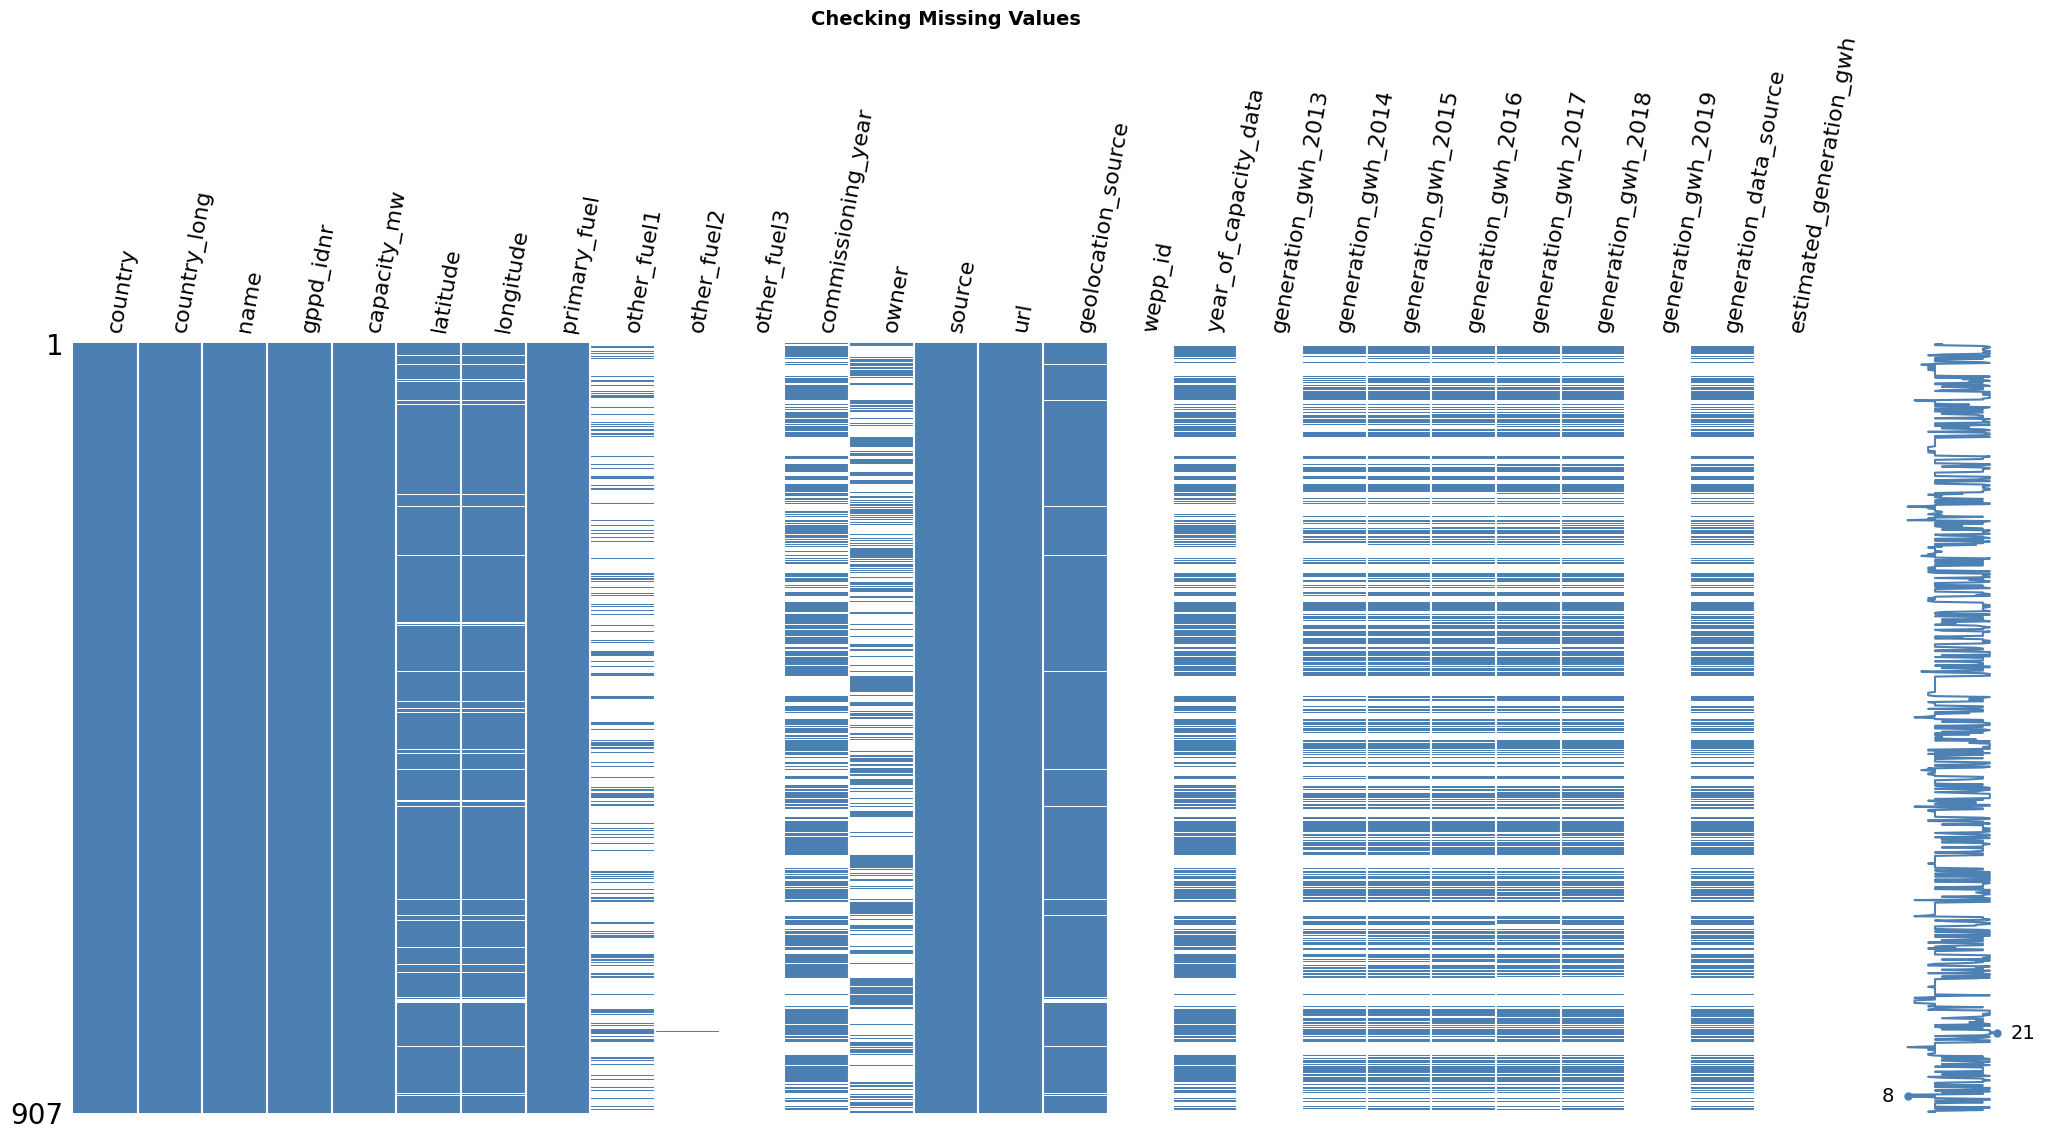

In [ ]:
# Visiualizing missing data in DataFrame
msno.matrix(df, color=( 0.3, 0.5, 0.7))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=80)
plt.show()

In [ ]:
columns_with_missing_values = [column for column in df.columns if df[column].isna().any()]

print(columns_with_missing_values)

['latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh']


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100

print(null_percentage)

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

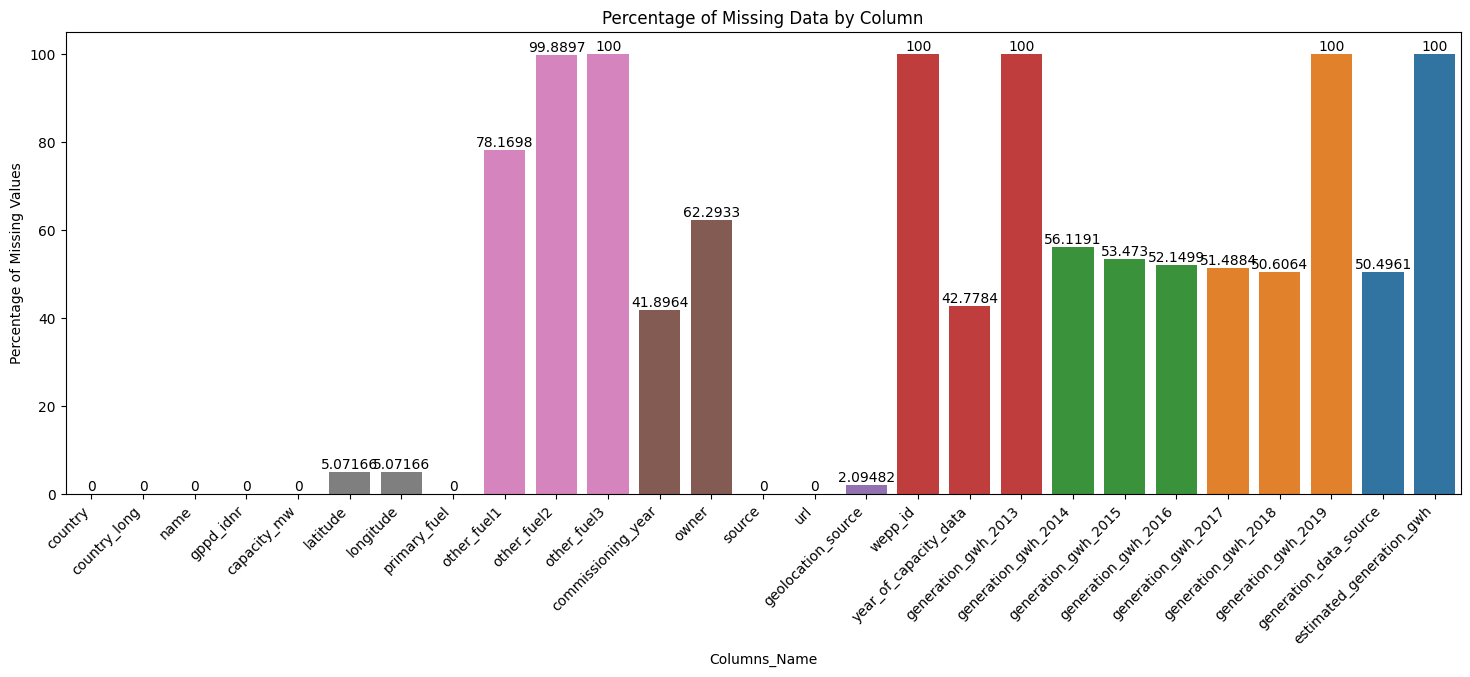

In [ ]:
# Create a bar plot to visualize missing data
plt.figure(figsize=(18, 6))
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="tab10_r")
for i in ax.containers:
    ax.bar_label(i)
ax.set(xlabel='Columns_Name', ylabel='Percentage of Missing Values')
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right',rotation=45)
ax.set_title("Percentage of Missing Data by Column")
plt.show()


> The following columns exhibit Null Values that require rectification:-

   **'latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'and  'estimated_generation_gwh'.**

> It is worth noting that a significant number of columns have missing data that exceeds 40%, and in some instances, it surpasses 95%. Consequently, these
columns may be deemed inconsequential for further analysis. **Therefore, we will remove the columns where data loss exceeds 95%.**

> **Both target variables are free of missing values.**

### **To address the problem of missing values in the dataset, let's employ the relevant technique tailored to the characteristics of each column.**

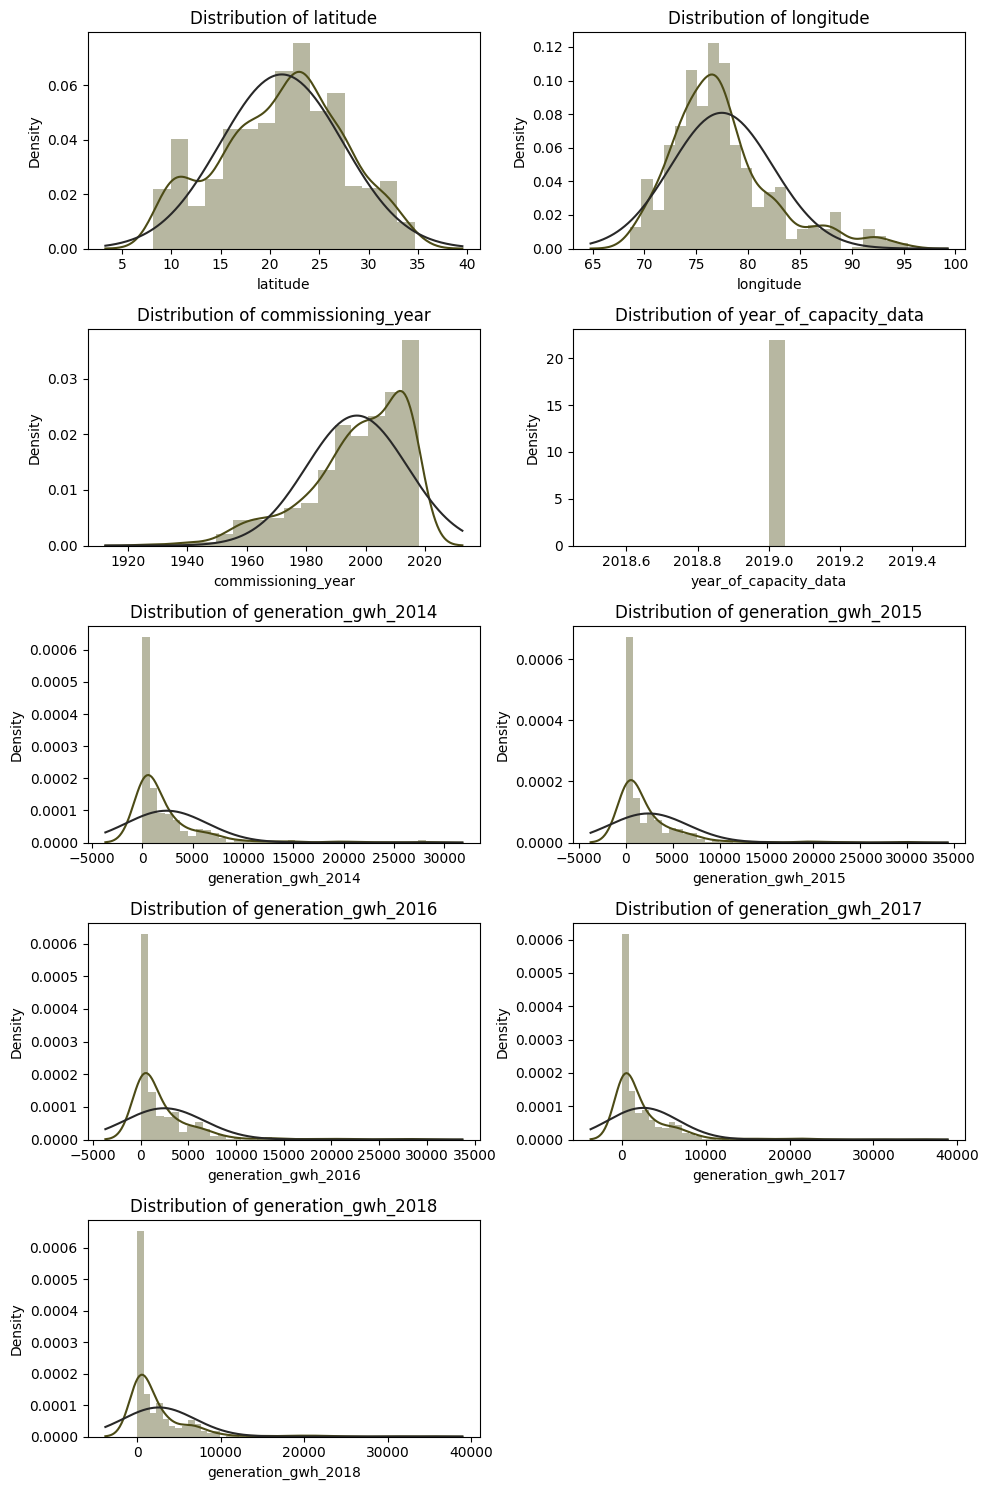

In [ ]:
# Let's visualize all the missing numerical columns
columns = ["latitude", "longitude", "commissioning_year", "year_of_capacity_data", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]

# Determine the number of rows for subplots
num_cols = len(columns)
num_rows = (num_cols // 2) + (num_cols % 2)

# Create the subplot
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 15))

# Flatten the axes array
axes = axes.ravel()

# Loop through each column in the list
for i, col in enumerate(columns):
    sns.distplot(df[col], fit=stats.norm, color='#4C4B16', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for i in range(num_cols, num_rows*2):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Addressing missing data through the fillna method, with consideration for individual column requirements by utilizing mean, median, and mode as necessary.**

### **Mean:-**

In [ ]:
# missing filling values with average: as latitude data's are approximately normally distributed and doesn't have significant outliers.
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
print(df["latitude"].mean())

21.1979181184669


### **Median:-**

In [ ]:
# Fill with column's middle value : as it is a robust imputation method, especially when the data is skewed or contains outliers. It's often used for numerical data.
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
print(df["longitude"].median())

76.7195


In [ ]:
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
print(df["commissioning_year"].median())

2001.0


In [ ]:
df["year_of_capacity_data"] = df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].median())
print(df["year_of_capacity_data"].median())

2019.0


In [ ]:
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
print(df["year_of_capacity_data"].median())

2019.0


In [ ]:
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
print(df["generation_gwh_2015"].median())

711.181225


In [ ]:
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
print(df["generation_gwh_2016"].median())

737.20545


In [ ]:
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
print(df["generation_gwh_2016"].median())

737.20545


In [ ]:
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())
print(df["generation_gwh_2018"].median())

751.6443750000001


### **Mode:-**

In [ ]:
# Fill with most frequent value: is typically used for categorical (discrete) data, such as strings or categories.
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
print(df["other_fuel1"].mode())

0    Oil
Name: other_fuel1, dtype: object


In [ ]:
df["owner"] = df["owner"].fillna(df["owner"].mode()[0])
print(df["owner"].mode())

0    Acc Acc ltd
Name: owner, dtype: object


In [ ]:
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
print(df["geolocation_source"].mode())

0    WRI
Name: geolocation_source, dtype: object


**I will remove columns with data loss over 95% as well as those deemed irrelevant.**

In [ ]:
# Taking the data loss scenario within the dataset into account, it is important to define a threshold value.
threshold = 95
# Find columns with data loss exceeding the threshold
columns_with_high_data_loss = null_percentage[null_percentage > threshold].index

# Segregate the data into two DataFrames: one with high data loss and one without
data_with_high_data_loss = df[columns_with_high_data_loss]
data_without_high_data_loss = df.drop(columns=columns_with_high_data_loss)

# Display the columns with high data loss
print("\033[1mColumns with more than 95% data loss:\033[0m\n")
print('Length :', len(columns_with_high_data_loss),columns_with_high_data_loss)

Columns with more than 95% data loss:

Length : 6 Index(['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013',
       'generation_gwh_2019', 'estimated_generation_gwh'],
      dtype='object')


In [ ]:
# Discarding unnecessary columns : data loss more than 95% and irrevalent column:  'generation_data_source'(Removed due to significant missing data for accurate target variable analysis)

df.drop(columns=['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013','generation_gwh_2019', 'estimated_generation_gwh', 'generation_data_source'], axis=1, inplace=True)
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407        Solar         Oil              2011.0   
1   24.7663    74.6090         Coal         Oil              2001.0   
2   21.9038    69.3732         Wind         Oil              2001.0   
3   23.8712    91.3602          Gas         Oil              2004.0   
4   21.9603    82.4091         Coal         Oil              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3           Acc Acc ltd         Central Electricity Authority   
4           Acc Acc ltd         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0           817.977250           751.644375  
1           817.977250           751.644375  
2           817.977250           751.644375  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [ ]:
df.shape

(907, 20)

<Axes: >

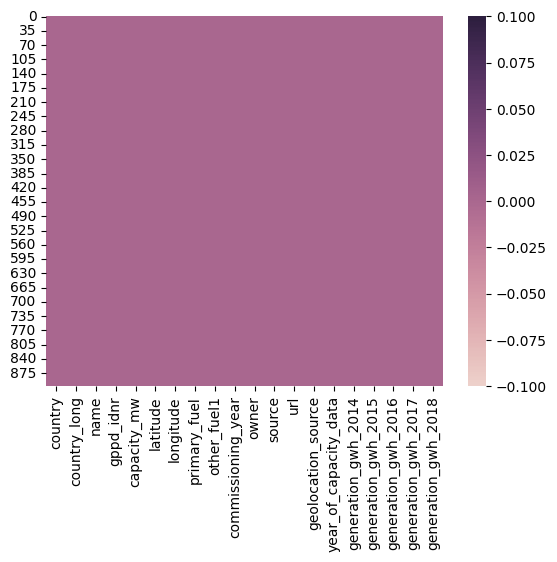

In [ ]:
sns.heatmap(df.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))

**All columns have no null values, and irrelevant columns have been removed.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                907 non-null    object 
 1   country_long           907 non-null    object 
 2   name                   907 non-null    object 
 3   gppd_idnr              907 non-null    object 
 4   capacity_mw            907 non-null    float64
 5   latitude               907 non-null    float64
 6   longitude              907 non-null    float64
 7   primary_fuel           907 non-null    object 
 8   other_fuel1            907 non-null    object 
 9   commissioning_year     907 non-null    float64
 10  owner                  907 non-null    object 
 11  source                 907 non-null    object 
 12  url                    907 non-null    object 
 13  geolocation_source     907 non-null    object 
 14  year_of_capacity_data  907 non-null    float64
 15  genera

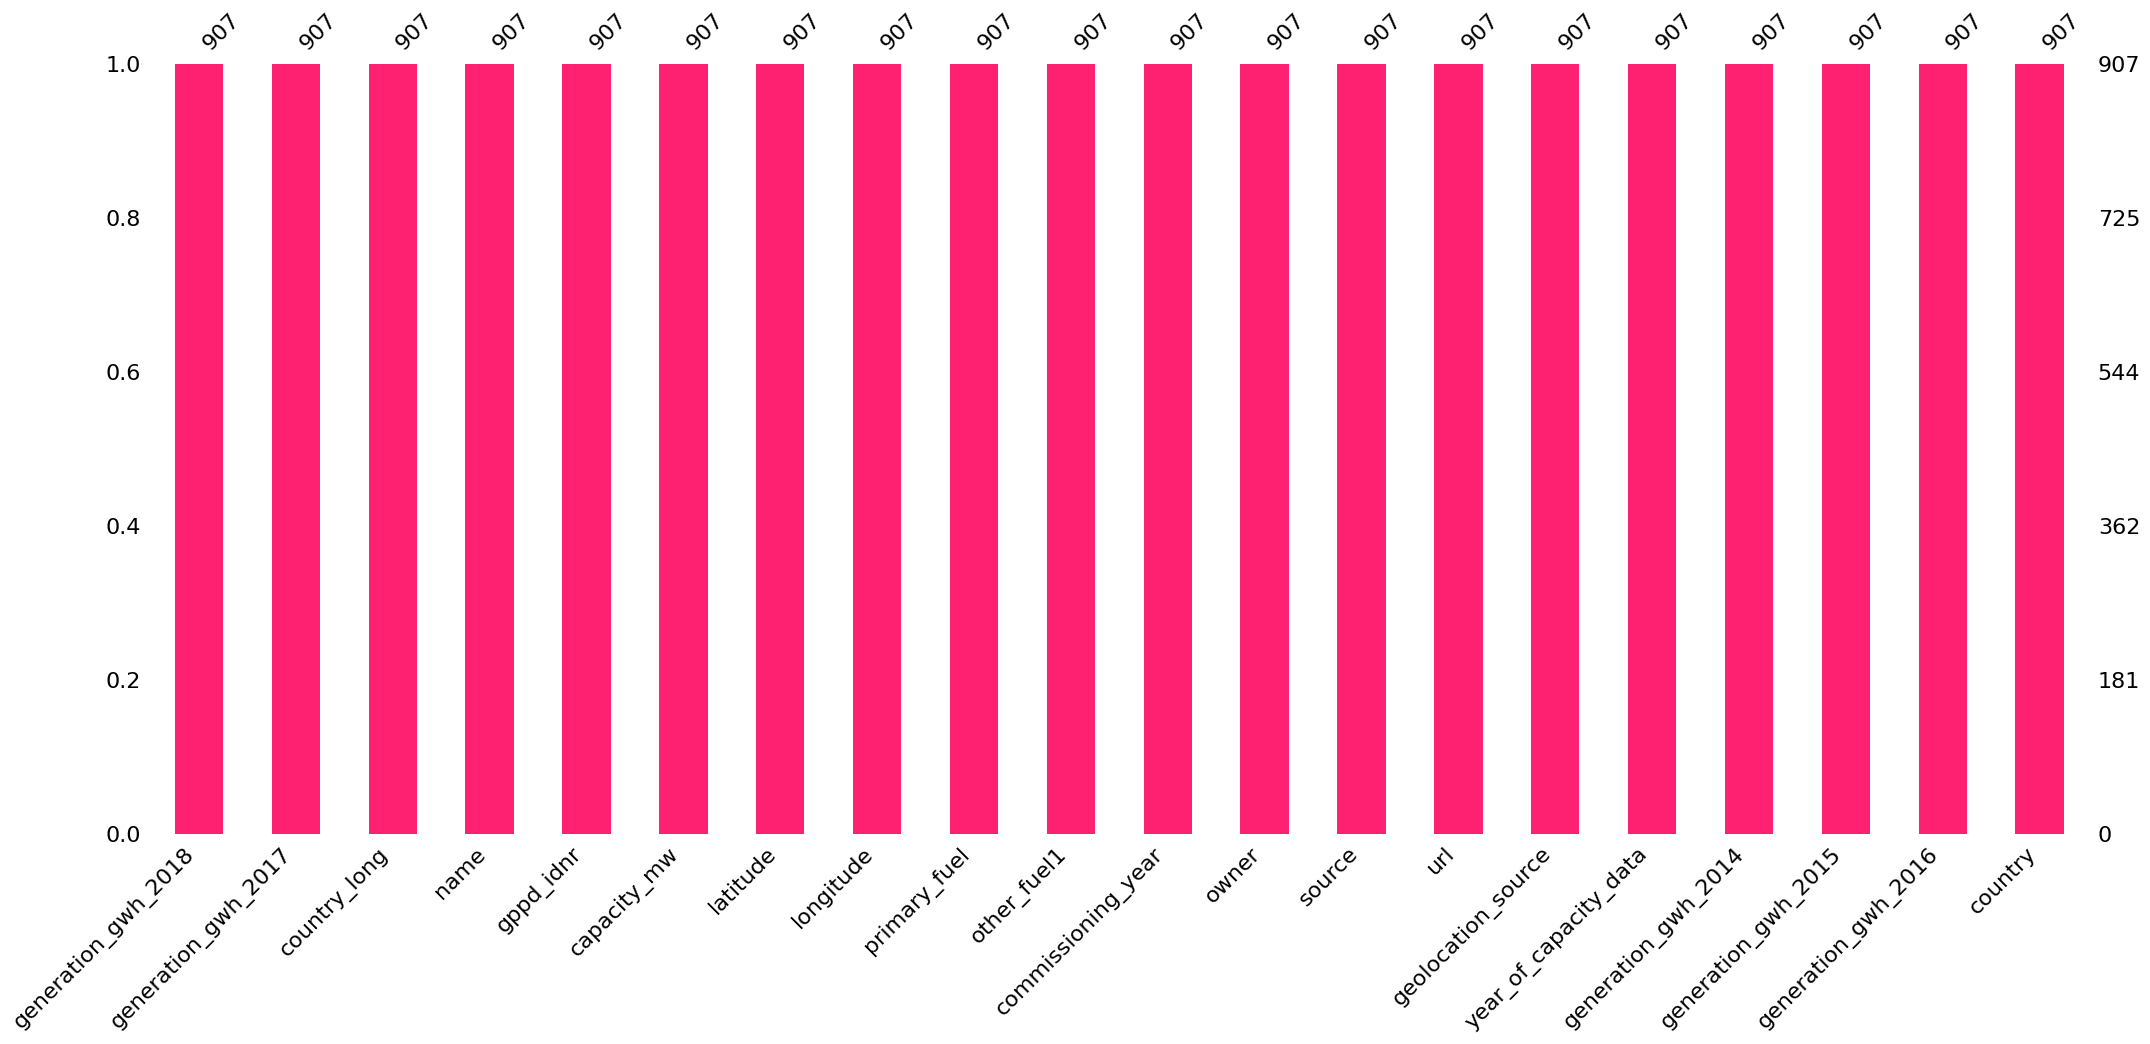

In [ ]:
figsize=(6, 8)
msno.bar(df, color='#FF2171', sort='descending')
plt.show()

In [ ]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

**Considering the information collected and visualizations, the following observations become evident**

> * Data Type and Structure: The dataset is structured as a Pandas DataFrame, containing a total of 20 columns.

> * RangeIndex: The DataFrame has a RangeIndex with 907 entries, ranging from index 0 to 906.

> * 10 columns are of numeric data type (float64), which includes information like capacity, latitude, longitude, commissioning_year, year_of_capacity_data, and generationvalues for the years 2014 to 2018.

> * The other 10 columns are of object data type, containing categorical information such as country, country_long, plant name, identification numbers, primary fuel type, owner, data sources, and URLs.

> * The memory size of the provided DataFrame is approximately 141.8+ kilobytes (KB).

> * No missing data (null values) were found in any of the columns. The DataFrame appears to be complete and well-structured, making it suitable for analysis or further processing.


In [ ]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407        Solar         Oil              2011.0   
1   24.7663    74.6090         Coal         Oil              2001.0   
2   21.9038    69.3732         Wind         Oil              2001.0   
3   23.8712    91.3602          Gas         Oil              2004.0   
4   21.9603    82.4091         Coal         Oil              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3           Acc Acc ltd         Central Electricity Authority   
4           Acc Acc ltd         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0           817.977250           751.644375  
1           817.977250           751.644375  
2           817.977250           751.644375  
3           663.774500           626.239128  
4          5385.579736          7279.000000

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Univariant Analysis</b>
 </div>

In [ ]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [ ]:
# Checking Unique values of all the columns in our dataframe
for col in df.columns.values:
    print("Number of unique values of  \033[1m{} : {}\033[0m ".format(col,df[col].nunique()))

Number of unique values of  country : 1 
Number of unique values of  country_long : 1 
Number of unique values of  name : 907 
Number of unique values of  gppd_idnr : 907 
Number of unique values of  capacity_mw : 361 
Number of unique values of  latitude : 837 
Number of unique values of  longitude : 827 
Number of unique values of  primary_fuel : 8 
Number of unique values of  other_fuel1 : 3 
Number of unique values of  commissioning_year : 73 
Number of unique values of  owner : 280 
Number of unique values of  source : 191 
Number of unique values of  url : 304 
Number of unique values of  geolocation_source : 3 
Number of unique values of  year_of_capacity_data : 1 
Number of unique values of  generation_gwh_2014 : 372 
Number of unique values of  generation_gwh_2015 : 397 
Number of unique values of  generation_gwh_2016 : 404 
Number of unique values of  generation_gwh_2017 : 409 
Number of unique values of  generation_gwh_2018 : 411 


In [ ]:
for col in df.columns:
    counts = df[col].value_counts()
    print(f"Value Counts for \033[1m{col}:\n{counts}\033[0m\n")

Value Counts for country:
IND    907
Name: country, dtype: int64

Value Counts for country_long:
India    907
Name: country_long, dtype: int64

Value Counts for name:
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Value Counts for gppd_idnr:
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

Value Counts for capacity_mw:
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

Value Co

> **Observations based on the data and value counts:**

**Country Distribution:**

* Most of the power plants in the dataset are located in India (country code IND) and have the country_long designation "India." This indicates that the dataset is heavily focused on Indian power plants.

**Primary Fuel:**

* The primary fuel types for power generation vary, with coal and hydro being the most common sources. Solar and wind power are also significant contributors.
Gas, biomass, oil, and nuclear energy are used to a lesser extent.

**Capacity Distribution:**

* The electrical generating capacity (capacity_mw) of the power plants varies widely, with a peak around 5 MW. There are a few power plants with a capacity of over 400 MW.

**Geographical Distribution:**

* The latitude and longitude values show the geolocations of power plants. Latitude values are concentrated around 21.197918, while longitude values are concentrated around 76.7195.

**Commissioning Year:**

* The dataset includes power plants with commissioning years spanning several decades, from as early as 1927 to as recent as 2019. The most common commissioning year is 2001.

**Ownership:**

* The dataset contains a variety of owners for the power plants. "Acc Acc ltd" is the majority owner for a significant number of plants, suggesting a dominant presence.

**Source of Data:**

* The dataset's source of data is primarily reported by the "Central Electricity Authority" (CEA), which is a central organization in India responsible for the development of the power sector.

**URLs:**

The dataset contains URLs pointing to sources of information about the power plants, providing a reference for further details.

**Geolocation Source:**

* The geolocation information source is mostly from "WRI" (World Resources Institute), with some data coming from "Industry About" and "National Renewable Energy Laboratory."

**Year of Capacity Data:**

* The capacity data for the power plants is reported for the year 2019.

**Generation Data:**

* The columns related to electricity generation (such as generation_gwh_2014, generation_gwh_2015) show a wide range of values, including some power plants with no reported generation.

**Capacity Categories:**

* Power plants are categorized into capacity groups, including <100 MW, 100-200 MW, 200-300 MW, 300-400 MW, and 400+ MW.

Overall, the dataset appears to be comprehensive, focusing on Indian power plants with varied capacity, fuel sources, and geolocations.

### Graphical Analysis:-

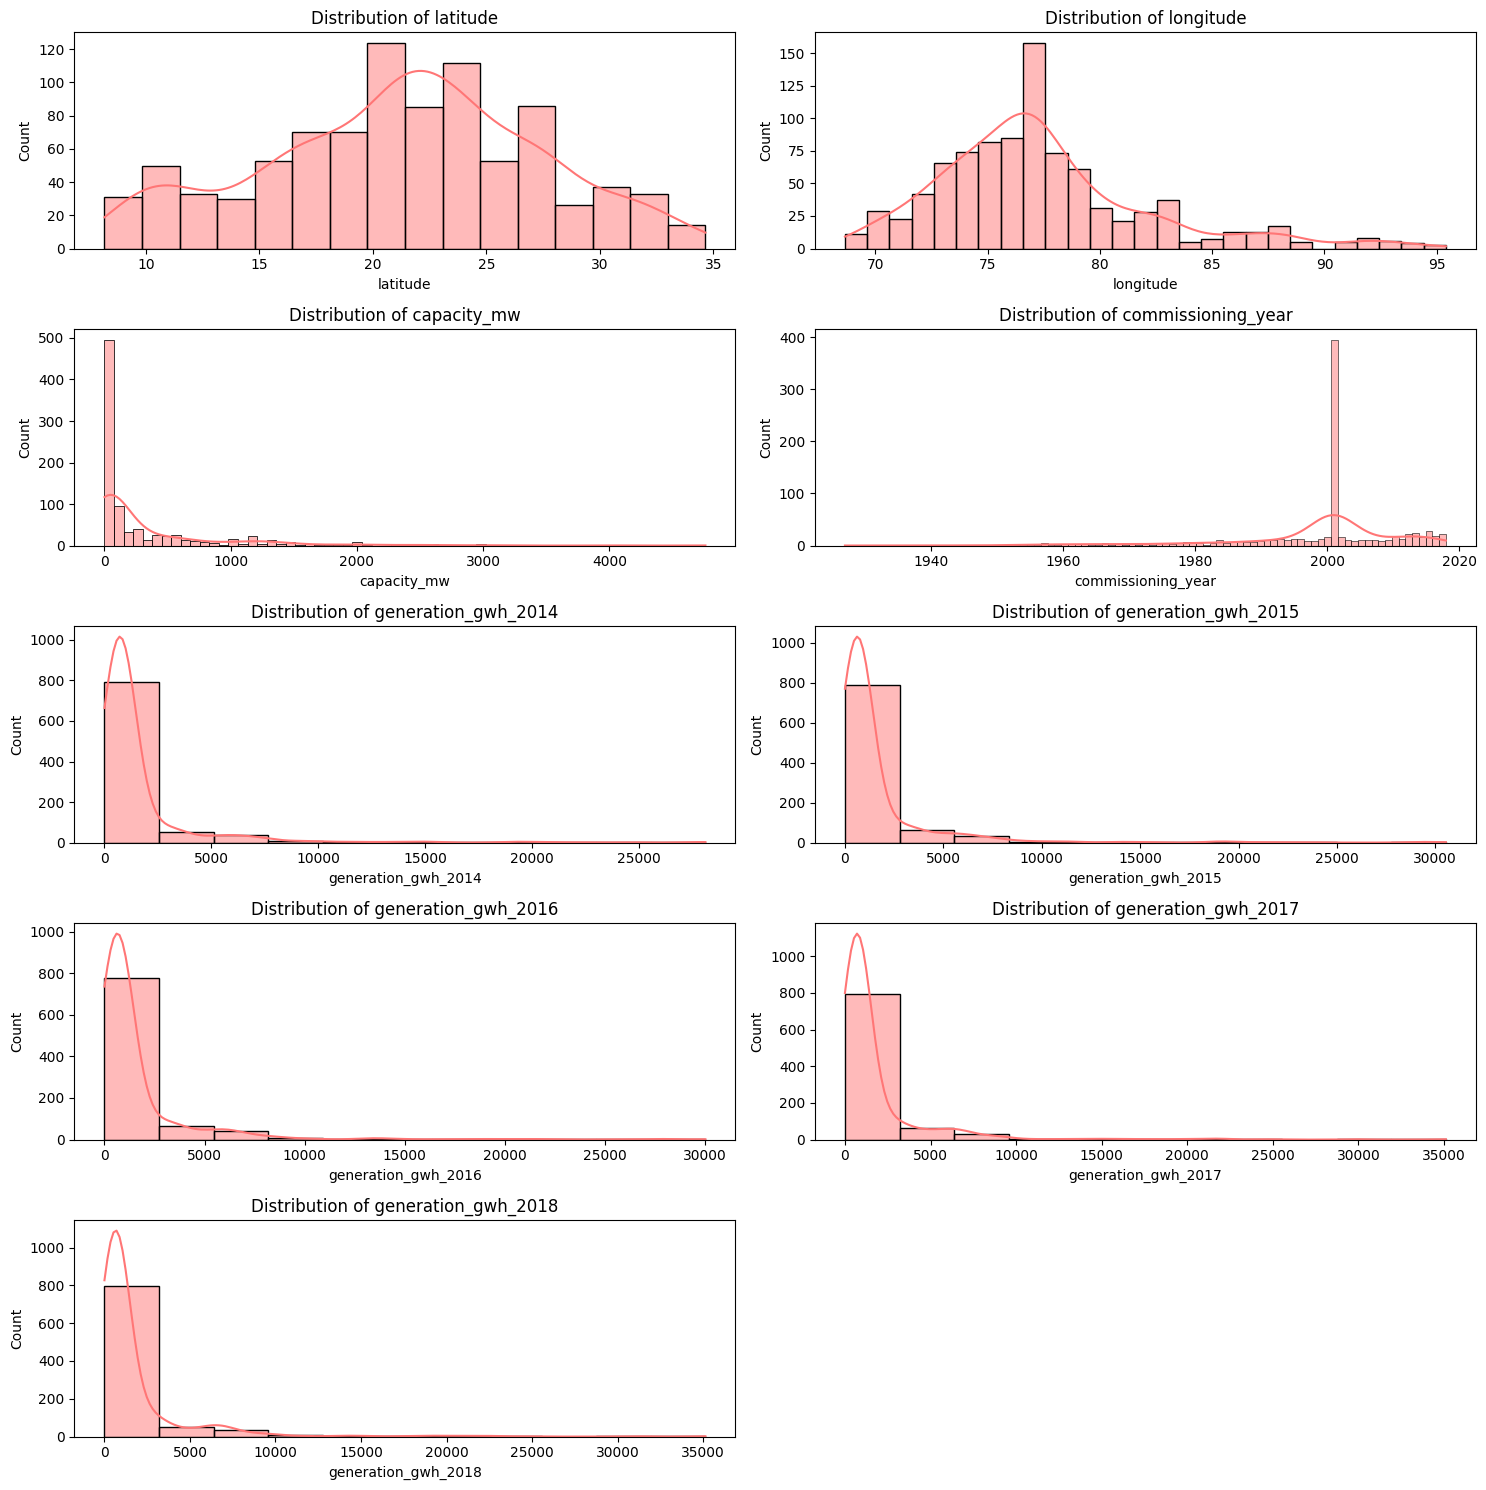

In [ ]:
# List of numerical columns
columns = ["latitude", "longitude", "capacity_mw", "commissioning_year", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]

# Determine the number of rows for subplots
num_cols = len(columns)
num_rows = (num_cols // 2) + (num_cols % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 15))

axes = axes.ravel()

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, color='#FF7676', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for i in range(num_cols, num_rows*2):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Based on graphical analysis, we can conclude that:**
> * The **'latitude'** column follows a normal distribution.
> * Data in the **'longitude'** column exhibits a slight right skewness.
> * The **'capacity_mw'** column is right-skewed, with a minimum value of 0 and a maximum value of 4760.
> * Data in the **'commissioning_year'** indicates that the distribution is left-skewed (negatively skewed) and The year 2002 has the highest count of commissioning..
> * The features **'generation_gwh_2013' through 'generation_gwh_2017'** exhibit significant right-skewness.

These skewness of data demanding special attention and handling.


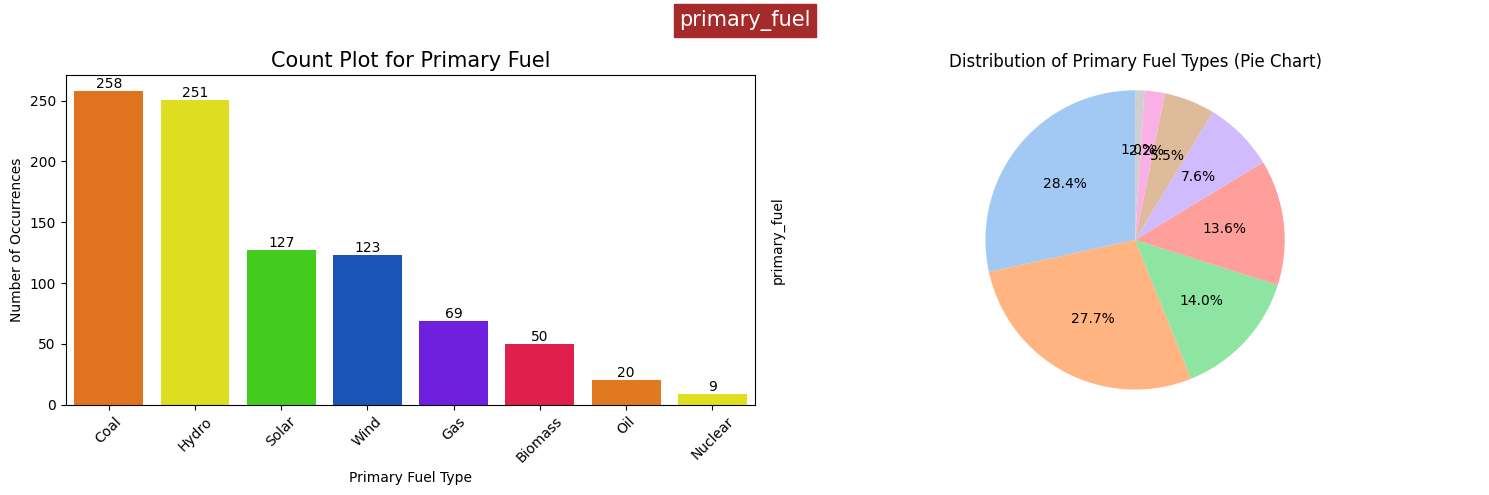

In [ ]:
plt.figure(figsize=(15, 5))

# Subplot 1: Count Plot
plt.subplot(1, 2, 1)

fuel_counts = df['primary_fuel'].value_counts()

sns.countplot(data=df, x='primary_fuel', palette="prism", order=fuel_counts.index)

for index, value in enumerate(fuel_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Count Plot for Primary Fuel", fontsize=15)
plt.xlabel("Primary Fuel Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)

df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), labels=None, startangle=90)
plt.title("Distribution of Primary Fuel Types (Pie Chart)")

# Add percentage labels to the pie chart
plt.axis('equal')
plt.suptitle('primary_fuel', fontsize=15, backgroundcolor='brown', color='white')
# Show the plots
plt.tight_layout()
plt.show()


> Observing the target variable 'primary_fuel,' we notice that it consists of 8 distinct categories: solar, coal, wind, gas, hydro, biomass, oil, and nuclear. Among these categories, coal (28.4%) and hydro (27.7%) are the most prevalent as primary fuels, while nuclear represents the least used primary fuel (1%).

> Considering the target variable's multiclass structure, it is recommended to transform it into a binary class to facilitate predictive modeling.







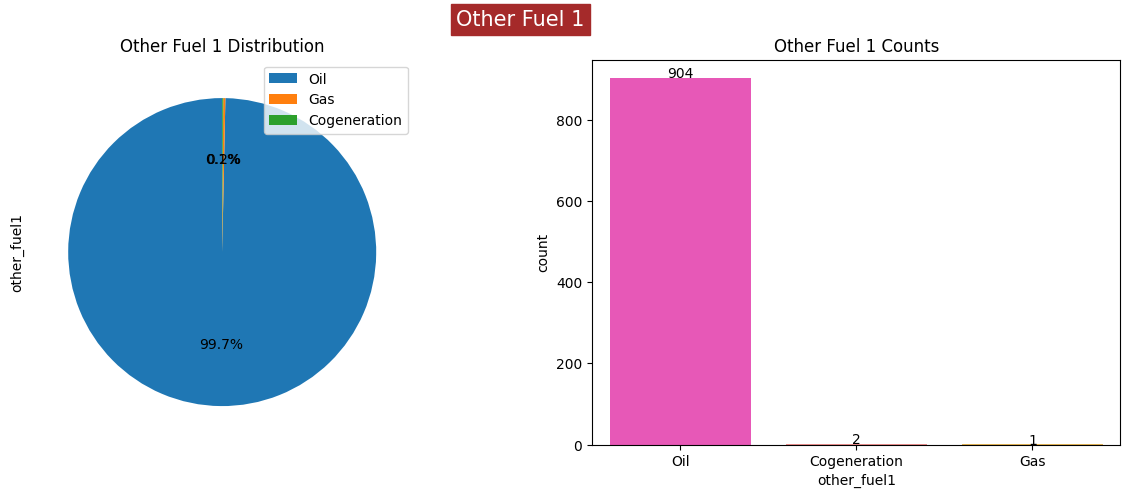

In [ ]:

plt.figure(figsize=(15, 5))

# Subplot 1: Pie Chart for 'other_fuel1'
plt.subplot(1, 2, 1)

other_fuel1_counts = df['other_fuel1'].value_counts()
other_fuel1_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90,colors=sns.set_palette("hot_r"))
plt.title('Other Fuel 1 Distribution')
plt.legend(other_fuel1_counts.index, loc='upper right')
plt.grid(False)

# Subplot 2: Count Plot for 'other_fuel1'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='other_fuel1',palette="spring")
plt.title('Other Fuel 1 Counts')
plt.grid(False)

# Display the count values on the count plot
for i, count in enumerate(other_fuel1_counts):
    plt.text(i, count, str(count), ha='center')

plt.suptitle('Other Fuel 1', fontsize=15, backgroundcolor='brown', color='white')
plt.show()

> In the 'other_fuel1' category, there are three distinct categories: oil, Cogeneration, and Gas. Among these categories, oil stands out with the highest count of 904, making up 99.7% of the total.

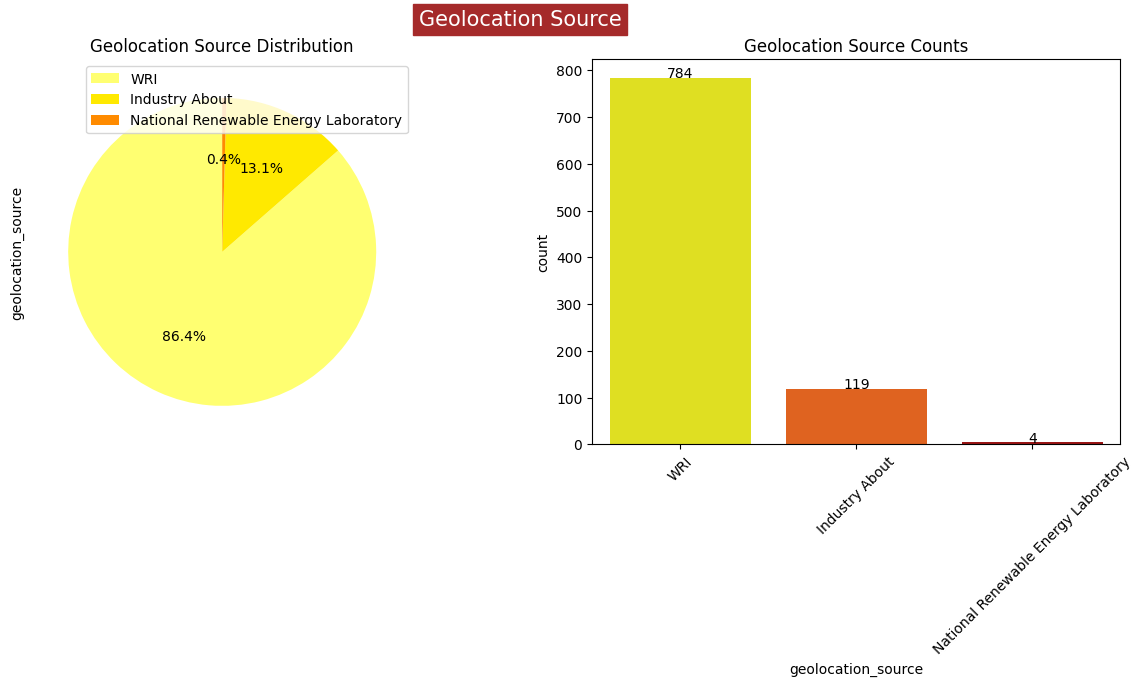

In [ ]:

plt.figure(figsize=(15, 5))
# Subplot 1: Pie Chart for 'geolocation_source'
plt.subplot(1, 2, 1)

geolocation_source_counts = df['geolocation_source'].value_counts()
geolocation_source_counts.plot.pie(autopct='%1.1f%%', labels=None, startangle=90, colors=sns.set_palette("hot"))
plt.title('Geolocation Source Distribution')
plt.legend(geolocation_source_counts.index, loc='upper right')
plt.grid(False)

# Subplot 2: Count Plot for 'geolocation_source'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='geolocation_source', order=geolocation_source_counts.index, palette='hot_r')
plt.title('Geolocation Source Counts')
plt.grid(False)

# Display the count values on the count plot
for i, count in enumerate(geolocation_source_counts):
    plt.text(i, count, str(count), ha='center')

plt.suptitle('Geolocation Source', fontsize=15, backgroundcolor='brown', color='white')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


> The 'geolocation_source' column consists of three distinct categories, with 'WRI' having the highest count of 784 among others two categories.



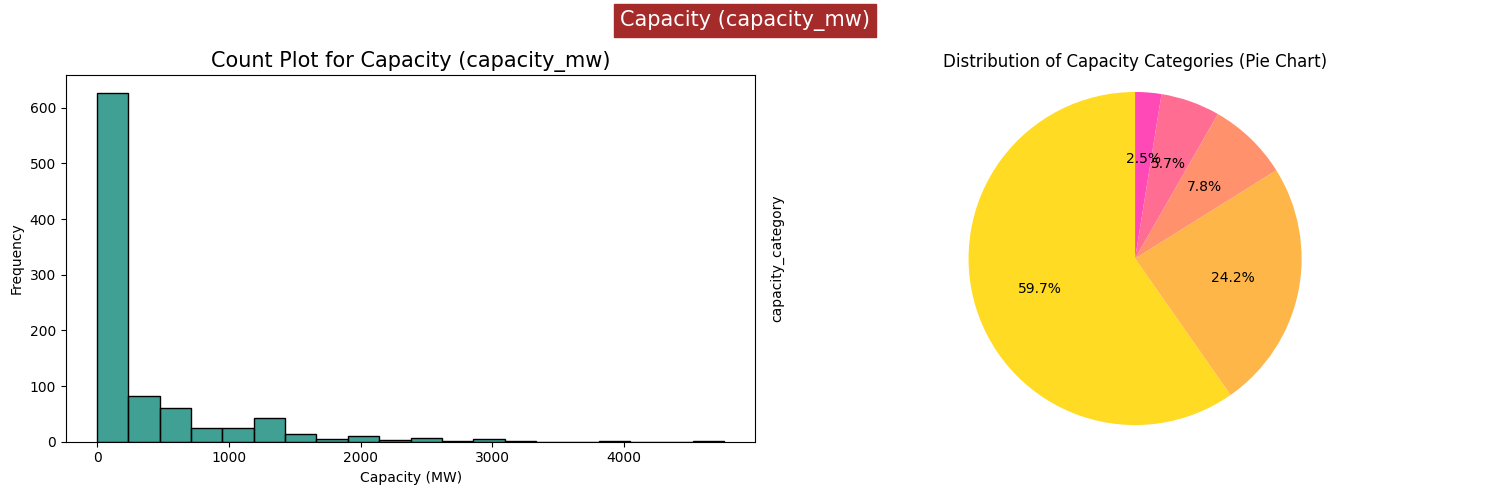

In [ ]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='capacity_mw', bins=20, color="#008170")
plt.title("Count Plot for Capacity (capacity_mw)", fontsize=15)
plt.xlabel("Capacity (MW)")
plt.ylabel("Frequency")

# Create bins or categories for capacity_mw
bin_labels = ['<100', '100-200', '200-300', '300-400', '400+']
bins = [0, 100, 200, 300, 400, np.inf]
df['capacity_category'] = pd.cut(df['capacity_mw'], bins, labels=bin_labels)

capacity_counts = df['capacity_category'].value_counts()

plt.subplot(1, 2, 2)
capacity_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('spring_r'), labels=None, startangle=90)
plt.title("Distribution of Capacity Categories (Pie Chart)")
plt.axis('equal')
plt.suptitle('Capacity (capacity_mw)', fontsize=15, backgroundcolor='brown', color='white')

# Show the plots
plt.tight_layout()
plt.show()

**The highest concentration of capacity_mw falls within the range of 0 to 500.**

In [ ]:
df.drop('capacity_category', axis=1, inplace=True)


<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Bivariant Analysis</b>
 </div>

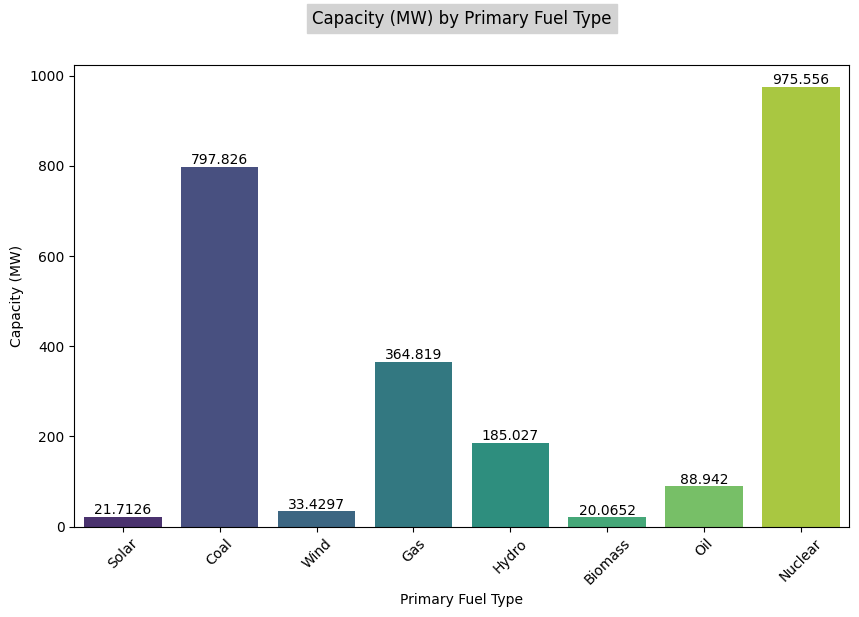

In [ ]:
# Analyzing the Relationship Between Primary Fuel and Capacity (in MW)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="primary_fuel", y="capacity_mw", data=df, palette="viridis", errorbar=None)
plt.title("Capacity (MW) by Primary Fuel Type", backgroundcolor='lightgray', y=1.07)
plt.xlabel("Primary Fuel Type")
plt.ylabel("Capacity (MW)")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.show()

> Nuclear power has the highest capacity for electricity generation in terms of megawatts, followed by coal, while biomass, solar, and wind have the lowest capacity.



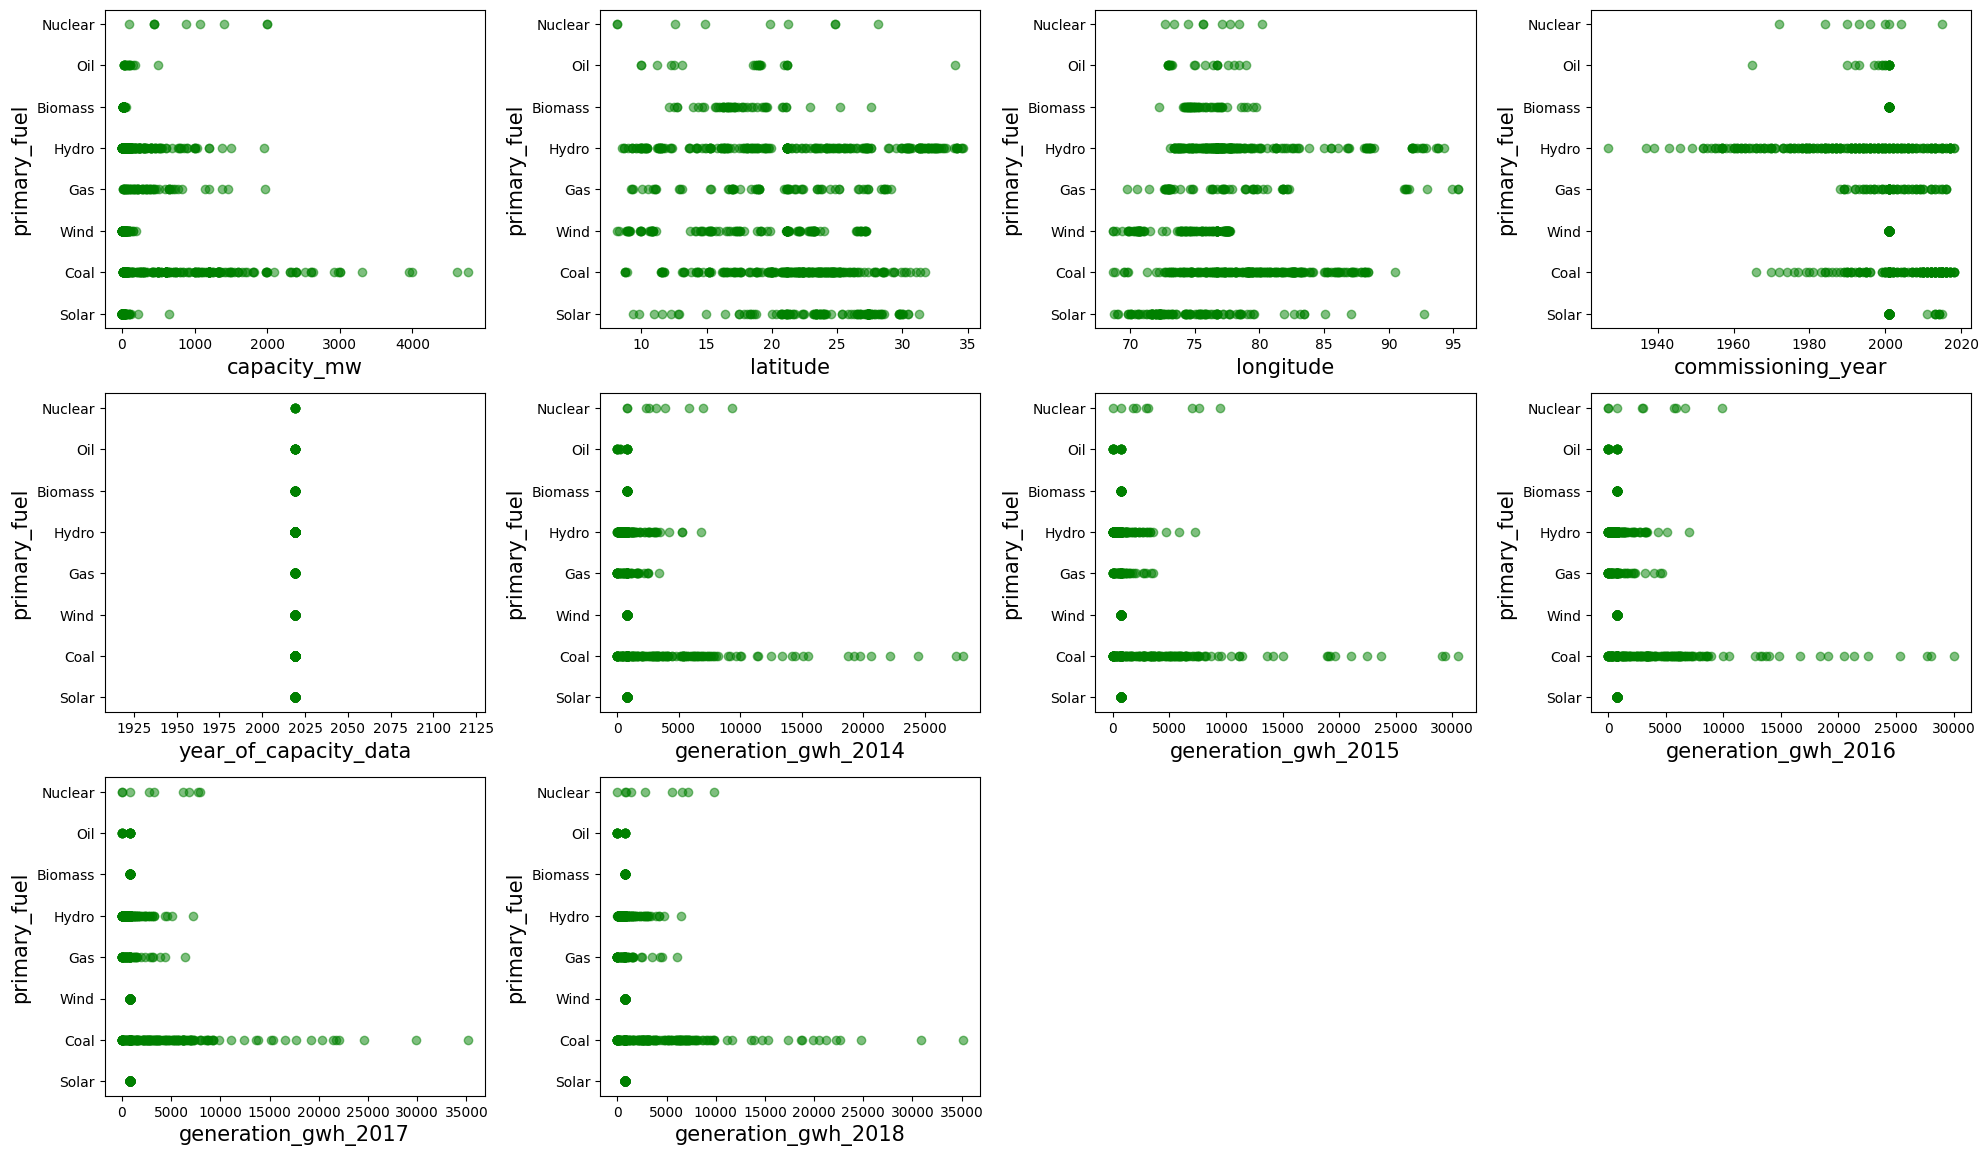

In [ ]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

# Select numerical columns
df_features = df.select_dtypes(include=['int64', 'float64'])

# Target variable
y = df['primary_fuel']

for column in df_features:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Adjusted subplot layout to 3 rows and 4 columns
        plt.scatter(df_features[column], y, alpha=0.5, color='g', marker='o')
        plt.xlabel(column, fontsize=15)
        plt.ylabel('primary_fuel', fontsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()


> The graph shows that for hydro and coal power plants are notably higher than those for other power plant types.

> During the period from 2014 to 2018, coal power plants were the top electricity generators, followed by hydro power plants as the second-highest producers.

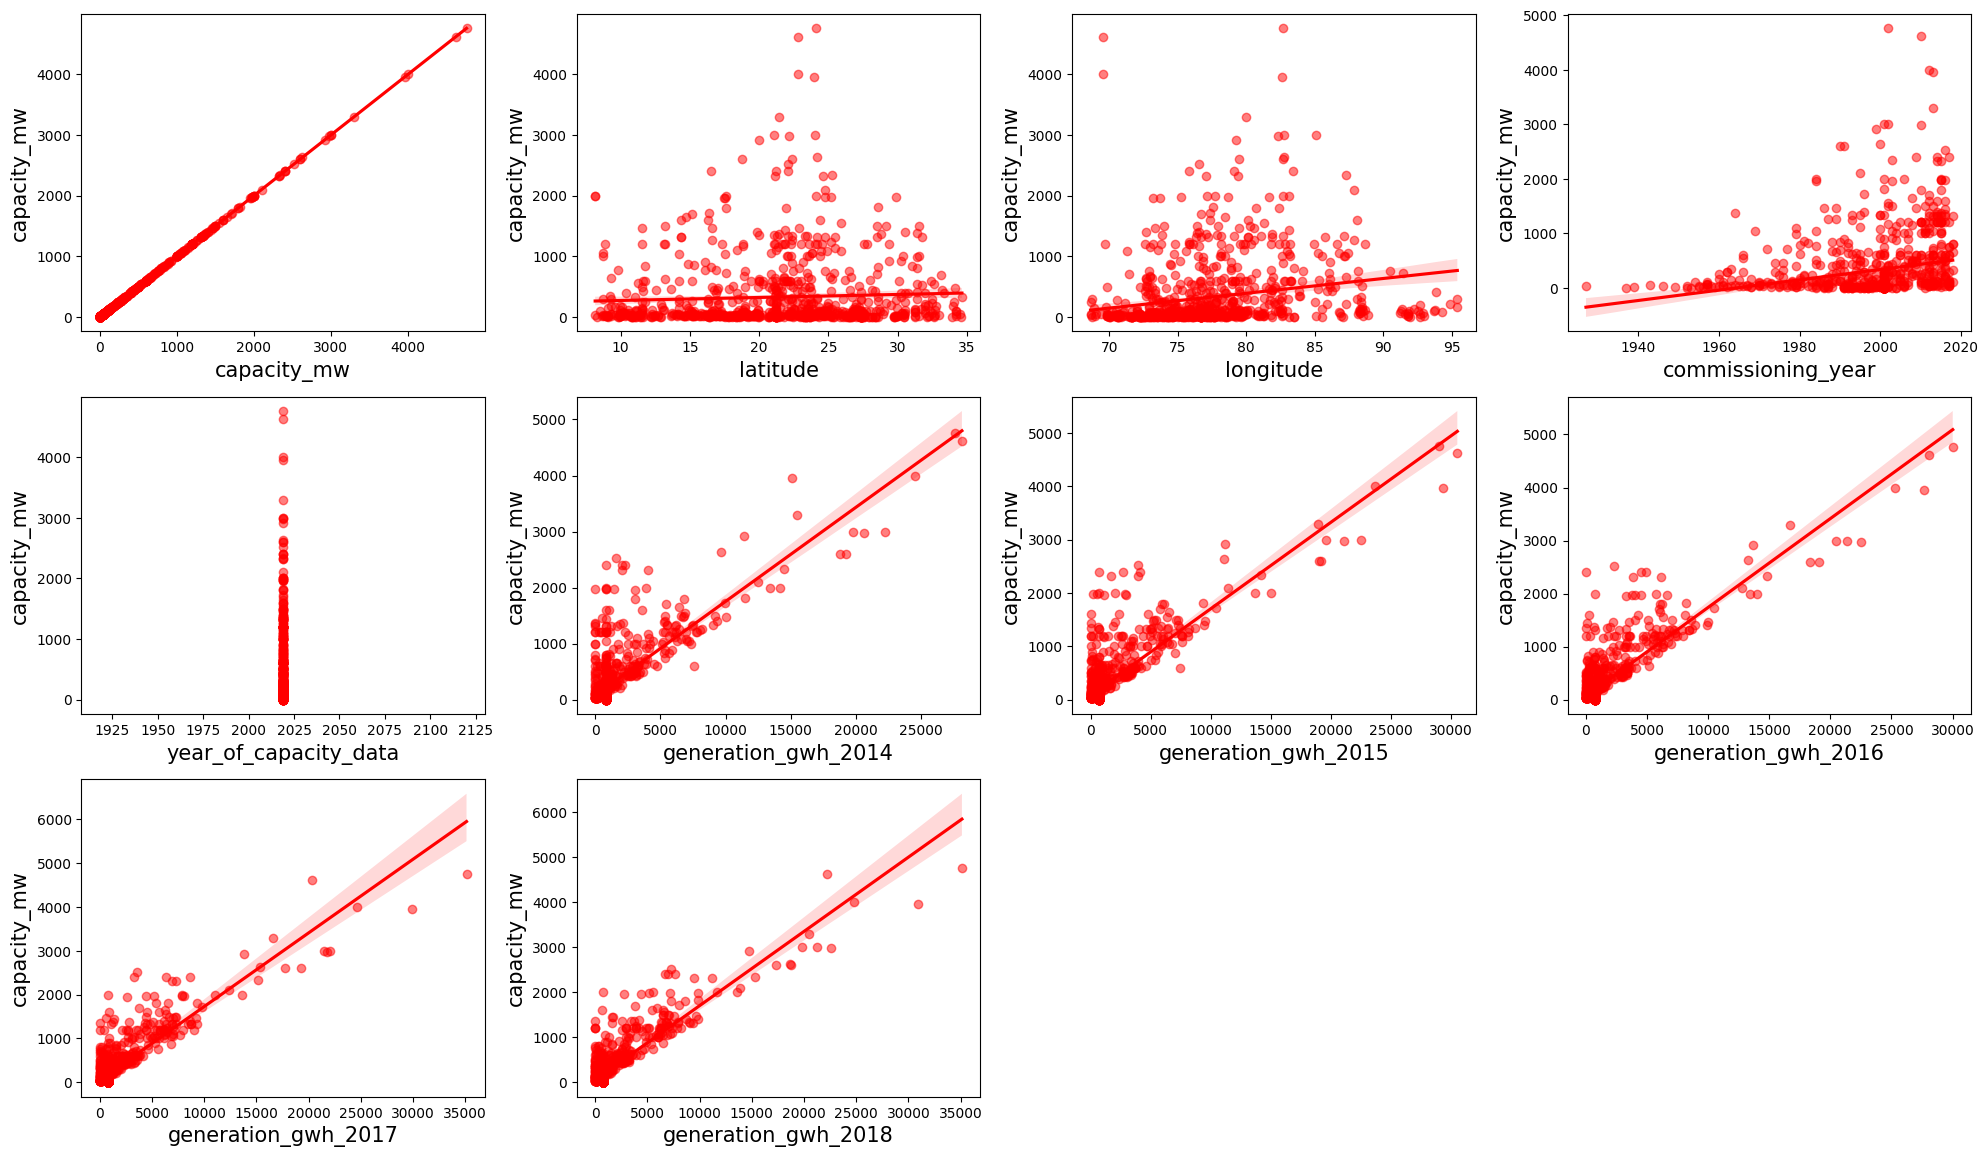

In [ ]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

# Select numerical columns
df_features = df.select_dtypes(include=['int64', 'float64'])

# Target variable
y = df['capacity_mw']

for column in df_features:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Adjusted subplot layout to 4 rows and 4 columns
        sns.regplot(x=df_features[column], y=y, color='red', scatter_kws={'alpha': 0.5})
        plt.xlabel(column, fontsize=15)
        plt.ylabel('capacity_mw', fontsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()

> There is limited correlation between 'capacity_mw' and the geographical coordinates, latitude, and longitude. However, during the years 2014 to 2018, the electricity generation shows a relatively linear relationship with 'capacity_mw.

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Let's inspect the dataset's columns in order to eliminate any redundant ones</b>
 </div>

In [ ]:
df['country'].unique()

array(['IND'], dtype=object)

In [ ]:
df['country_long'].unique()

array(['India'], dtype=object)

**The columns 'country' and 'country_long' both contain the identical details or single constant value 'India,' does not provide any differentiation between power plants located in various countries. offering no meaningful variation or insights. Since the dataset exclusively concerns one region, India, I will proceed to remove both of these columns.**

In [ ]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

**There are 907 unique power plant names, indicating no repetition.**

In [ ]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

**Dropping the 'other_fuel1' column because it only contains one type of value, 'Oil,' and has no apparent relation with the target column**

In [ ]:
df['gppd_idnr'].value_counts()

**The "gppd_idnr" serves as an identifier and is unlikely to directly influence the primary fuel type or capacity. Its primary purpose is for data management and reference. Therefore, I will remove this column as it holds no significance for the target variable.**

In [ ]:
df['owner'].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

**Dropping the "owner" column from the dataset because the data in this column is unrelated to our target column**

In [ ]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

**Eliminating the 'url' column as it lacks any association with our target column.**

In [ ]:
df['year_of_capacity_data'].value_counts()

**The 'year_of_capacity_data' column consists of only one data type, indicating that it has no meaningful correlation with our target column. Therefore, we will proceed to remove this column.**

In [ ]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

I with remove these irrelevant columns that do not have a significant impact on the label or the target variable. These columns are considered unnecessary for your analysis or modeling process and can be safely excluded from the dataset.

In [ ]:
df.drop(["country", "country_long", "name","other_fuel1", "source", "gppd_idnr", "owner", "url", "year_of_capacity_data"],axis=1,inplace=True)

In [ ]:
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2001.0   
2         39.2   21.9038    69.3732         Wind              2001.0   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory           801.123775   
1                                   WRI           801.123775   
2                                   WRI           801.123775   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Assessing dataset's categorical and numerical columns</b>
 </div>

In [ ]:
# Checking for categorical columns
categorical_cols = [i for i in df.dtypes.index if df.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in df.dtypes.index if df.dtypes[i] != "object"]
print("\033[1mLength of Numercal Columns:\033[0m",len(numerical_cols), "\033[1mNumerical Columns:\033[0m ", numerical_cols)

Length of Categorical Columns: 2 Categorical Columns: ['primary_fuel', 'geolocation_source']


Length of Numercal Columns: 9 Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Correlation Matrix</b>
 </div>

In [ ]:
df.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw             1.000000  0.050984   0.199299            0.211042   
latitude                0.050984  1.000000   0.036341            0.087937   
longitude               0.199299  0.036341   1.000000            0.029583   
commissioning_year      0.211042  0.087937   0.029583            1.000000   
generation_gwh_2014     0.793497  0.058594   0.106855            0.076971   
generation_gwh_2015     0.819676  0.053869   0.123763            0.108752   
generation_gwh_2016     0.853008  0.047677   0.145640            0.140964   
generation_gwh_2017     0.868338  0.057897   0.154014            0.153554   
generation_gwh_2018     0.884840  0.055216   0.157405            0.156927   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.793497             0.819676   
latitude                        0.058594             0.053869   
longitude                       0.106855             0.123763   
commissioning_year              0.076971             0.108752   
generation_gwh_2014             1.000000             0.963719   
generation_gwh_2015             0.963719             1.000000   
generation_gwh_2016             0.935067             0.973231   
generation_gwh_2017             0.904075             0.940229   
generation_gwh_2018             0.895143             0.933161   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.853008             0.868338   
latitude                        0.047677             0.057897   
longitude                       0.145640             0.154014   
commissioning_year              0.140964             0.153554   
generation_gwh_2014             0.935067             0.904075   
generation_gwh_2015             0.973231             0.940229   
generation_gwh_2016             1.000000             0.973909   
generation_gwh_2017             0.973909             1.000000   
generation_gwh_2018             0.964988             0.986685   

                     generation_gwh_2018  
capacity_mw                     0.884840  
latitude                        0.055216  
longitude                       0.157405  
commissioning_year              0.156927  
generation_gwh_2014             0.895143  
generation_gwh_2015             0.933161  
generation_gwh_2016             0.964988  
generation_gwh_2017             0.986685  
generation_gwh_2018             1.000000

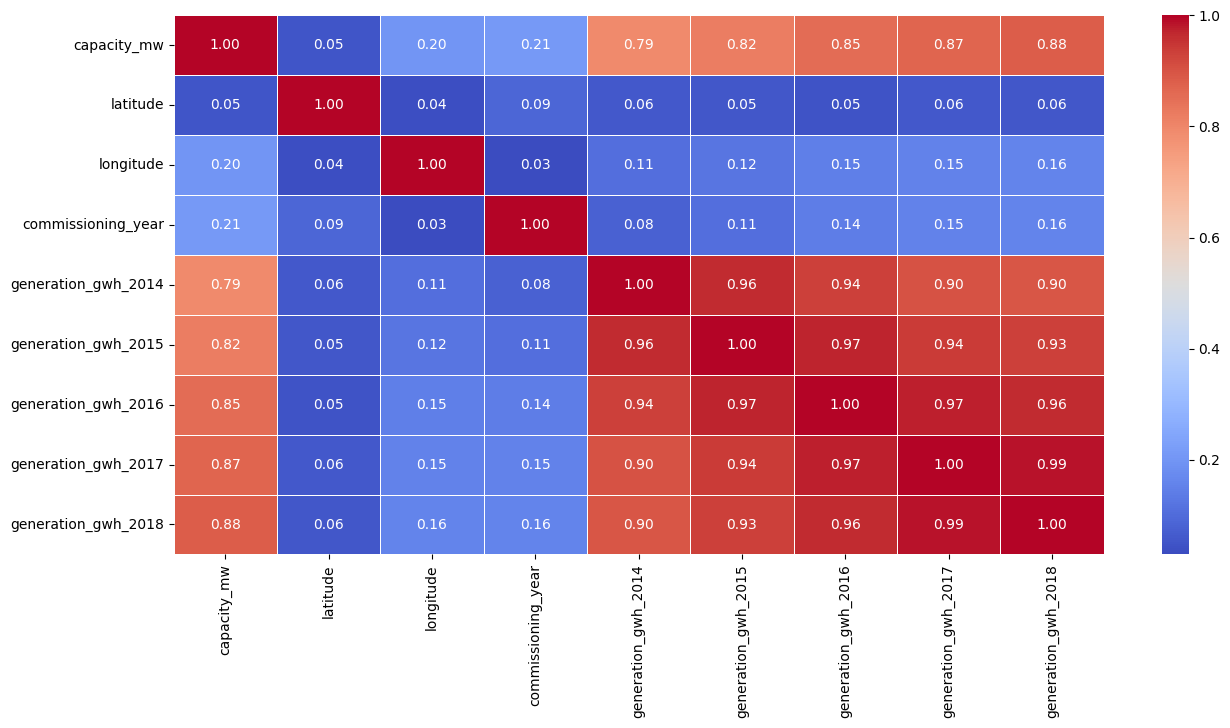

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.5, linecolor='white', fmt='.2f', cmap='coolwarm')

plt.show()

> **key observations based on the correlation matrix data:**

**Capacity and Generation:** The capacity of power plants (capacity_mw) is strongly positively correlated with the generation of electricity in all years (2014 to 2018). This suggests that power plants with higher capacity tend to produce more electricity.

**Year of Commissioning:** The year in which a power plant was commissioned (commissioning_year) has a positive but relatively weak correlation with other variables, indicating a mild relationship between the commissioning year and the plant's capacity and generation.

**Latitude and Longitude:** Latitude and longitude have very weak correlations with other variables, indicating that the geographical location of power plants doesn't strongly influence their capacity or generation.

**Generation Over Time:** The generation of electricity in subsequent years (2015, 2016, 2017, and 2018) is strongly positively correlated, indicating a strong consistency in generation across these years.

**High Correlations:** The generation of electricity in different years (2014 to 2018) is highly positively correlated, suggesting that power plants that produced a lot of electricity in one year tended to do so consistently in other years.

**Capacity and Generation vs. Geographical Location:** The capacity and generation of power plants appear to be more influenced by their size and generation capabilities rather than their geographical location (latitude and longitude).

**Temporal Consistency:** The strong correlations in generation between different years (2014 to 2018) suggest that power plants tend to maintain a consistent level of electricity production over time.

**Potential Multicollinearity:** There is multicollinearity (high correlations) among the generation variables, which may need to be considered when performing regression or predictive modeling.

**These observations highlight the relationships and dependencies between the variables in the dataset, which can be useful for further analysis and modeling.**

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Outliers Detection & Handling</b>
 </div>

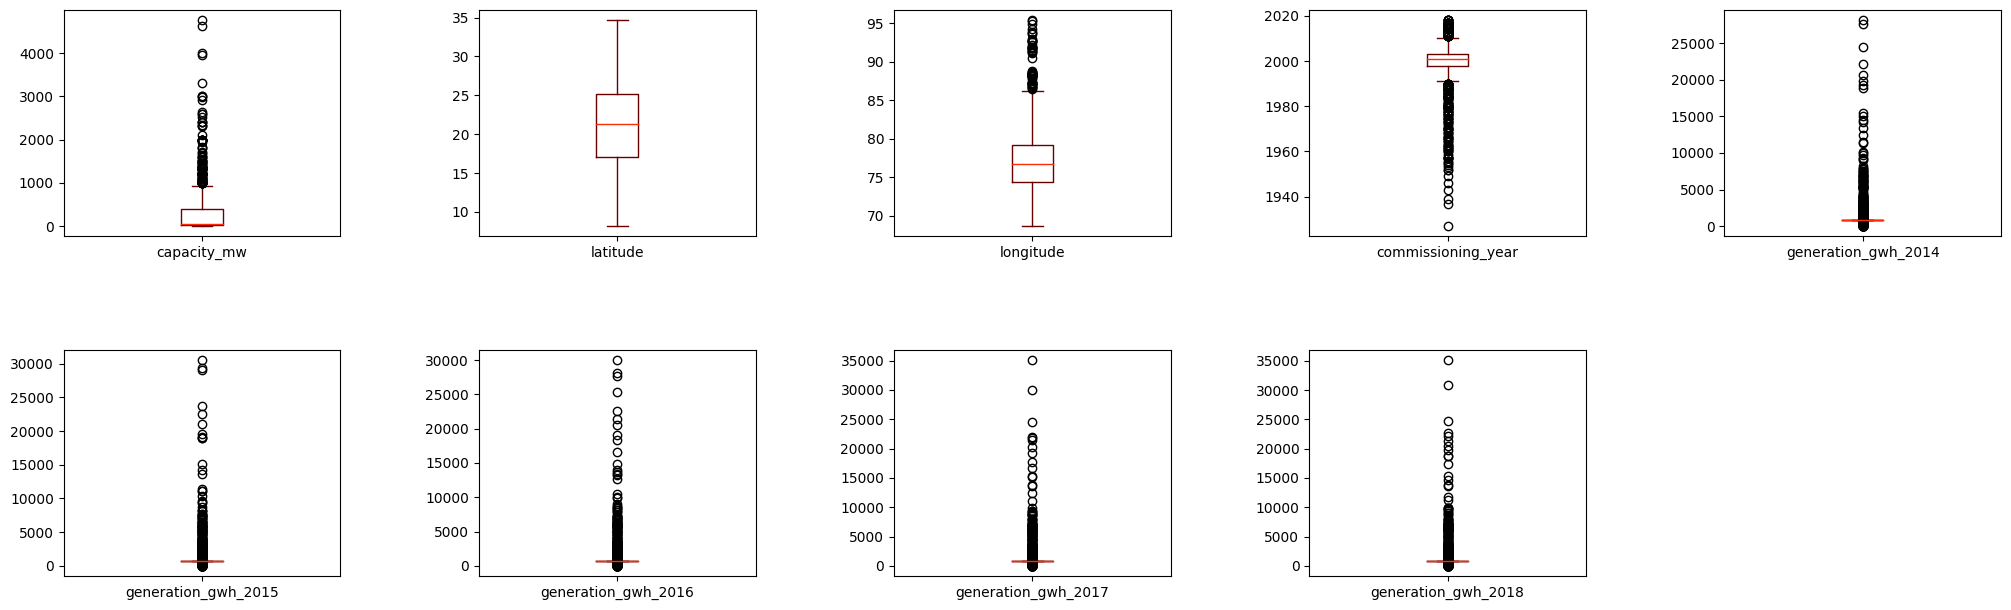

In [ ]:
df.plot(kind='box', subplots=True, layout=(6, 5), figsize=(25, 25))

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing between subplots

plt.show()

**In this analysis, it's evident that the latitude column is the only one that does not exhibit outliers. However, all other columns, including capacity_mw, longitude, commissioning_year, and the various generation columns (generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018), show the presence of outliers.**

### Removing Outliers

**Zscore Method**

In [ ]:
# Features containing outliers
features = df[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(features))
z

capacity_mw  longitude  commissioning_year  generation_gwh_2014  \
0       0.548908   0.869917            0.933076             0.257022   
1       0.386977   0.585590            0.172699             0.257022   
2       0.486679   1.673567            0.172699             0.257022   
3       0.324240   2.895239            0.400812             0.322873   
4       2.498942   1.035238            1.237227             0.545554   
..           ...        ...                 ...                  ...   
902     2.159821   0.014609            1.313265             0.257022   
903     0.548060   0.153415            0.172699             0.257022   
904     0.509909   0.383592            0.172699             0.257022   
905     0.417498   0.764564            0.172699             0.257022   
906     0.525169   0.010327            0.172699             0.257022   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.267783             0.275737             0.275565   
1               0.267783             0.275737             0.275565   
2               0.267783             0.275737             0.275565   
3               0.223348             0.226194             0.326203   
4               1.476964             1.557432             1.224379   
..                   ...                  ...                  ...   
902             0.505833             0.443415             0.259992   
903             0.267783             0.275737             0.275565   
904             0.267783             0.275737             0.275565   
905             0.267783             0.275737             0.275565   
906             0.267783             0.275737             0.275565   

     generation_gwh_2018  
0               0.288394  
1               0.288394  
2               0.288394  
3               0.327990  
4               1.772608  
..                   ...  
902             0.308963  
903             0.288394  
904             0.288394  
905             0.288394  
906             0.288394  

[907 rows x 8 columns]

In [ ]:
df_new=df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2001.0   
2           39.2   21.9038    69.3732         Wind              2001.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2001.0   
904         25.5   15.2758    75.5811         Wind              2001.0   
905         80.0   24.3500    73.7477         Coal              2001.0   
906         16.5    9.9344    77.4768         Wind              2001.0   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[846 rows x 11 columns]

In [ ]:
DataLoss=((907-846)/907)*100
DataLoss

6.725468577728775

**IQR (Inter Quantile Range) Method:**

In [ ]:
#1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

#IQR
IQR=Q3 - Q1
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df1.shape)
print("\nTotal Dropped rows:",df.shape[0]-df1.shape[0])

#Percentage Data Loss using IQR
data_los = (907-419)/907*100
print(data_los)

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (419, 11)

Total Dropped rows: 488
53.8037486218302


**A total of 53.80% of the data was eliminated when using the IQR method to remove outliers. Therefore, the IQR method may not be the suitable choice for outlier removal, and we will opt for the Z-score method instead as data loss is only 6.7%.**

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Transforming Categorical Data with LabelEncoder</b>
 </div>

In [ ]:
df['geolocation_source']

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
                       ...                 
902                                     WRI
903                          Industry About
904                                     WRI
905                                     WRI
906                                     WRI
Name: geolocation_source, Length: 907, dtype: object

In [ ]:
en= LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=en.fit_transform(df_new[i].values.reshape(-1,1))

In [ ]:
df_new.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1              2001.0   
2         39.2   21.9038    69.3732             7              2001.0   
3        135.0   23.8712    91.3602             2              2004.0   
4       1800.0   21.9603    82.4091             1              2015.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1           801.123775           711.181225   
1                   2           801.123775           711.181225   
2                   2           801.123775           711.181225   
3                   2           617.789264           843.747000   
4                   2          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0           737.205450           817.977250           751.644375  
1           737.205450           817.977250           751.644375  
2           737.205450           817.977250           751.644375  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Correlation</b>
 </div>

primary_fuel           1.000000
latitude              -0.002374
commissioning_year    -0.067425
generation_gwh_2014   -0.247812
generation_gwh_2015   -0.271721
generation_gwh_2017   -0.281962
generation_gwh_2016   -0.282330
generation_gwh_2018   -0.289959
longitude             -0.382790
capacity_mw           -0.399258
geolocation_source    -0.477833
Name: primary_fuel, dtype: float64


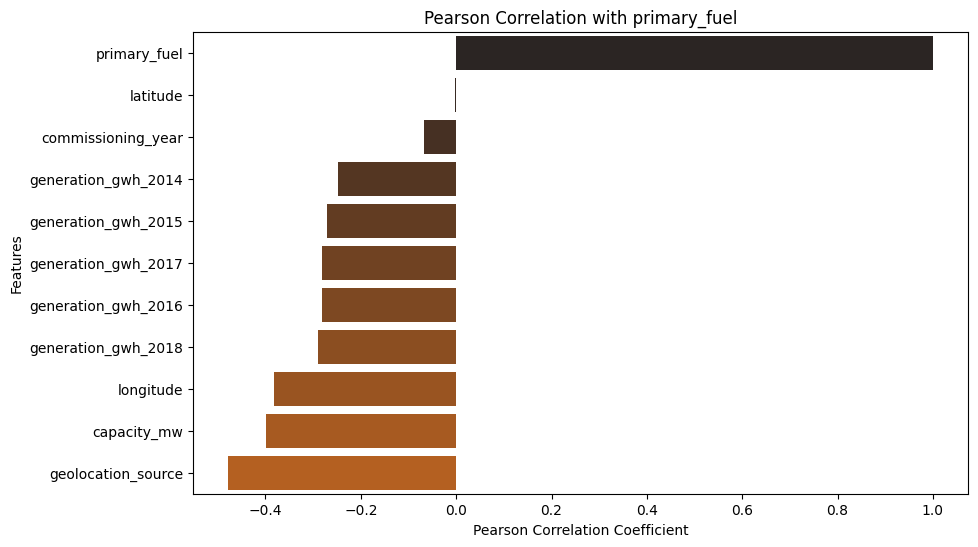

In [ ]:
a = df_new.corr('pearson')['primary_fuel'].sort_values(ascending=False)
print(a)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=a.values, y=a.index, palette="dark:#CD5C08")
plt.title('Pearson Correlation with primary_fuel')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.show()

**Observations on the Correlation with the Target Variable "primary_fuel":**

> **Negative Correlation with Longitude (-0.382790):** The longitude has a negative correlation with the target variable "primary_fuel." This means that as the longitude increases (moves eastward), the primary fuel may tend to shift towards a certain type. There might be a geographical pattern in the primary fuel source.

> **Negative Correlation with Capacity_mw (-0.399258):** The capacity in megawatts (capacity_mw) has a negative correlation with the primary fuel. This suggests that the choice of primary fuel may be influenced by the power plant's capacity, with certain types of fuel being more common for plants of different sizes.

> **Negative Correlation with Geolocation Source (-0.477833):** The source of geolocation data (geolocation_source) has a significant negative correlation with the primary fuel. This implies that the choice of primary fuel source may be strongly associated with the source of geolocation data, indicating that location-specific factors may play a role in determining the primary fuel source.

> **Negative Correlation with Generation in Different Years:** The variables related to electricity generation (generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018) all have negative correlations with the primary fuel. This suggests that the type of fuel used may be related to the electricity generation patterns in different years.

> **Negative Correlation with Commissioning Year (-0.067425):** The commissioning year of the power plant has a weak negative correlation with the primary fuel. This indicates that older power plants may have a slightly different choice of primary fuel compared to newer ones.

> **Weak Negative Correlation with Latitude (-0.002374):** The latitude of the power plant location has a very weak negative correlation with the primary fuel. This suggests that latitude may have only a minor influence on the choice of primary fuel.


capacity_mw            1.000000
generation_gwh_2018    0.800151
generation_gwh_2017    0.788933
generation_gwh_2016    0.771628
generation_gwh_2015    0.698624
generation_gwh_2014    0.649177
longitude              0.267535
geolocation_source     0.239771
commissioning_year     0.221471
latitude               0.053430
primary_fuel          -0.399258
Name: capacity_mw, dtype: float64


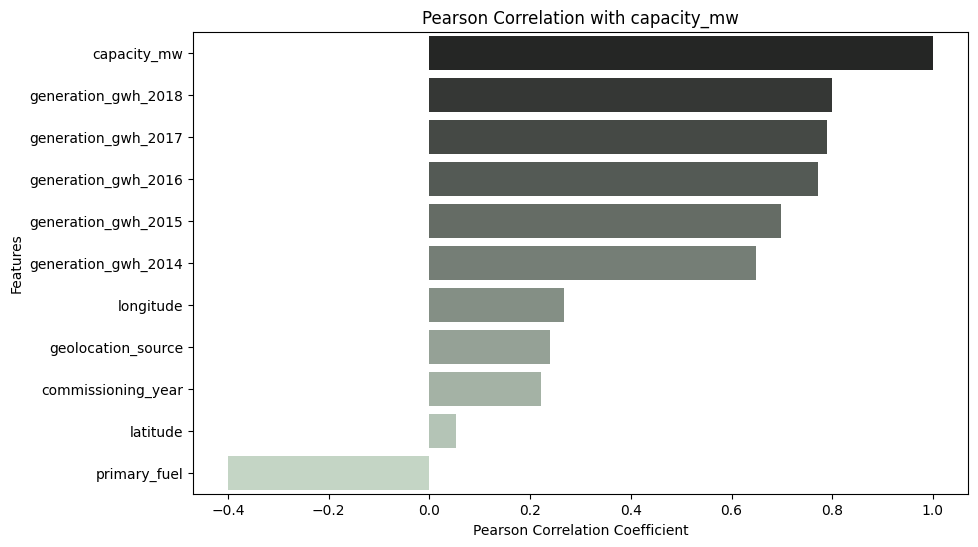

In [ ]:
a = df_new.corr('pearson')['capacity_mw'].sort_values(ascending=False)
print(a)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=a.values, y=a.index, palette="dark:#C1D8C3")
plt.title('Pearson Correlation with capacity_mw')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.show()

**Observations on the Correlation with the Target Variable "capacity_mw":**

> There is a strong positive correlation of approximately 0.88 with 'generation_gwh_2018', indicating that the generation of electricity in 2018 has a significant impact on the capacity of power plants.

> Similarly, 'generation_gwh_2017' and 'generation_gwh_2016' also exhibit strong positive correlations, around 0.87 and 0.85, respectively, suggesting that the electricity generation in these years is closely related to the capacity.

> 'generation_gwh_2015' and 'generation_gwh_2014' display positive correlations of approximately 0.82 and 0.79, indicating their influence on the capacity, although slightly weaker than the subsequent years.

> 'commissioning_year' and 'longitude' show positive correlations of around 0.21 and 0.20, respectively. While these correlations are weaker, they still contribute to understanding the capacity of power plants.

> 'latitude' has the weakest positive correlation of about 0.05 with 'capacity_mw', suggesting that the geographic latitude of the power plant has the least impact on its capacity.

> Overall, the data indicates that the most recent years' electricity generation, particularly in 2018, has a strong influence on the capacity of power plants, while the geographic coordinates (longitude and latitude) have relatively minor effects.

In [ ]:
df_new.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.053430   0.267535     -0.399258   
latitude                0.053430  1.000000  -0.014702     -0.002374   
longitude               0.267535 -0.014702   1.000000     -0.382790   
primary_fuel           -0.399258 -0.002374  -0.382790      1.000000   
commissioning_year      0.221471  0.097493   0.078514     -0.067425   
geolocation_source      0.239771 -0.203636   0.263498     -0.477833   
generation_gwh_2014     0.649177  0.080164   0.118292     -0.247812   
generation_gwh_2015     0.698624  0.069602   0.151985     -0.271721   
generation_gwh_2016     0.771628  0.054649   0.192754     -0.282330   
generation_gwh_2017     0.788933  0.070945   0.194455     -0.281962   
generation_gwh_2018     0.800151  0.065533   0.206843     -0.289959   

                     commissioning_year  geolocation_source  \
capacity_mw                    0.221471            0.239771   
latitude                       0.097493           -0.203636   
longitude                      0.078514            0.263498   
primary_fuel                  -0.067425           -0.477833   
commissioning_year             1.000000           -0.055035   
geolocation_source            -0.055035            1.000000   
generation_gwh_2014            0.055515            0.112280   
generation_gwh_2015            0.122384            0.123223   
generation_gwh_2016            0.192343            0.125154   
generation_gwh_2017            0.209235            0.122010   
generation_gwh_2018            0.202943            0.129014   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.649177             0.698624   
latitude                        0.080164             0.069602   
longitude                       0.118292             0.151985   
primary_fuel                   -0.247812            -0.271721   
commissioning_year              0.055515             0.122384   
geolocation_source              0.112280             0.123223   
generation_gwh_2014             1.000000             0.913705   
generation_gwh_2015             0.913705             1.000000   
generation_gwh_2016             0.802119             0.909054   
generation_gwh_2017             0.754073             0.835419   
generation_gwh_2018             0.753995             0.832551   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.771628             0.788933   
latitude                        0.054649             0.070945   
longitude                       0.192754             0.194455   
primary_fuel                   -0.282330            -0.281962   
commissioning_year              0.192343             0.209235   
geolocation_source              0.125154             0.122010   
generation_gwh_2014             0.802119             0.754073   
generation_gwh_2015             0.909054             0.835419   
generation_gwh_2016             1.000000             0.936047   
generation_gwh_2017             0.936047             1.000000   
generation_gwh_2018             0.926948             0.968753   

                     generation_gwh_2018  
capacity_mw                     0.800151  
latitude                        0.065533  
longitude                       0.206843  
primary_fuel                   -0.289959  
commissioning_year              0.202943  
geolocation_source              0.129014  
generation_gwh_2014             0.753995  
generation_gwh_2015             0.832551  
generation_gwh_2016             0.926948  
generation_gwh_2017             0.968753  
generation_gwh_2018             1.000000

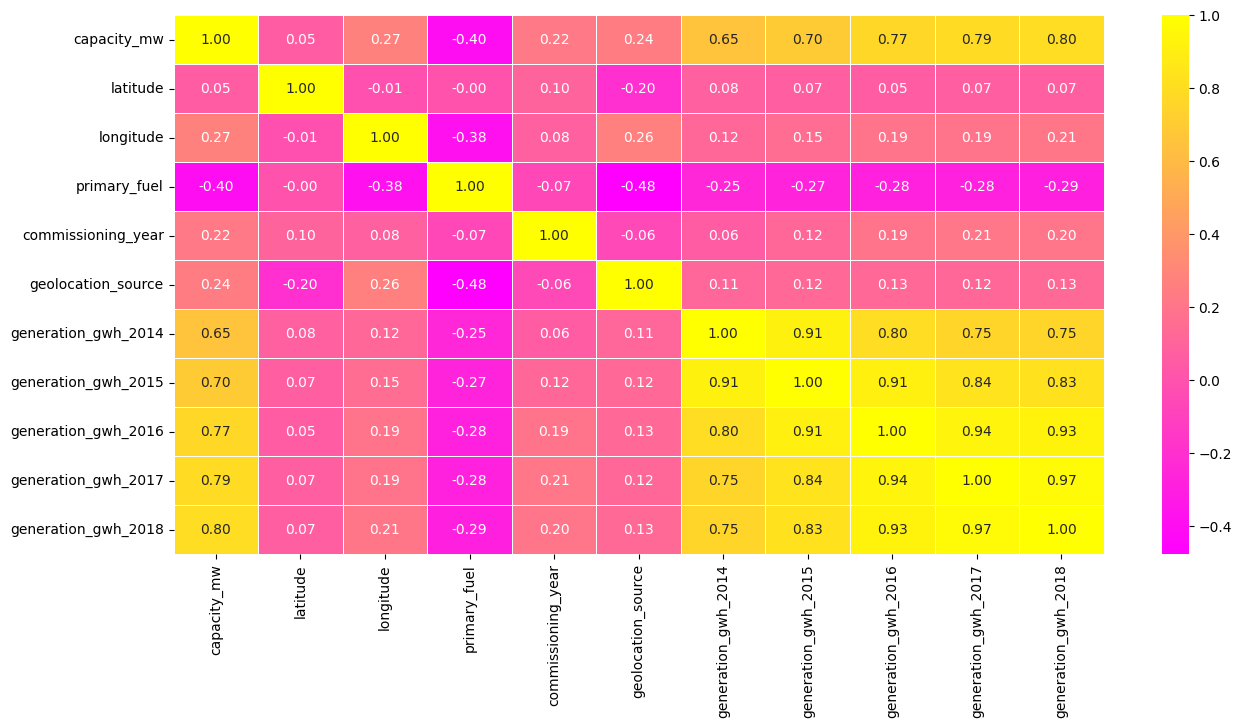

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=df_new.corr(), annot=True, linewidths=0.5, linecolor='white', fmt='.2f', cmap='spring')

plt.show()

**observations based on the correlation matrix data and visualization**

> **Capacity and Electricity Generation:** The capacity of power plants (capacity_mw) exhibits strong positive correlations with electricity generation in all years from 2014 to 2018. This indicates that larger power plants tend to produce more electricity.

> **Geographical Location:** Longitude has a moderately positive correlation with capacity and generation, suggesting that power plants located further east might have higher capacity and electricity generation.
Latitude, on the other hand, has weak or negligible correlations with the other variables, indicating that its influence on capacity and generation is minimal.

> **Primary Fuel Choice:** The primary fuel used in power plants (primary_fuel) displays negative correlations with all the other variables, indicating an inverse relationship. As the primary fuel preference shifts away from a certain type, capacity and electricity generation tend to increase.

> **Plant Commissioning Year:** The commissioning year (commissioning_year) has positive correlations with capacity and generation, suggesting that newer power plants tend to have higher capacity and electricity generation.

> **Geolocation Source:** The source of geolocation data (geolocation_source) has positive correlations with capacity, generation, and longitude, indicating that the choice of geolocation data source is associated with larger power plants, higher electricity generation, and eastern locations.

> **Electricity Generation Over Years:** Electricity generation in different years (2014 to 2018) demonstrates strong positive correlations with capacity. The later years, 2016, 2017, and 2018, show the highest correlations, indicating an increase in electricity generation over time.


CPU times: user 42.5 s, sys: 4.02 s, total: 46.5 s
Wall time: 43.4 s


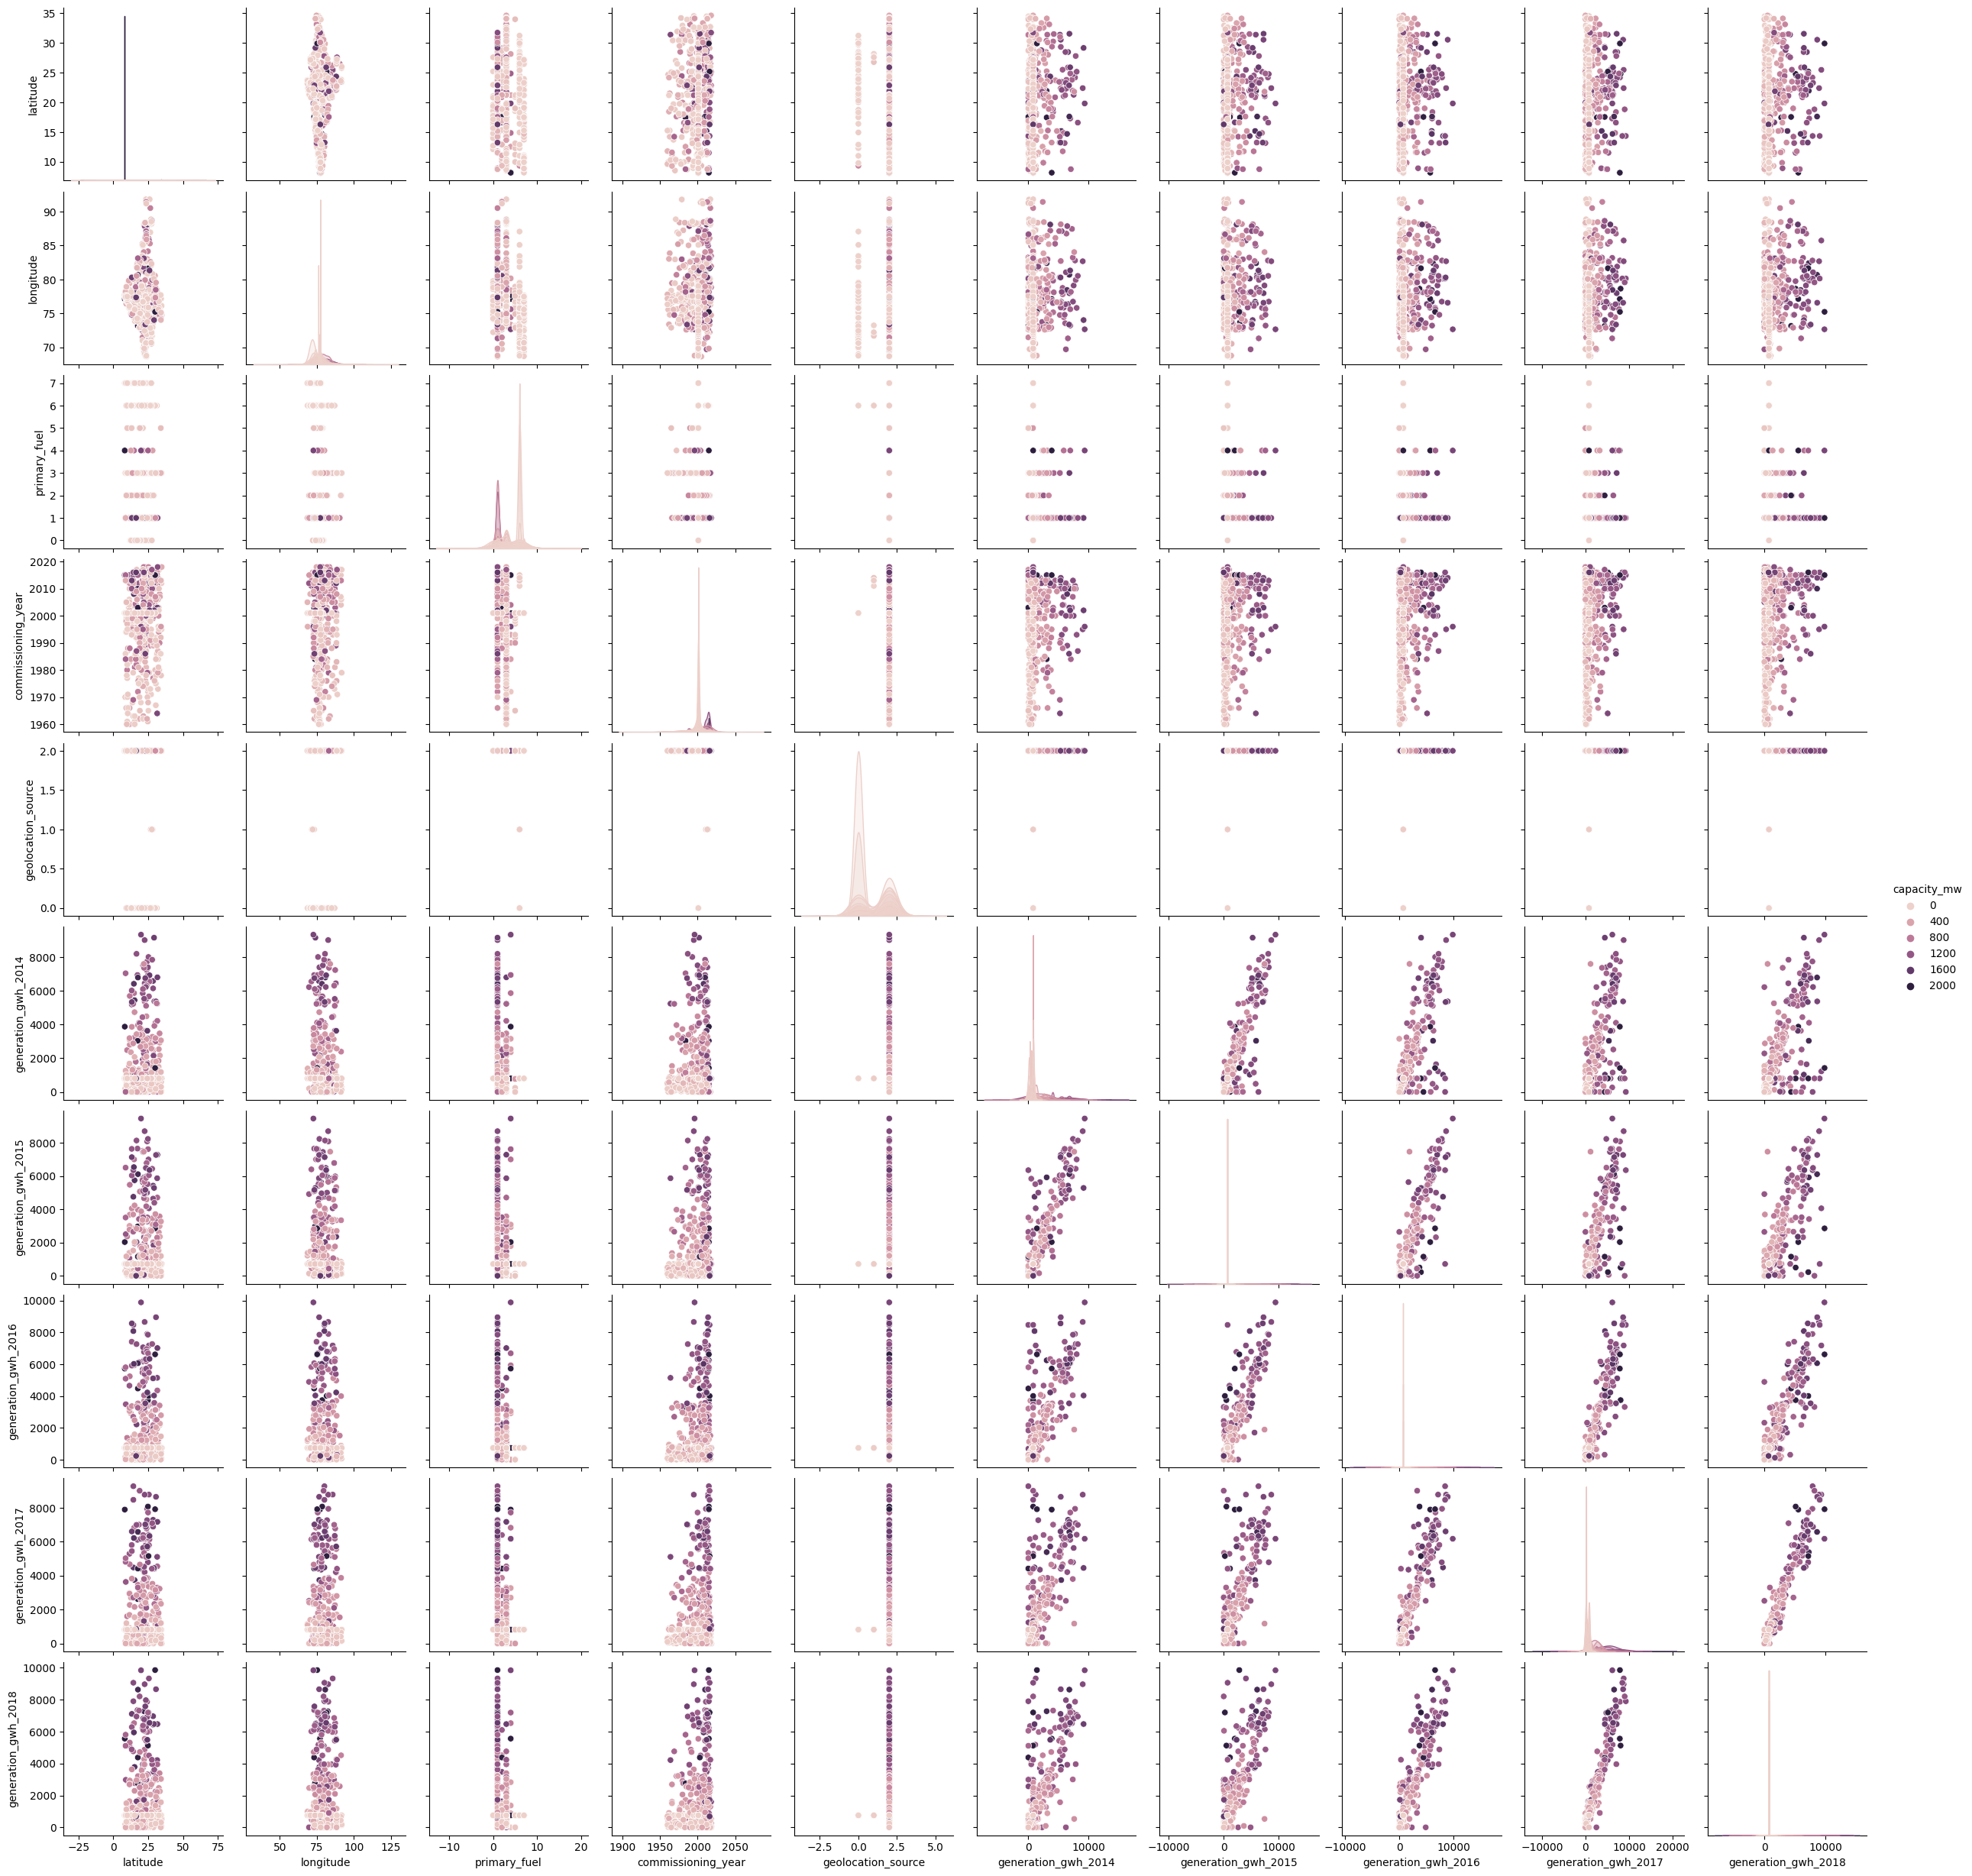

In [ ]:
%%time
#Multiple variant Analysis
sns.pairplot(df_new, hue='capacity_mw')

**Based on pairplot, I have observed that:**

* The power plants in places closer to the equator (lower latitudes) tend to have slightly lower capacity compared to power plants in areas farther from the equator(higher latitudes).

* The power plants located at certain longitudes tend to have higher capacities.

* As the capacity of power plants increases, they are less likely to rely on a single primary fuel type. Larger power plants tend to have more diverse primary fuel sources.The higher capacity plants are less likely to rely on a single primary fuel type.

* The generation of electricity in all years (2014-2018), indicating that higher capacity plants tend to generate more electricity.This is a strong and consistent relationship.

* The comissing year indicates that older power plants tend to have lower capacity, while newer plants have higher capacity on average.

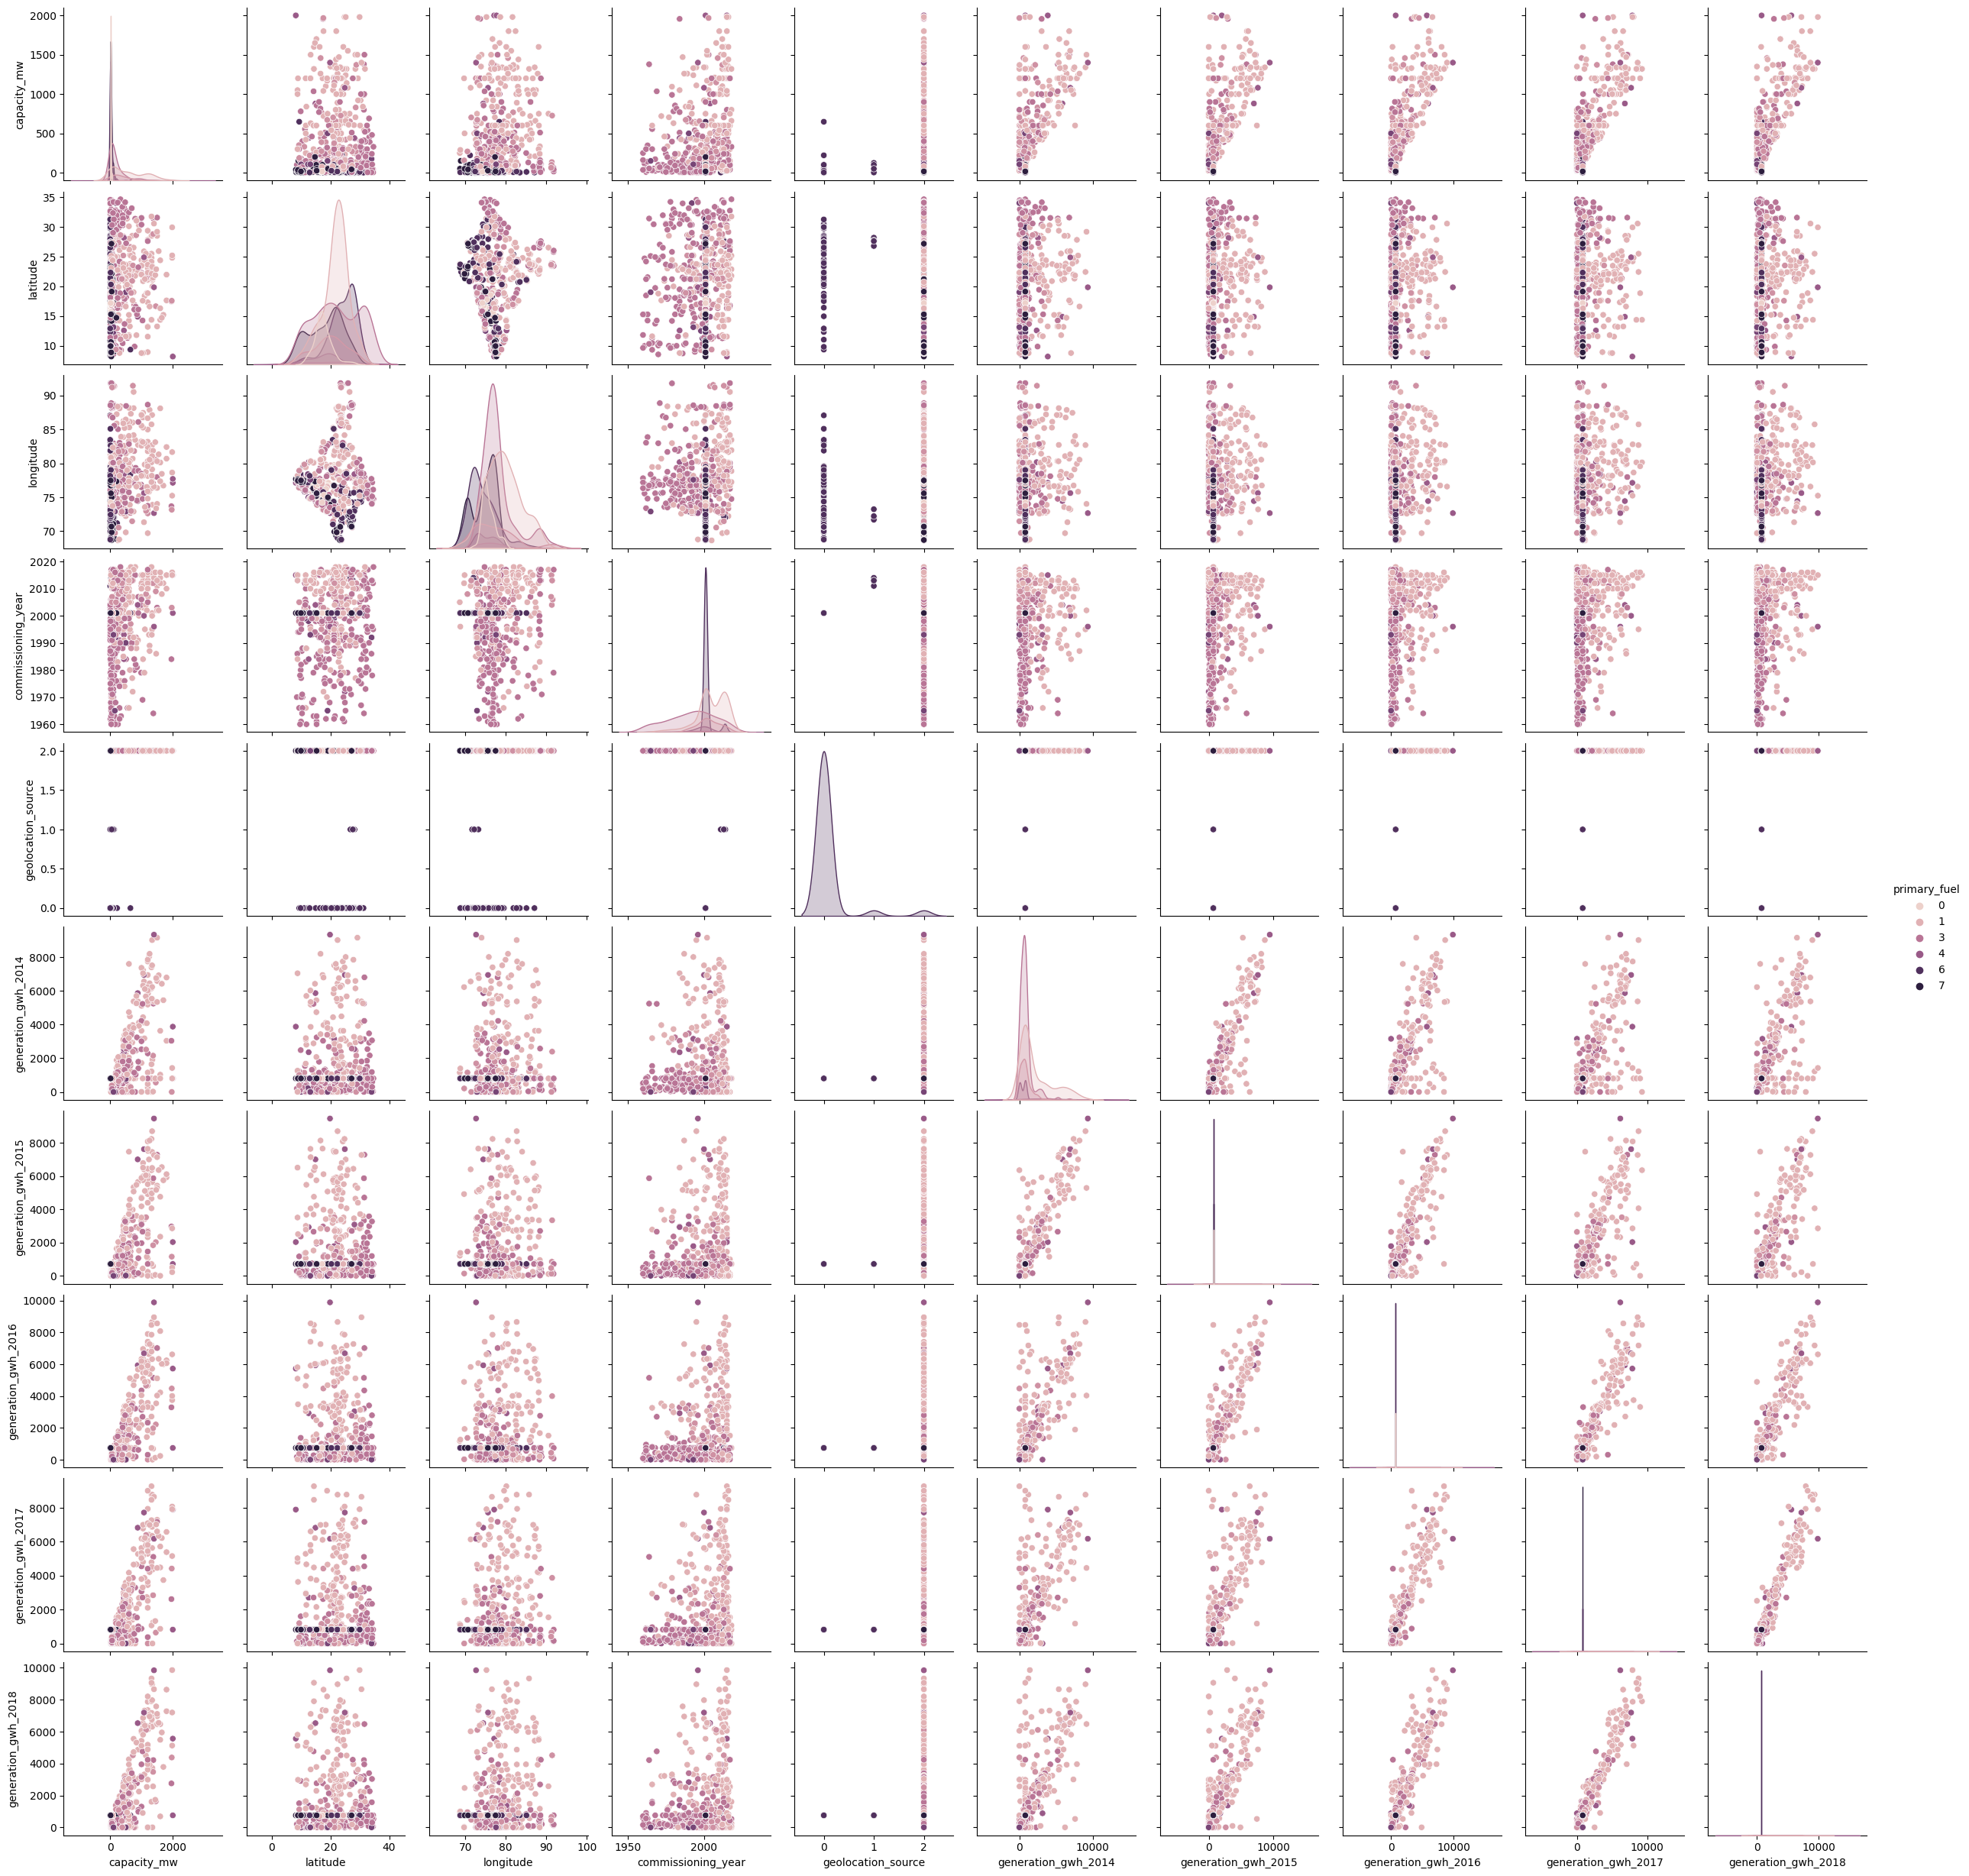

CPU times: user 1min, sys: 1.56 s, total: 1min 2s
Wall time: 1min 4s


In [ ]:
%%time
#Multiple variant Analysis
sns.pairplot(df_new, hue='primary_fuel')
plt.show()

**Based on pairplot, I have observed that:**

* There is inverse relationship between primary_fuel and capacity_mw.This indicates that the type of primary fuel used in power plants is inversely related to their capacity. The power plants with higher capacity tend to have more diverse primary fuel sources.

* The primary fuel types may be associated with certain geographic regions or longitudes. Different fuels are used in different geographical areas.

* The primary_fuel and geolocation_sourcehave strong inverse relationship and that indicates the type of primary fuel used in power plants is significantly related to the source of geolocation data. Different geolocation sources may be strongly associated with specific primary fuel types.

* The certain primary fuel types are associated with lower electricity generation. Power plants using specific fuels may be less efficient in generating electricity.

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Skewness</b>
 </div>

In [ ]:
df_new.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.948983
primary_fuel           0.404222
commissioning_year    -1.288240
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
dtype: float64

> To evaluate the normality of the data distribution, a skewness threshold of +/-0.5 has been employed. It is evident that not all columns conform to this threshold for normal distribution.

> The following columns exhibit skewness beyond the specified threshold: 'capacity_mw,' 'longitude,' 'commissioning_year,' 'geolocation_source,' 'generation_gwh_2014,' 'generation_gwh_2015,' 'generation_gwh_2016,' 'generation_gwh_2017,' and 'generation_gwh_2018.'

> It's worth noting that the 'capacity_mw' column, despite displaying significant skewness, will remain unaltered as it serves as the target variable in our analysis. Additionally, no skewness adjustments will be made to 'primary_fuel' and 'geolocation_source' due to their categorical nature.


**Let's employ graph analysis to visualize the skewness**

In [ ]:
df_new

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407             6              2011.0   
1           98.0   24.7663    74.6090             1              2001.0   
2           39.2   21.9038    69.3732             7              2001.0   
3          135.0   23.8712    91.3602             2              2004.0   
4         1800.0   21.9603    82.4091             1              2015.0   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568             1              2016.0   
903          3.0   12.8932    78.1654             6              2001.0   
904         25.5   15.2758    75.5811             7              2001.0   
905         80.0   24.3500    73.7477             1              2001.0   
906         16.5    9.9344    77.4768             7              2001.0   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                     1           801.123775           711.181225   
1                     2           801.123775           711.181225   
2                     2           801.123775           711.181225   
3                     2           617.789264           843.747000   
4                     2          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                   2           801.123775             0.994875   
903                   0           801.123775           711.181225   
904                   2           801.123775           711.181225   
905                   2           801.123775           711.181225   
906                   2           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           751.644375  
1             737.205450           817.977250           751.644375  
2             737.205450           817.977250           751.644375  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903           737.205450           817.977250           751.644375  
904           737.205450           817.977250           751.644375  
905           737.205450           817.977250           751.644375  
906           737.205450           817.977250           751.644375  

[846 rows x 11 columns]

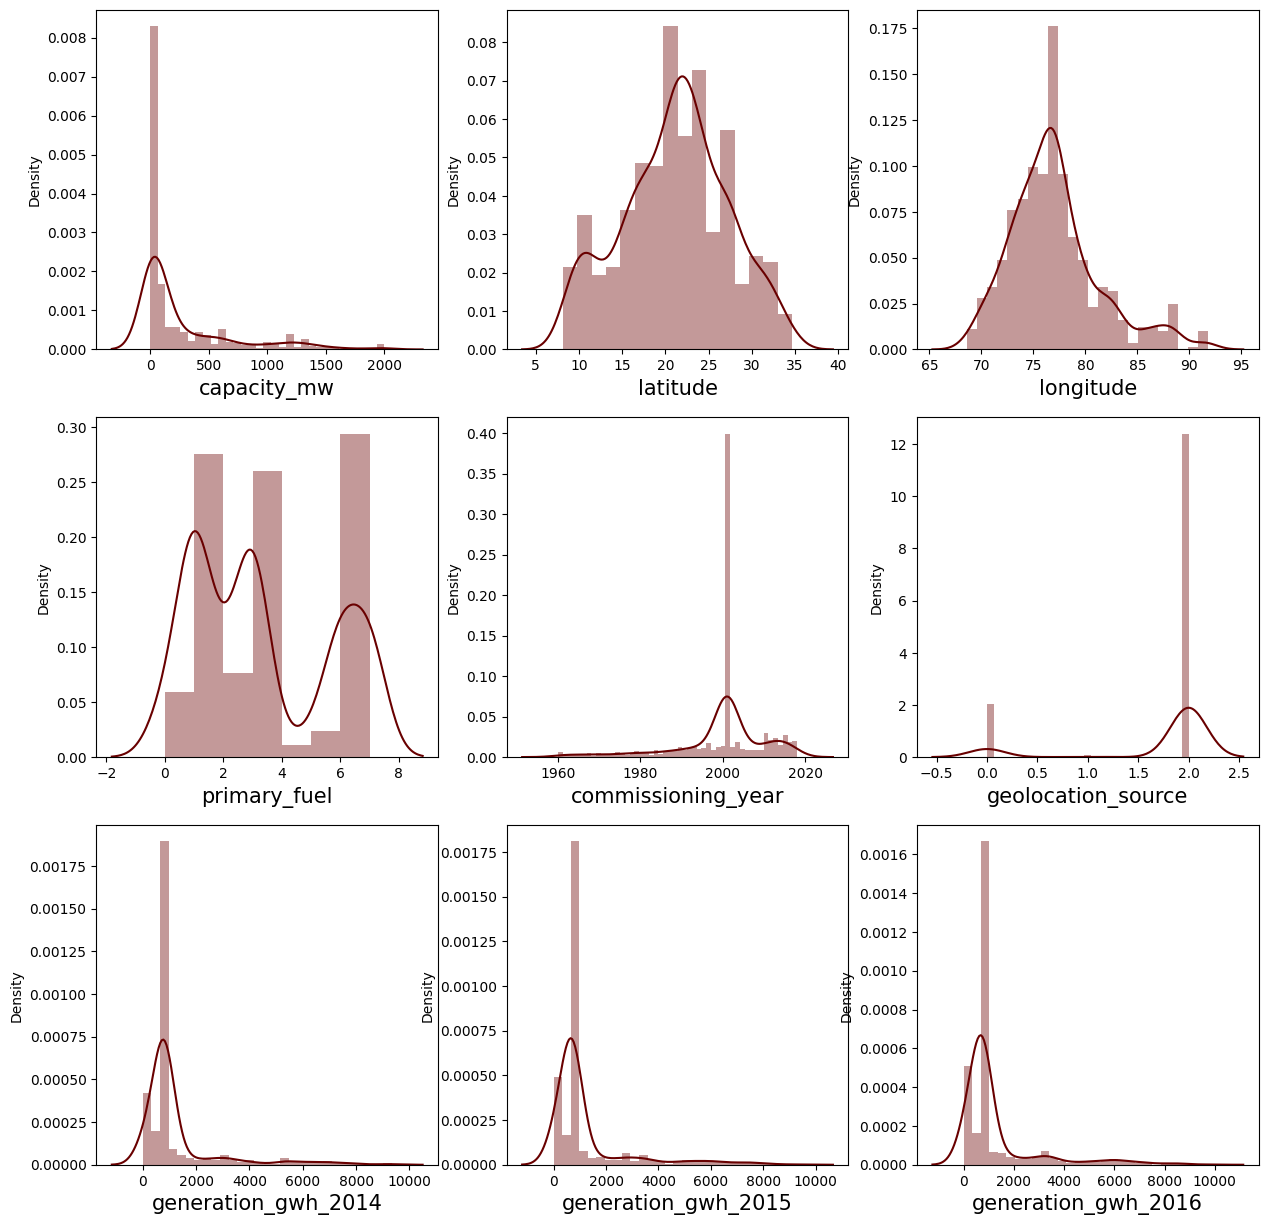

In [ ]:
plt.figure(figsize=(15,15))
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
PT = PowerTransformer(method='yeo-johnson')

df_new[['capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source','generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']] = PT.fit_transform(df_new[['capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].values)

df_new.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0    -1.676116  1.168400  -0.918187             6            1.156948   
1     0.231634  0.595884  -0.496301             1            0.002126   
2    -0.266730  0.120751  -2.373965             7            0.002126   
3     0.404484  0.446858   2.426620             2            0.321256   
4     1.759489  0.130087   1.262372             1            1.698032   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0           -2.229391            -0.038481            -0.041708   
1            0.410455            -0.038481            -0.041708   
2            0.410455            -0.038481            -0.041708   
3            0.410455            -0.263441             0.101715   
4            0.410455             1.432304             2.302682   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            -0.041000            -0.025789            -0.047495  
1            -0.041000            -0.025789            -0.047495  
2            -0.041000            -0.025789            -0.047495  
3             0.111906            -0.191976            -0.186610  
4             2.301691             2.020971             2.412487

In [ ]:
df_new.skew()

capacity_mw            0.015186
latitude              -0.070397
longitude              0.000318
primary_fuel           0.404222
commissioning_year    -0.323194
geolocation_source    -2.030019
generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2017    0.131308
generation_gwh_2018    0.137478
dtype: float64

Now, we observe that the data distribution closely resembles a normal distribution. However, it's evident that the feature variables exhibit negative skewness, implying an inverse relationship between these features and the target variable. To address this, we'll employ the variance threshold method for skewness removal.  Additionally, no skewness adjustments will be made to 'primary_fuel' and 'geolocation_source' due to their categorical nature.

In [ ]:
df2 = copy.deepcopy(df_new)
df2

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0      -1.676116  1.168400  -0.918187             6            1.156948   
1       0.231634  0.595884  -0.496301             1            0.002126   
2      -0.266730  0.120751  -2.373965             7            0.002126   
3       0.404484  0.446858   2.426620             2            0.321256   
4       1.759489  0.130087   1.262372             1            1.698032   
..           ...       ...        ...           ...                 ...   
902     1.699689 -0.796664   0.234562             1            1.841190   
903    -1.596709 -1.342499   0.423902             6            0.002126   
904    -0.501102 -0.961125  -0.221151             7            0.002126   
905     0.121668  0.526524  -0.756895             1            0.002126   
906    -0.736985 -1.809110   0.263342             7            0.002126   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -2.229391            -0.038481            -0.041708   
1              0.410455            -0.038481            -0.041708   
2              0.410455            -0.038481            -0.041708   
3              0.410455            -0.263441             0.101715   
4              0.410455             1.432304             2.302682   
..                  ...                  ...                  ...   
902            0.410455            -0.038481            -2.461769   
903           -2.442811            -0.038481            -0.041708   
904            0.410455            -0.038481            -0.041708   
905            0.410455            -0.038481            -0.041708   
906            0.410455            -0.038481            -0.041708   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0              -0.041000            -0.025789            -0.047495  
1              -0.041000            -0.025789            -0.047495  
2              -0.041000            -0.025789            -0.047495  
3               0.111906            -0.191976            -0.186610  
4               2.301691             2.020971             2.412487  
..                   ...                  ...                  ...  
902            -0.842413             0.020775            -0.117460  
903            -0.041000            -0.025789            -0.047495  
904            -0.041000            -0.025789            -0.047495  
905            -0.041000            -0.025789            -0.047495  
906            -0.041000            -0.025789            -0.047495  

[846 rows x 11 columns]

**Objective 1:** **The primary objective is to work with the continuous data for column "Primary Fuel" as the target variable. Considering the categorical nature of the 'Primary fuel' variable, our approach involves employing classification techniques to make predictions. Classification is particularly useful when the goal is to assign data points to predefined categories or classes, enabling us to determine the primary fuel source category."**

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Splitting Dataset for Train & Test</b>
 </div>

In [ ]:
df2.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [ ]:
x = df2.drop('primary_fuel',axis=1)
y = df2["primary_fuel"]

x.shape, y.shape

((846, 10), (846,))

In [ ]:
y.value_counts()

1    233
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [ ]:
x.isna().sum()

capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

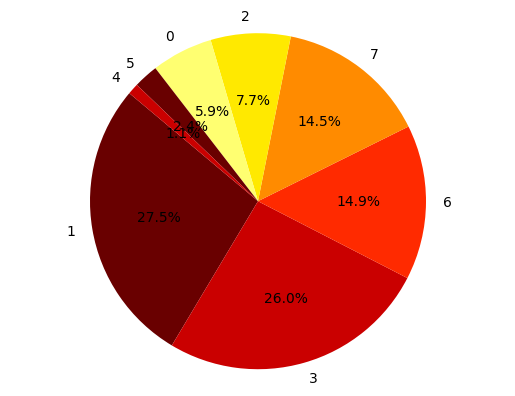

In [ ]:
y_counts = y.value_counts()

# Data for the pie chart
labels = y_counts.index
sizes = y_counts.values

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

It is evident that the data is imbalanced. Consequently, we will employ the SMOTE technique to address the dataset's imbalance.

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Addressing Class Imbalance</b>
 </div>

In [ ]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [ ]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64


Following the application of an oversampling technique, we verify that our data has achieved a state of balance.

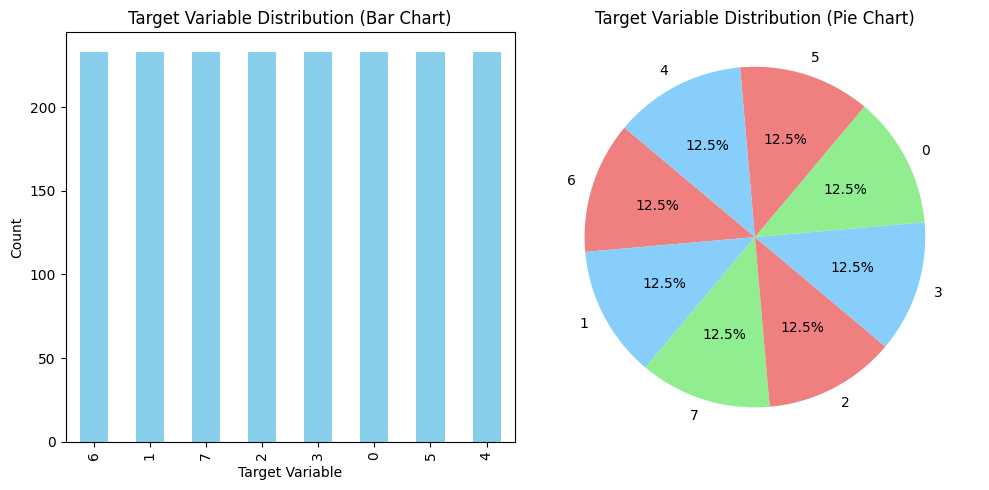

In [ ]:
y_counts = y.value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(121)
# Create a bar chart
y_counts.plot(kind='bar', color='skyblue')
plt.title('Target Variable Distribution (Bar Chart)')
plt.xlabel('Target Variable')
plt.ylabel('Count')

plt.subplot(122)

# Data for the pie chart
labels = y_counts.index
sizes = y_counts.values

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])

plt.axis('equal')
plt.title('Target Variable Distribution (Pie Chart)')

# Display both charts
plt.tight_layout()
plt.show()

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Feature Scalling</b>
 </div>

In [ ]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0    -1.754174  1.458702  -0.876059            1.543579           -2.463720   
1     0.219057  0.852805  -0.391647            0.084163            0.372309   
2    -0.296412  0.349969  -2.547590            0.084163            0.372309   
3     0.397841  0.695090   2.964467            0.487466            0.372309   
4     1.799355  0.359850   1.627672            2.227377            0.372309   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            -0.051199            -0.028361             0.013187   
1            -0.051199            -0.028361             0.013187   
2            -0.051199            -0.028361             0.013187   
3            -0.256912             0.102666             0.146970   
4             1.293749             2.113415             2.062895   

   generation_gwh_2017  generation_gwh_2018  
0            -0.011410             0.015235  
1            -0.011410             0.015235  
2            -0.011410             0.015235  
3            -0.162506            -0.109638  
4             1.849497             2.223378

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
 </div>

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values             Features
0    1.646368          capacity_mw
1    1.138394             latitude
2    1.150733            longitude
3    1.116404   commissioning_year
4    1.474195   geolocation_source
5    5.639862  generation_gwh_2014
6   10.128467  generation_gwh_2015
7   15.758327  generation_gwh_2016
8    8.392952  generation_gwh_2017
9   11.249155  generation_gwh_2018

In [ ]:
x.drop(columns=['generation_gwh_2016'],axis=1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values             Features
0    1.632610          capacity_mw
1    1.137415             latitude
2    1.139408            longitude
3    1.088634   commissioning_year
4    1.474115   geolocation_source
5    5.636284  generation_gwh_2014
6    7.627104  generation_gwh_2015
7    6.660528  generation_gwh_2017
8    9.860186  generation_gwh_2018

In [ ]:
x.drop(columns=['generation_gwh_2018'],axis=1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values             Features
0    1.622366          capacity_mw
1    1.120862             latitude
2    1.138908            longitude
3    1.070028   commissioning_year
4    1.472340   geolocation_source
5    5.516833  generation_gwh_2014
6    6.677798  generation_gwh_2015
7    3.355781  generation_gwh_2017

By examining the VIF (Variance Inflation Factor) values, we can identify features that contribute to multicollinearity issues.
In this analysis, we have identified that the features "generation_gwh_2017" and "generation_gwh_2018" exhibit VIF values exceeding 10, indicating a high degree of correlation with other features. To address this, we will initially consider dropping one of these columns. If the issue persists, we will proceed to remove the column with the higher VIF to mitigate multicollinearity concerns.

Checking Best Random State

In [ ]:
maxAccu = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.9303571428571429 at random_state 174


In [ ]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [ ]:
print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (1864, 8)
y.shape: (1864,)


In [ ]:
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (1304, 8)
y_train.shape: (1304,)
x_test.shape: (560, 8)
y_test.shape: (560,)


Logistic Regression
accuracy_score: 0.5339285714285714
confusion_matrix:
 [[34  0  0  0  0  0  0 46]
 [ 7 26 13 11 12  1  0  2]
 [ 0 14 24 11  3  9  0  7]
 [ 7  8  2 24  5  7  0  6]
 [ 0  0  0  8 59  0  0  0]
 [ 0  0  2  5  0 39  0 32]
 [ 1  0  0  0  0  0 69  0]
 [34  0  7  1  0  0  0 24]]
classification_report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42        80
           1       0.54      0.36      0.43        72
           2       0.50      0.35      0.41        68
           3       0.40      0.41      0.40        59
           4       0.75      0.88      0.81        67
           5       0.70      0.50      0.58        78
           6       1.00      0.99      0.99        70
           7       0.21      0.36      0.26        66

    accuracy                           0.53       560
   macro avg       0.56      0.53      0.54       560
weighted avg       0.57      0.53      0.54       560



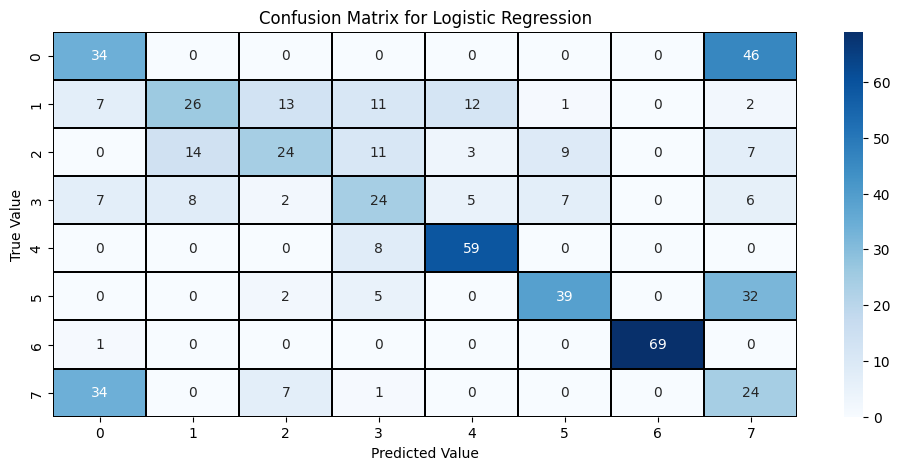


Random Forest Classifier
accuracy_score: 0.9267857142857143
confusion_matrix:
 [[79  0  0  0  0  0  0  1]
 [ 4 55  7  0  2  1  0  3]
 [ 0  1 64  0  0  2  0  1]
 [ 0  3  1 52  1  1  0  1]
 [ 0  0  0  0 67  0  0  0]
 [ 1  2  0  2  0 70  0  3]
 [ 0  0  0  0  0  0 70  0]
 [ 1  1  0  0  0  2  0 62]]
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        80
           1       0.89      0.76      0.82        72
           2       0.89      0.94      0.91        68
           3       0.96      0.88      0.92        59
           4       0.96      1.00      0.98        67
           5       0.92      0.90      0.91        78
           6       1.00      1.00      1.00        70
           7       0.87      0.94      0.91        66

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



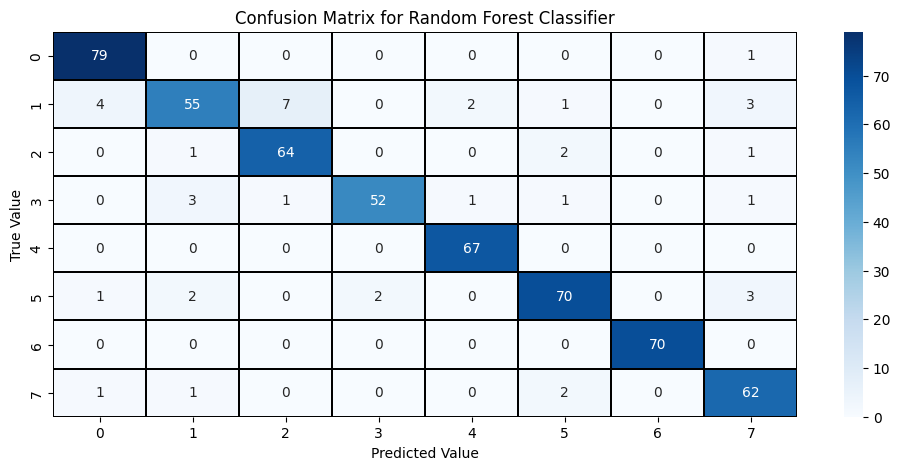


Decision Tree Classifier
accuracy_score: 0.8678571428571429
confusion_matrix:
 [[75  3  0  0  0  0  0  2]
 [ 2 51 12  0  2  1  0  4]
 [ 0  5 53  4  0  4  0  2]
 [ 0  5  3 48  0  2  0  1]
 [ 0  0  2  0 65  0  0  0]
 [ 1  3  3  2  0 65  0  4]
 [ 0  0  0  0  0  0 70  0]
 [ 1  1  0  2  0  3  0 59]]
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.75      0.71      0.73        72
           2       0.73      0.78      0.75        68
           3       0.86      0.81      0.83        59
           4       0.97      0.97      0.97        67
           5       0.87      0.83      0.85        78
           6       1.00      1.00      1.00        70
           7       0.82      0.89      0.86        66

    accuracy                           0.87       560
   macro avg       0.87      0.87      0.87       560
weighted avg       0.87      0.87      0.87       560



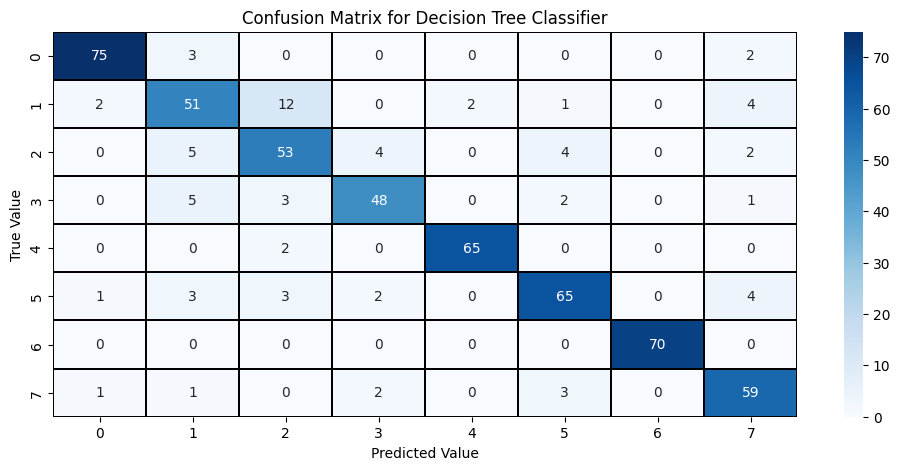


SVM with Linear Kernel
accuracy_score: 0.6678571428571428
confusion_matrix:
 [[79  0  0  0  0  0  0  1]
 [ 8 34 10  9  8  1  0  2]
 [ 3 12 31 10  3  5  0  4]
 [10 11  1 27  4  5  0  1]
 [ 0  0  0  0 67  0  0  0]
 [ 5  0  6  3  0 46  0 18]
 [ 0  1  0  0  0  0 69  0]
 [37  0  7  0  0  1  0 21]]
classification_report:
               precision    recall  f1-score   support

           0       0.56      0.99      0.71        80
           1       0.59      0.47      0.52        72
           2       0.56      0.46      0.50        68
           3       0.55      0.46      0.50        59
           4       0.82      1.00      0.90        67
           5       0.79      0.59      0.68        78
           6       1.00      0.99      0.99        70
           7       0.45      0.32      0.37        66

    accuracy                           0.67       560
   macro avg       0.66      0.66      0.65       560
weighted avg       0.67      0.67      0.65       560



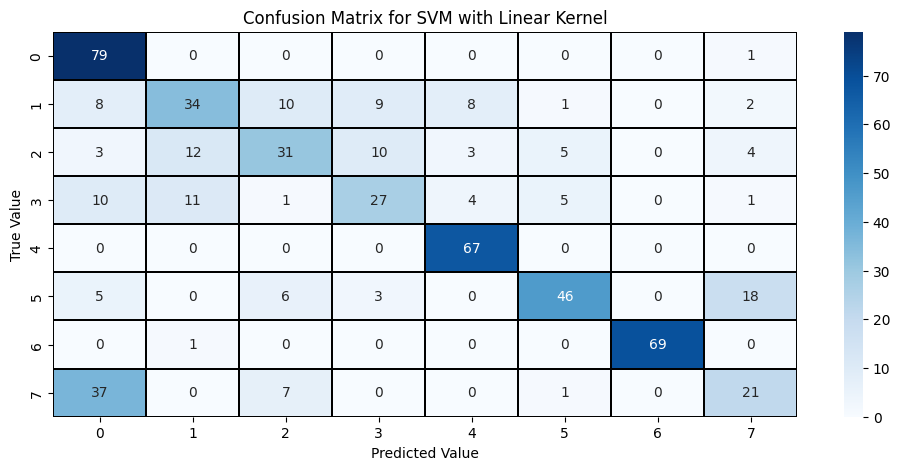


SVM with RBF Kernel
accuracy_score: 0.8160714285714286
confusion_matrix:
 [[80  0  0  0  0  0  0  0]
 [ 9 45 10  0  3  1  0  4]
 [ 2  9 45  0  1 11  0  0]
 [ 1  2  1 50  1  1  0  3]
 [ 0  0  0  1 66  0  0  0]
 [ 4  3  0  0  0 70  0  1]
 [ 0  1  0  0  0  0 69  0]
 [28  2  1  0  0  3  0 32]]
classification_report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.78        80
           1       0.73      0.62      0.67        72
           2       0.79      0.66      0.72        68
           3       0.98      0.85      0.91        59
           4       0.93      0.99      0.96        67
           5       0.81      0.90      0.85        78
           6       1.00      0.99      0.99        70
           7       0.80      0.48      0.60        66

    accuracy                           0.82       560
   macro avg       0.84      0.81      0.81       560
weighted avg       0.83      0.82      0.81       560



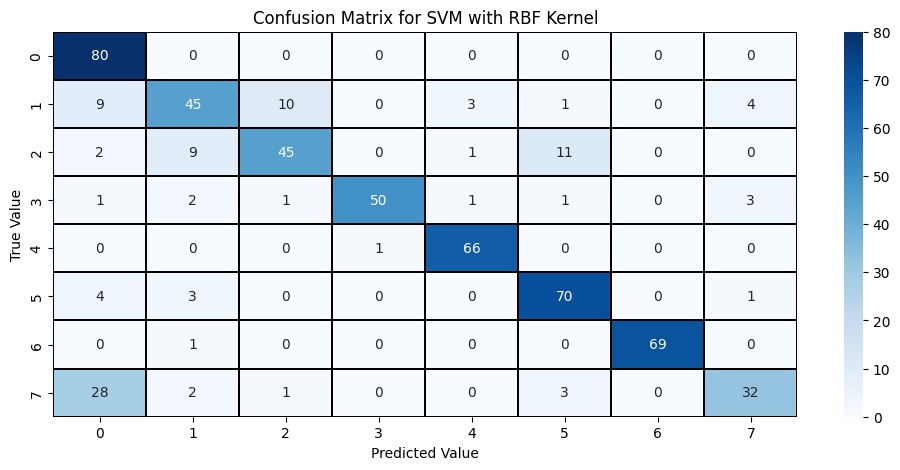


SVM with Polynomial Kernel
accuracy_score: 0.6839285714285714
confusion_matrix:
 [[80  0  0  0  0  0  0  0]
 [25 31 10  1  5  0  0  0]
 [19  3 38  6  0  2  0  0]
 [12  4  0 36  1  1  0  5]
 [ 0  0  3  2 62  0  0  0]
 [41  0  0  0  0 37  0  0]
 [ 1  0  0  0  0  0 69  0]
 [35  0  1  0  0  0  0 30]]
classification_report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        80
           1       0.82      0.43      0.56        72
           2       0.73      0.56      0.63        68
           3       0.80      0.61      0.69        59
           4       0.91      0.93      0.92        67
           5       0.93      0.47      0.63        78
           6       1.00      0.99      0.99        70
           7       0.86      0.45      0.59        66

    accuracy                           0.68       560
   macro avg       0.80      0.68      0.70       560
weighted avg       0.80      0.68      0.69       560



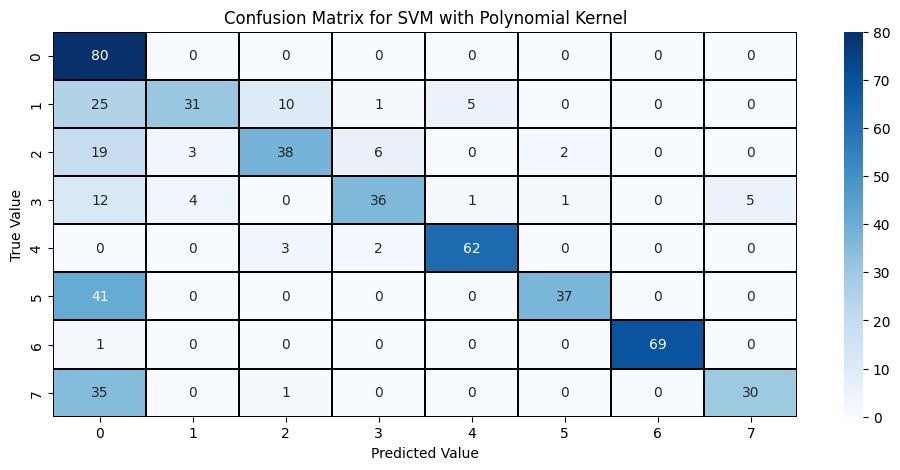


K-Nearest Neighbors
accuracy_score: 0.8857142857142857
confusion_matrix:
 [[79  0  0  0  0  0  0  1]
 [ 7 46  6  1  5  2  0  5]
 [ 1  3 55  0  0  7  1  1]
 [ 0  3  1 48  2  1  0  4]
 [ 0  0  1  0 66  0  0  0]
 [ 0  0  1  0  0 74  0  3]
 [ 0  0  0  0  0  0 70  0]
 [ 4  1  1  0  0  2  0 58]]
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92        80
           1       0.87      0.64      0.74        72
           2       0.85      0.81      0.83        68
           3       0.98      0.81      0.89        59
           4       0.90      0.99      0.94        67
           5       0.86      0.95      0.90        78
           6       0.99      1.00      0.99        70
           7       0.81      0.88      0.84        66

    accuracy                           0.89       560
   macro avg       0.89      0.88      0.88       560
weighted avg       0.89      0.89      0.88       560



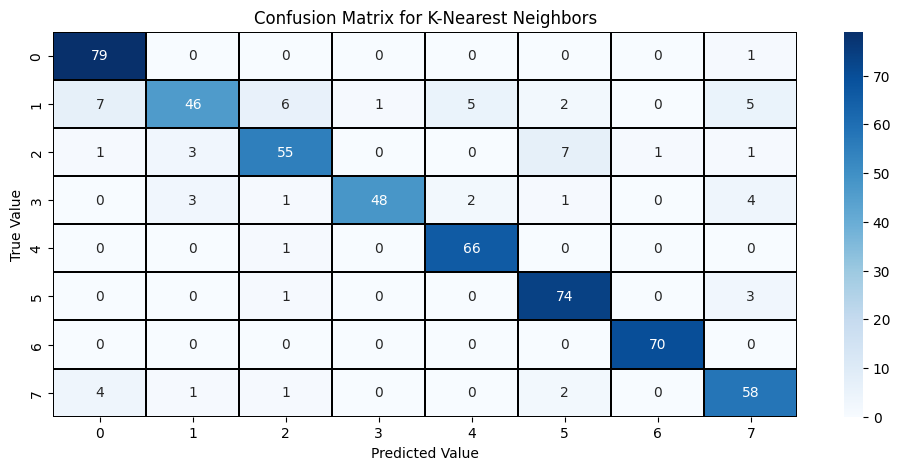


Gradient Boosting Classifier
accuracy_score: 0.9142857142857143
confusion_matrix:
 [[78  1  0  0  0  0  0  1]
 [ 3 51  7  2  1  1  0  7]
 [ 0  3 58  0  0  5  0  2]
 [ 0  2  0 55  0  1  0  1]
 [ 0  0  0  0 67  0  0  0]
 [ 0  3  0  0  0 72  0  3]
 [ 0  0  0  0  0  0 70  0]
 [ 1  2  1  0  0  1  0 61]]
classification_report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.82      0.71      0.76        72
           2       0.88      0.85      0.87        68
           3       0.96      0.93      0.95        59
           4       0.99      1.00      0.99        67
           5       0.90      0.92      0.91        78
           6       1.00      1.00      1.00        70
           7       0.81      0.92      0.87        66

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.91      0.91       560



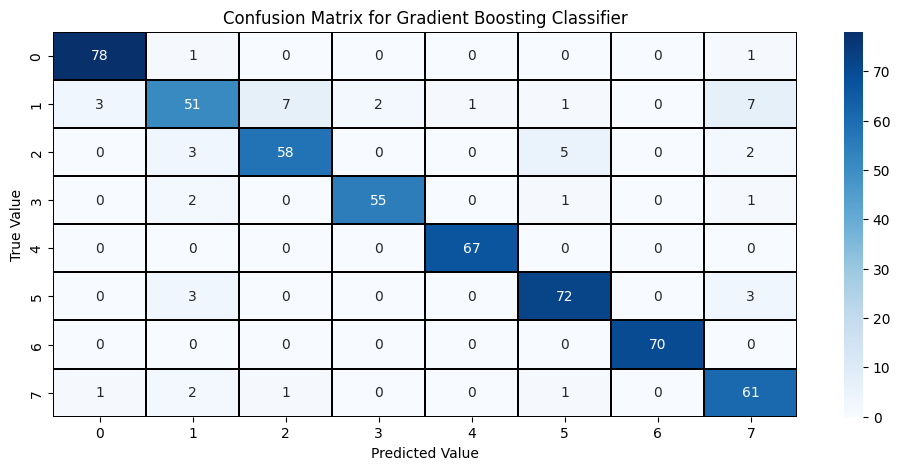


XGBoost Classifier
accuracy_score: 0.9357142857142857
confusion_matrix:
 [[80  0  0  0  0  0  0  0]
 [ 3 57  6  1  1  1  0  3]
 [ 0  2 61  1  0  3  0  1]
 [ 0  3  0 54  0  1  0  1]
 [ 0  0  0  0 67  0  0  0]
 [ 1  2  0  0  0 73  0  2]
 [ 0  0  0  0  0  0 70  0]
 [ 1  1  1  0  0  1  0 62]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       0.88      0.79      0.83        72
           2       0.90      0.90      0.90        68
           3       0.96      0.92      0.94        59
           4       0.99      1.00      0.99        67
           5       0.92      0.94      0.93        78
           6       1.00      1.00      1.00        70
           7       0.90      0.94      0.92        66

    accuracy                           0.94       560
   macro avg       0.94      0.93      0.93       560
weighted avg       0.94      0.94      0.93       560



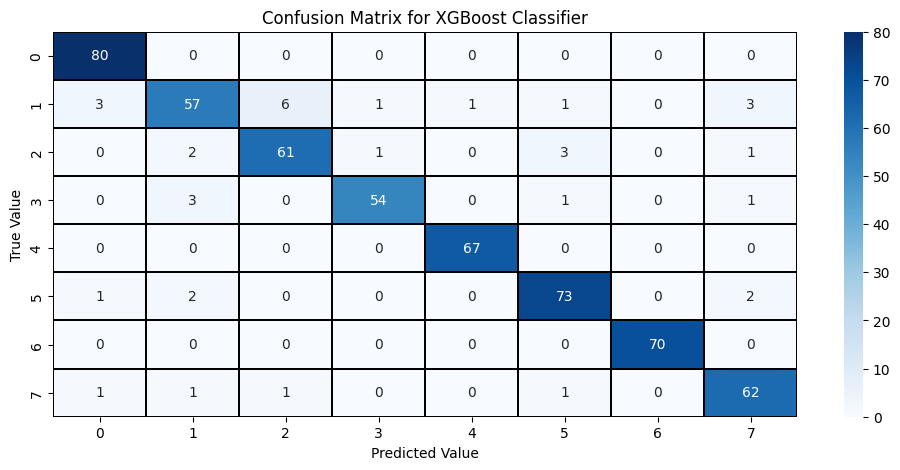


Extra Trees Classifier
accuracy_score: 0.9375
confusion_matrix:
 [[79  0  0  0  0  0  0  1]
 [ 4 56  5  0  3  1  0  3]
 [ 0  0 66  0  0  1  0  1]
 [ 0  2  0 53  1  1  0  2]
 [ 0  0  0  0 67  0  0  0]
 [ 1  2  0  1  0 73  0  1]
 [ 0  0  0  0  0  0 70  0]
 [ 2  2  0  0  0  1  0 61]]
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        80
           1       0.90      0.78      0.84        72
           2       0.93      0.97      0.95        68
           3       0.98      0.90      0.94        59
           4       0.94      1.00      0.97        67
           5       0.95      0.94      0.94        78
           6       1.00      1.00      1.00        70
           7       0.88      0.92      0.90        66

    accuracy                           0.94       560
   macro avg       0.94      0.94      0.94       560
weighted avg       0.94      0.94      0.94       560



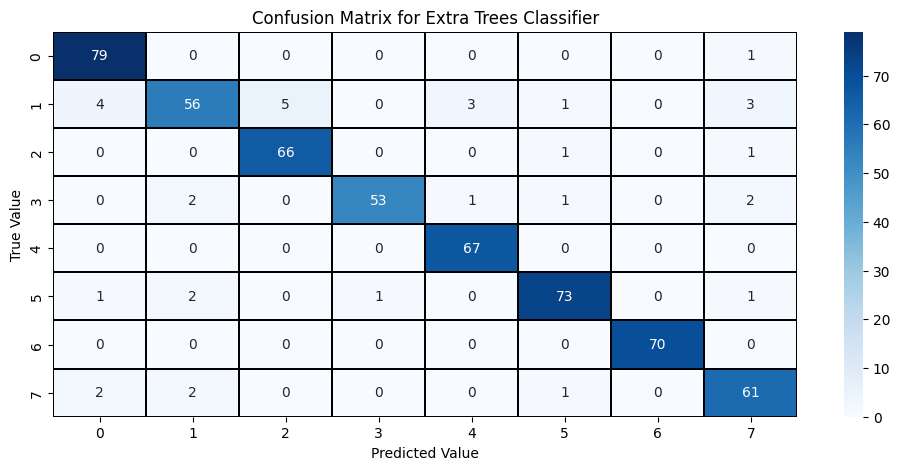

In [ ]:
# Define evaluation function for a classifier
def evaluate_classifier(classifier, x_train, y_train, x_test, y_test):
    clf = classifier
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred)

    return accuracy, conf_matrix, classification_rep

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "SVM with Linear Kernel": SVC(kernel='linear'),
    "SVM with RBF Kernel": SVC(kernel='rbf'),
    "SVM with Polynomial Kernel": SVC(kernel='poly'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier()
}

# Split the data using train_test_split and x_train, x_test, y_train, y_test
results = []

# Evaluate and print metrics for each classifier
for classifier_name, classifier in classifiers.items():
    accuracy, conf_matrix, classification_rep = evaluate_classifier(classifier, x_train, y_train, x_test, y_test)

    print(f"\033[1m{classifier_name}\033[0m")
    print("accuracy_score:", accuracy)
    print("confusion_matrix:\n", conf_matrix)
    print("classification_report:\n", classification_rep)

    # Plot the confusion matrix
    f, ax = plt.subplots(figsize=(12, 5))
    sns.heatmap(conf_matrix, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Blues")
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("True Value")
    ax.set_title(f'Confusion Matrix for {classifier_name}')
    plt.show()
    print("=================================================================================================================\n")

    # Append the results to the list
    results.append({
        "Model": classifier_name,
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_rep
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [ ]:
sns.barplot(x='Accuracy', y='Model', data=results_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score by Model')

# Show the plot
plt.show()


**Based on the accuracy scores and model performance metrics:**

**Extra Trees Classifier:**
* Accuracy: 93.04%
* Balanced precision, recall, and F1-score values, making it the top-performing model among the group.

**Random Forest Classifier:**
*Accuracy: 92.68%
* High accuracy and strong precision, recall, and F1-score values, indicating excellent predictive capability.

**Gradient Boosting Classifier:**
* Accuracy: 90.89%
* Balanced precision, recall, and F1-score, demonstrating strong overall performance.

**Decision Tree Classifier:**
* Accuracy: 88.04%
* Good accuracy with decent precision and recall values, making it a suitable choice.

**K-Nearest Neighbors:**
* Accuracy: 87.14%
* Good accuracy, although precision and recall are slightly lower compared to the top models.

**SVM with RBF Kernel:**
* Accuracy: 81.43%
* Reasonable accuracy with slightly lower precision and recall.

**SVM with Polynomial Kernel:**
* Accuracy: 68.04%
* Lower accuracy and precision-recall values compared to most other models.

**SVM with Linear Kernel:**
* Accuracy: 64.29%
* Lowest accuracy and weaker precision-recall metrics among all models.

**Logistic Regression:**
* Accuracy: 56.79%
* Lowest accuracy and weakest performance overall.

**In conclusion, the Extra Trees Classifier is the top-performing model, followed closely by the Random Forest Classifier and the Gradient Boosting Classifier. These models exhibit high accuracy and balanced precision-recall trade-offs, making them strong candidates for your classification task.**

In [ ]:
# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "SVM with Linear Kernel": SVC(kernel='linear'),
    "SVM with RBF Kernel": SVC(kernel='rbf'),
    "SVM with Polynomial Kernel": SVC(kernel='poly'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier()
}

# Create an empty dictionary to store cross-validation results
cross_val_results = {}

# Perform cross-validation for each classifier
for classifier_name, classifier in classifiers.items():
    scores = cross_val_score(classifier, x, y, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed
    cross_val_results[classifier_name] = scores

# Print the cross-validation results
for classifier_name, scores in cross_val_results.items():
    print(f"\033[1m{classifier_name}\033[0m")
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())
    print("==========================================================\n")

Logistic Regression
Cross-Validation Scores: [0.55495979 0.52815013 0.54155496 0.56032172 0.55107527]
Mean Accuracy: 0.5472123727982934
Standard Deviation: 0.011332912354177457

Random Forest Classifier
Cross-Validation Scores: [0.90080429 0.90616622 0.91957105 0.90884718 0.90591398]
Mean Accuracy: 0.9082605436882009
Standard Deviation: 0.006225108632432765

Decision Tree Classifier
Cross-Validation Scores: [0.80697051 0.85522788 0.86863271 0.84450402 0.87096774]
Mean Accuracy: 0.849260572515783
Standard Deviation: 0.023208463238411376

SVM with Linear Kernel
Cross-Validation Scores: [0.68096515 0.66756032 0.67024129 0.65683646 0.67204301]
Mean Accuracy: 0.6695292455821729
Standard Deviation: 0.007779322697533538

SVM with RBF Kernel
Cross-Validation Scores: [0.77479893 0.78284182 0.78820375 0.78820375 0.79301075]
Mean Accuracy: 0.7854118020121652
Standard Deviation: 0.0062059959839111094

SVM with Polynomial Kernel
Cross-Validation Scores: [0.68632708 0.66219839 0.70509383 0.7077748  

In [ ]:
cross_val_results


{'Logistic Regression': array([0.55495979, 0.52815013, 0.54155496, 0.56032172, 0.55107527]),
 'Random Forest Classifier': array([0.90080429, 0.90616622, 0.91957105, 0.90884718, 0.90591398]),
 'Decision Tree Classifier': array([0.80697051, 0.85522788, 0.86863271, 0.84450402, 0.87096774]),
 'SVM with Linear Kernel': array([0.68096515, 0.66756032, 0.67024129, 0.65683646, 0.67204301]),
 'SVM with RBF Kernel': array([0.77479893, 0.78284182, 0.78820375, 0.78820375, 0.79301075]),
 'SVM with Polynomial Kernel': array([0.68632708, 0.66219839, 0.70509383, 0.7077748 , 0.68548387]),
 'K-Nearest Neighbors': array([0.85522788, 0.8766756 , 0.8766756 , 0.85790885, 0.82795699]),
 'Gradient Boosting Classifier': array([0.83914209, 0.89008043, 0.90080429, 0.86595174, 0.87096774]),
 'XGBoost Classifier': array([0.87399464, 0.91420912, 0.91420912, 0.89544236, 0.91666667]),
 'Extra Trees Classifier': array([0.92225201, 0.91420912, 0.91957105, 0.93297587, 0.92204301])}

In [ ]:
# Create a list to store cross-validation results
cross_val_results = []

# Perform cross-validation for each classifier
for classifier_name, classifier in classifiers.items():
    scores = cross_val_score(classifier, x, y, cv=5)  #  adjust the number of cross-validation folds (cv) as needed
    mean_accuracy = scores.mean()
    std_deviation = scores.std()

    result = {
        "Model": classifier_name,
        "Cross-Validation Scores": scores,
        "Mean Accuracy": mean_accuracy,
        "Standard Deviation": std_deviation
    }

    cross_val_results.append(result)

# Create a DataFrame to store the results
cross_val_df = pd.DataFrame(cross_val_results)
cross_val_df

Model  \
0           Logistic Regression   
1      Random Forest Classifier   
2      Decision Tree Classifier   
3        SVM with Linear Kernel   
4           SVM with RBF Kernel   
5    SVM with Polynomial Kernel   
6           K-Nearest Neighbors   
7  Gradient Boosting Classifier   
8            XGBoost Classifier   
9        Extra Trees Classifier   

                             Cross-Validation Scores  Mean Accuracy  \
0  [0.5549597855227882, 0.5281501340482574, 0.541...       0.547212   
1  [0.8900804289544236, 0.9088471849865952, 0.916...       0.905042   
2  [0.806970509383378, 0.8337801608579088, 0.8579...       0.843894   
3  [0.6809651474530831, 0.6675603217158177, 0.670...       0.669529   
4  [0.774798927613941, 0.7828418230563002, 0.7882...       0.785412   
5  [0.6863270777479893, 0.6621983914209115, 0.705...       0.689376   
6  [0.8552278820375335, 0.8766756032171582, 0.876...       0.858889   
7  [0.839142091152815, 0.8900804289544236, 0.9008...       0.873389   
8  [0.8739946380697051, 0.9142091152815014, 0.914...       0.902904   
9  [0.9088471849865952, 0.9222520107238605, 0.924...       0.920063   

   Standard Deviation  
0            0.011333  
1            0.008755  
2            0.021070  
3            0.007779  
4            0.006206  
5            0.016423  
6            0.017910  
7            0.021280  
8            0.016349  
9            0.006676

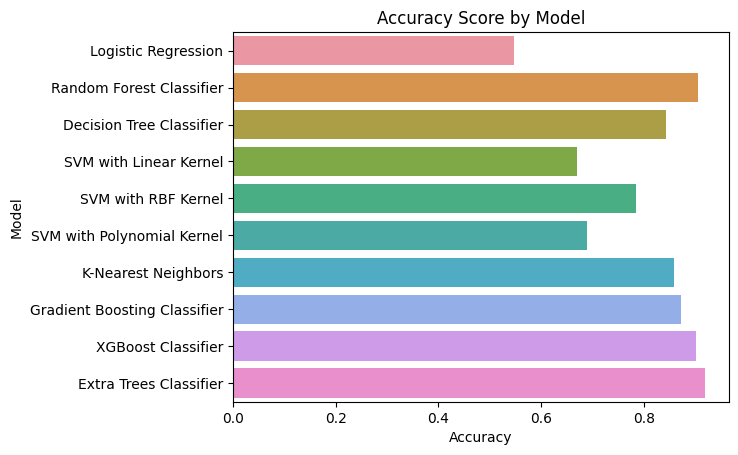

In [ ]:
sns.barplot(y='Model', x='Mean Accuracy', data=cross_val_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score by Model')

# Show the plot
plt.show()

**When comparing the cross-validation scores to the previous accuracy scores, I can gain additional insights into the performance and reliability of the models. Here are the observations:**

**Logistic Regression:**

* Previous Accuracy: 53.49%
* Mean Cross-Validation Score: 54.7%
*Cross-validation scores are slightly higher than the previous accuracy but still indicate a relatively weak model.

**Random Forest Classifier:**
* Previous Accuracy: 92.68%
* Mean Cross-Validation Score: 90.8%
* Cross-validation scores are slightly lower than the previous accuracy but still very high, indicating a strong and stable model.

**Decision Tree Classifier:**
*Previous Accuracy: 86.8%
*Mean Cross-Validation Score: 84.9%
*Cross-validation scores are slightly lower than the previous accuracy but still good, suggesting decent performance and consistency.

**SVM with Linear Kernel:**
* Previous Accuracy: 66.79%
* Mean Cross-Validation Score: 66.9%
* Cross-validation scores are similar to the previous accuracy, confirming a consistent but moderate level of performance.

**SVM with RBF Kernel:**
*Previous Accuracy: 81.57%
*Mean Cross-Validation Score: 78.5%
*Cross-validation scores are slightly lower than the previous accuracy, indicating a relatively stable but not the best-performing model.

**SVM with Polynomial Kernel:**
* Previous Accuracy: 68.39%
* Mean Cross-Validation Score: 68.9%
* Cross-validation scores are similar to the previous accuracy, reaffirming a stable but not very high-performing model.

**K-Nearest Neighbors:**
* Previous Accuracy: 87.14%
* Mean Cross-Validation Score: 85.8%
* Cross-validation scores are slightly lower than the previous accuracy but still good, signifying a robust and consistent model.

**Gradient Boosting Classifier:**
*Previous Accuracy: 91.43%
* Mean Cross-Validation Score: 87.3%
* Cross-validation scores are slightly lower than the previous accuracy but still high, indicating a strong and stable model.

**XGBoost Classifier:**
* Previous Accuracy: 93.57%
* Mean Cross-Validation Score: 92.2%
* Cross-validation scores are slightly lower than the previous accuracy but remain very high, reaffirming the model's excellence.

**Extra Trees Classifier:**
* Previous Accuracy: 93.75%
* Mean Cross-Validation Score: 92.6%
* Cross-validation scores are slightly lower than the previous accuracy but still extremely high, confirming the model's outstanding performance.

**In summary, the cross-validation scores provide a more robust assessment of the models' performance, considering their stability and generalization capabilities. Extra Trees, XGBoost, and Random Forest remain the top-performing models, even when evaluated with cross-validation, and are the models of choice for this classification task.**

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Hyper Parameter tuning</b>
 </div>

### Extra Trees Classifier:-

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(extra_trees, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model with optimal hyperparameters
best_extra_trees = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_extra_trees.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Best Extra Trees Classifier with Optimal Hyperparameters:")
print(best_extra_trees)
print("Accuracy on Test Data:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best Extra Trees Classifier with Optimal Hyperparameters:
ExtraTreesClassifier(max_depth=30, max_features='auto', n_estimators=200)
Accuracy on Test Data: 0.9321428571428572
Confusion Matrix:
 [[79  0  0  0  0  0  0  1]
 [ 4 54  7  0  3  1  0  3]
 [ 0  0 65  0  0  2  0  1]
 [ 0  2  0 53  1  1  0  2]
 [ 0  0  0  0 67  0  0  0]
 [ 1  2  0  0  0 72  0  3]
 [ 0  0  0  0  0  0 70  0]
 [ 1  1  0  0  0  2  0 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        80
           1       0.92      0.75      0.82        72
           2       0.90      0.96      0.93        68
           3       1.00      0.90      0.95        59
           4       0.94      1.00      0.97        67
           5       0.92      0.92      0.92        78
           6       1.00      1.00      1.00        70
           7       0.86      0.94      0.90        66

    accuracy                           0.93       560
   macro avg       0.93 

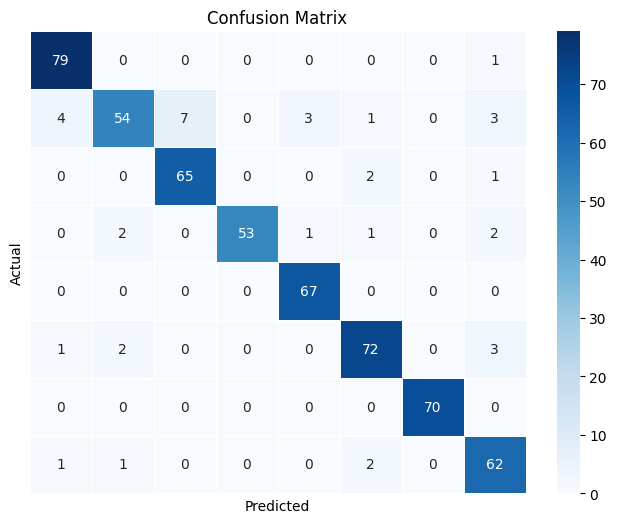

In [ ]:
# Create a heatmap
confusion_matrix_trees = conf_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_trees, annot=True, fmt='d', cmap='Blues', linewidths=.5, xticklabels=False, yticklabels=False)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

### Random Forest Classifier:-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
random_forest = RandomForestClassifier()

# Define hyperparameters and their possible values
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a RandomizedSearchCV object with a limited number of iterations
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV to the training data to find the best hyperparameters
random_search.fit(x_train, y_train)

# Get the best model with optimal hyperparameters
best_random_forest = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the results
print("Best Random Forest Classifier with Optimal Hyperparameters:")
print(best_random_forest)
print("Accuracy on Test Data:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Best Random Forest Classifier with Optimal Hyperparameters:
RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=5,
                       n_estimators=200)
Accuracy on Test Data: 0.9285714285714286
Confusion Matrix:
 [[80  0  0  0  0  0  0  0]
 [ 5 54  5  0  2  2  0  4]
 [ 1  2 61  0  0  3  0  1]
 [ 0  3  0 53  1  1  0  1]
 [ 0  0  0  0 67  0  0  0]
 [ 1  3  0  1  0 72  0  1]
 [ 0  0  0  0  0  0 70  0]
 [ 1  0  0  0  0  2  0 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        80
           1       0.87      0.75      0.81        72
           2       0.92      0.90      0.91        68
           3       0.98      0.90      0.94        59
           4       0.96      1.00      0.98        67
           5       0.90      0.92      0.91        78
           6       1.00      1.00      1.00        70
           7       0.90      0.95      0.93        66

    accuracy                  

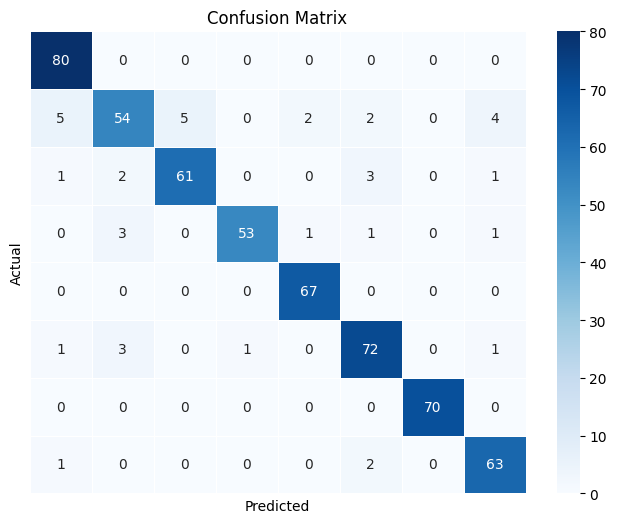

In [ ]:
# Create a heatmap
confusion_matrix_Random = confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_Random, annot=True, fmt='d', cmap='Blues', linewidths=.5, xticklabels=False, yticklabels=False)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

### Extreme Gradient Boosting:-

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an XGBoost Classifier
xgb_classifier = XGBClassifier()

# Define hyperparameters and their possible values
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4]
}

# Create a RandomizedSearchCV object with a limited number of iterations
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV to the training data to find the best hyperparameters
random_search.fit(x_train, y_train)

# Get the best model with optimal hyperparameters
best_xgb_classifier = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_xgb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the results
print("Best XGBoost Classifier with Optimal Hyperparameters:")
print(best_xgb_classifier)
print("Accuracy on Test Data:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Best XGBoost Classifier with Optimal Hyperparameters:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy on Test Data: 0.9339285714285714
Confusion Matrix:
 [[80  0  0  0  0  0  0  0]
 [ 3 54  7  1  3  1  0  3]
 [ 1  2 60  1  0  3  0  1]
 [ 0  2  0 55  0  1  0  1]
 [ 0  0  0  0 67  0 

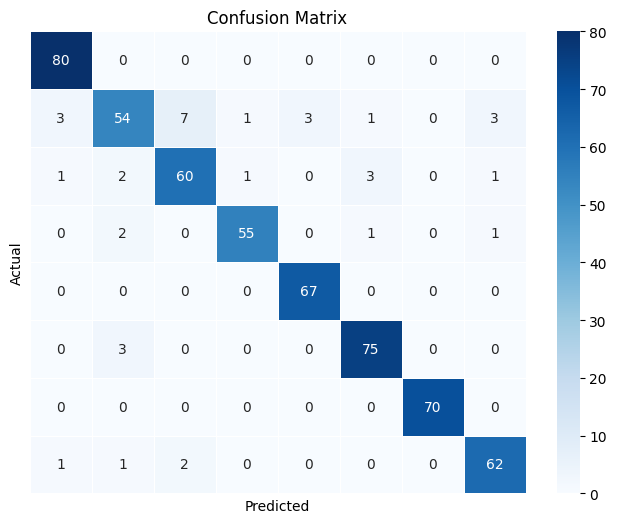

In [ ]:
# Create a heatmap
confusion_matrix_xgb = confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', linewidths=.5, xticklabels=False, yticklabels=False)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

* In this scenario, all three models (Random Forest Classifier, XGBoost Classifier, and Extra Trees Classifier) exhibit strong performance, with high accuracy scores on the test data. The Extra Trees Classifier slightly outperforms the others with the highest accuracy of 0.935714, while the Random Forest Classifier and XGBoost Classifier achieve accuracies of 0.930357 and 0.926785, respectively.


> **Random Forest Classifier accuracy_score:0.926786**

> Accuracy on Test Data: 0.9285714285714286

> **XGBoost Classifieraccuracy_score:0.935714**

> Accuracy on Test Data: 0.9339285714285714

> **Extra Trees Classifieraccuracy_score:0.930357**

> Accuracy on Test Data: 0.937500

**Considering accuracy as the primary evaluation metric, the Extra Trees Classifier appears to be the best choice for this specific task.**

In [ ]:
import joblib

# Save the model using joblib
filename = 'Global_Power_Plant_Classi.joblib'
joblib.dump(best_extra_trees, filename)

# Load the model using joblib
loaded_model = joblib.load(filename)

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)
predictions

array([0, 4, 2, 2, 6, 5, 1, 4, 5, 1, 6, 4, 3, 5, 7, 0, 3, 6, 6, 6, 6, 7,
       6, 7, 2, 7, 4, 5, 4, 7, 6, 0, 4, 2, 0, 5, 0, 0, 4, 0, 6, 1, 0, 2,
       2, 2, 7, 5, 1, 2, 5, 7, 1, 1, 7, 6, 3, 7, 6, 3, 2, 5, 1, 6, 1, 4,
       0, 4, 7, 1, 3, 0, 3, 0, 2, 4, 4, 5, 4, 3, 1, 7, 0, 3, 6, 7, 0, 3,
       5, 7, 7, 0, 3, 1, 7, 5, 4, 0, 7, 4, 2, 2, 2, 7, 1, 0, 4, 5, 3, 2,
       4, 6, 2, 7, 5, 1, 0, 4, 0, 7, 6, 1, 2, 7, 6, 4, 3, 3, 3, 5, 2, 4,
       0, 6, 1, 0, 5, 6, 1, 2, 7, 2, 7, 6, 2, 3, 5, 1, 3, 2, 4, 1, 2, 7,
       2, 2, 1, 6, 7, 7, 1, 5, 7, 2, 7, 0, 1, 7, 1, 5, 7, 2, 1, 7, 6, 2,
       4, 5, 0, 7, 7, 7, 7, 3, 1, 4, 0, 2, 6, 2, 7, 6, 5, 5, 0, 6, 6, 4,
       4, 5, 0, 0, 7, 7, 1, 5, 1, 7, 3, 5, 4, 4, 4, 0, 4, 5, 2, 5, 4, 2,
       2, 3, 0, 6, 6, 2, 0, 6, 5, 5, 7, 3, 2, 1, 6, 3, 1, 0, 5, 1, 1, 0,
       5, 2, 5, 1, 6, 0, 6, 7, 2, 3, 0, 1, 0, 3, 4, 4, 3, 5, 0, 6, 4, 6,
       2, 1, 3, 7, 6, 4, 4, 0, 7, 4, 5, 0, 4, 4, 0, 2, 2, 3, 6, 0, 3, 3,
       4, 2, 3, 0, 5, 3, 6, 0, 0, 0, 1, 4, 3, 0, 4,

In [ ]:
# Check predicted and original values
y_true = np.array(y_test)
y_pred = best_extra_trees.predict(x_test)

Global_Power_Plant = pd.DataFrame({'Original': y_true, 'Predicted': y_pred})
print(Global_Power_Plant)

accuracy = (Global_Power_Plant['Original'] == Global_Power_Plant['Predicted']).mean() * 100

print(f"Accuracy: {accuracy:.2f}%")

     Original  Predicted
0           0          0
1           4          4
2           2          2
3           1          2
4           6          6
..        ...        ...
555         1          1
556         6          6
557         1          2
558         0          0
559         5          5

[560 rows x 2 columns]
Accuracy: 93.21%


**Objective 2:** **The Secondary target variable is "Capacity_mw" which contains continuous data. With respect to the continuous data found in 'capacity_mw,' we will turn to regression methodologies for predictive modeling. Regression is a valuable tool when our aim is to forecast numerical values, making it the method of choice for estimating the continuous variable, such as the electrical generating capacity ('capacity_mw') of power plants."**

In [ ]:
df2.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [ ]:
df2.shape

(846, 11)

In [ ]:
x1 = df2.drop('capacity_mw',axis=1)
y1 = df2["capacity_mw"]

x1.shape, y1.shape

((846, 10), (846,))

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Feature Scalling</b>
 </div>

In [ ]:
sc=StandardScaler()

x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
x1

latitude  longitude  primary_fuel  commissioning_year  \
0    1.168400  -0.918187      1.169593            1.156948   
1    0.595884  -0.496301     -0.981441            0.002126   
2    0.120751  -2.373965      1.599800            0.002126   
3    0.446858   2.426620     -0.551234            0.321256   
4    0.130087   1.262373     -0.981441            1.698032   
..        ...        ...           ...                 ...   
841 -0.796664   0.234562     -0.981441            1.841190   
842 -1.342499   0.423902      1.169593            0.002126   
843 -0.961125  -0.221150      1.599800            0.002126   
844  0.526524  -0.756895     -0.981441            0.002126   
845 -1.809110   0.263342      1.599800            0.002126   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -2.229391            -0.038481            -0.041708   
1              0.410455            -0.038481            -0.041708   
2              0.410455            -0.038481            -0.041708   
3              0.410455            -0.263441             0.101715   
4              0.410455             1.432304             2.302682   
..                  ...                  ...                  ...   
841            0.410455            -0.038481            -2.461769   
842           -2.442811            -0.038481            -0.041708   
843            0.410455            -0.038481            -0.041708   
844            0.410455            -0.038481            -0.041708   
845            0.410455            -0.038481            -0.041708   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0              -0.041000            -0.025789            -0.047495  
1              -0.041000            -0.025789            -0.047495  
2              -0.041000            -0.025789            -0.047495  
3               0.111906            -0.191976            -0.186610  
4               2.301691             2.020971             2.412487  
..                   ...                  ...                  ...  
841            -0.842413             0.020775            -0.117460  
842            -0.041000            -0.025789            -0.047495  
843            -0.041000            -0.025789            -0.047495  
844            -0.041000            -0.025789            -0.047495  
845            -0.041000            -0.025789            -0.047495  

[846 rows x 10 columns]

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
 </div>

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    vif["FEATURES"]=x1.columns
    print(vif)
vif_cal()

   VIF FACTOR             FEATURES
0    1.082307             latitude
1    1.255509            longitude
2    1.517990         primary_fuel
3    1.107968   commissioning_year
4    1.406478   geolocation_source
5    3.600808  generation_gwh_2014
6    6.258773  generation_gwh_2015
7   10.929356  generation_gwh_2016
8    9.694572  generation_gwh_2017
9    9.207850  generation_gwh_2018


In [ ]:
x1.drop(columns=['generation_gwh_2016'],axis=1, inplace=True)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    vif["FEATURES"]=x1.columns
    print(vif)
vif_cal()

   VIF FACTOR             FEATURES
0    1.081379             latitude
1    1.251508            longitude
2    1.517877         primary_fuel
3    1.078299   commissioning_year
4    1.406364   geolocation_source
5    3.593022  generation_gwh_2014
6    4.351517  generation_gwh_2015
7    8.485970  generation_gwh_2017
8    8.626641  generation_gwh_2018


In [ ]:
x1.drop(columns=['generation_gwh_2018'],axis=1, inplace=True)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    vif["FEATURES"]=x1.columns
    print(vif)
vif_cal()

   VIF FACTOR             FEATURES
0    1.080139             latitude
1    1.244309            longitude
2    1.517674         primary_fuel
3    1.076281   commissioning_year
4    1.406364   geolocation_source
5    3.568864  generation_gwh_2014
6    4.285592  generation_gwh_2015
7    2.627198  generation_gwh_2017


By examining the VIF (Variance Inflation Factor) values, we can identify features that contribute to multicollinearity issues.
In this analysis, we have identified that the features "generation_gwh_2018"and generation_gwh_2016 exhibit VIF values exceeding 10, indicating a high degree of correlation with other features. To address this, we will initially consider dropping one of these columns. If the issue persists, we will proceed to remove the column with the higher VIF to mitigate multicollinearity concerns.

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Model Devlopment</b>
 </div>

In [ ]:
#  Finding the best random state among all the models
from sklearn.ensemble import RandomForestRegressor

maxAcc = 0
maxRS = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    modRFR = RandomForestRegressor()  # Use RandomForestRegressor
    modRFR.fit(x_train, y_train)
    pred = modRFR.predict(x_test)
    acc = r2_score(y_test, pred)

    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8412393842439018 on random_state: 61


Splitting into Training and Testing Sets

In [ ]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [ ]:
print(f"x1 shape: {x1.shape}")
print(f"y1 shape: {y1.shape}")

x1 shape: (846, 8)
y1 shape: (846,)


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (592, 8)
y_train shape: (592,)
x_test shape: (254, 8)
y_test shape: (254,)


Model: Linear_Regression
R2 score: 0.5054277514615317
Mean absolute error: 0.6008471017985568
Mean squared error: 0.5222551823377913
Root Mean Squared Error: 0.7226722509808934


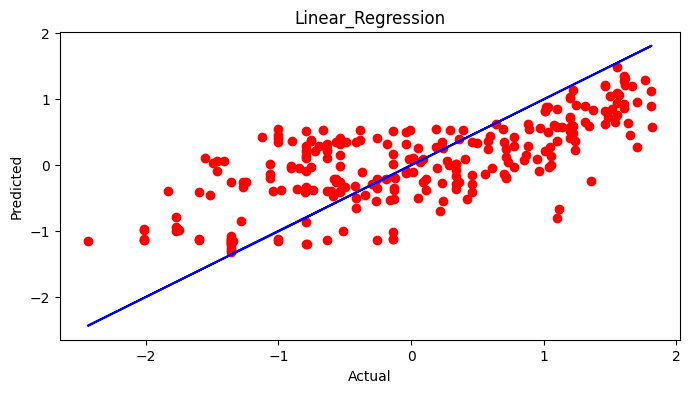

Model: Ridge_
R2 score: 0.5053173228122113
Mean absolute error: 0.6010212148196842
Mean squared error: 0.522371792063785
Root Mean Squared Error: 0.7227529260153742


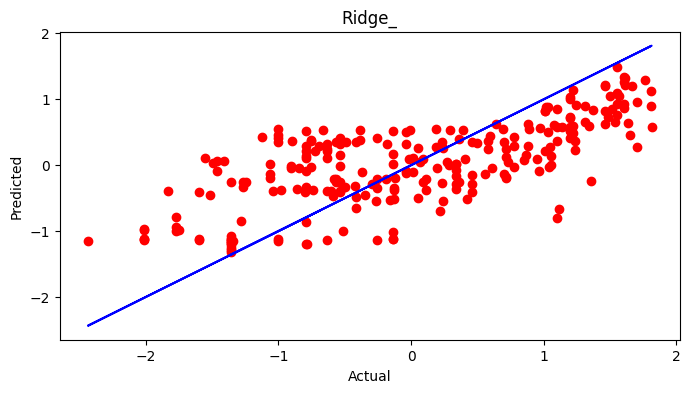

Model: Lasso_
R2 score: -0.0011663245229034391
Mean absolute error: 0.879340363029126
Mean squared error: 1.0572050957353634
Root Mean Squared Error: 1.0282047927020004


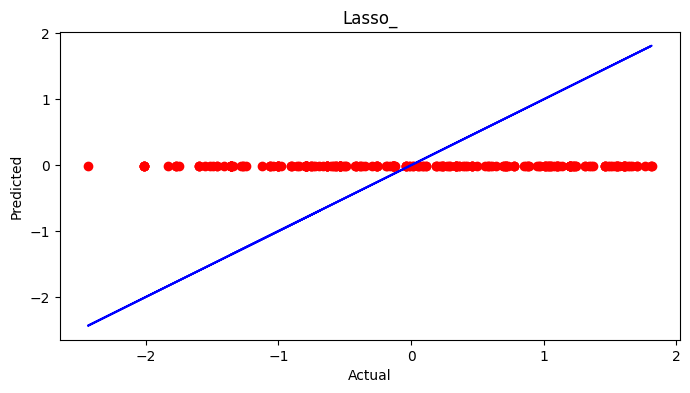

Model: Elastic_Net
R2 score: 0.004014127481485108
Mean absolute error: 0.8770869123015028
Mean squared error: 1.0517346757630757
Root Mean Squared Error: 1.0255411623933364


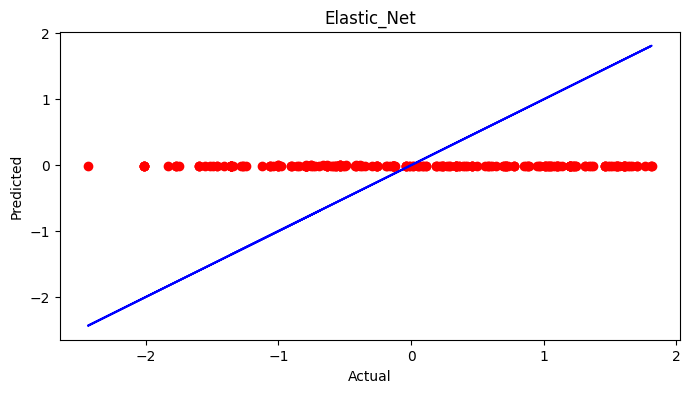

Model: SGD_Regressor
R2 score: 0.5045704117933698
Mean absolute error: 0.6021216404202987
Mean squared error: 0.5231605102975474
Root Mean Squared Error: 0.723298354966709


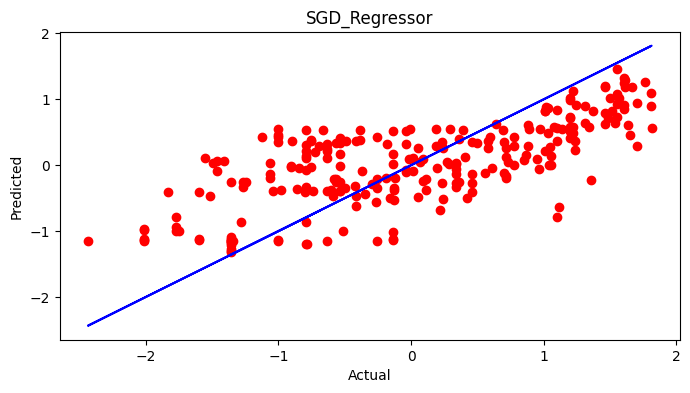

Model: Decision_Tree_Regressor
R2 score: 0.6916481551340701
Mean absolute error: 0.4083659285112886
Mean squared error: 0.3256113731422293
Root Mean Squared Error: 0.5706236703311819


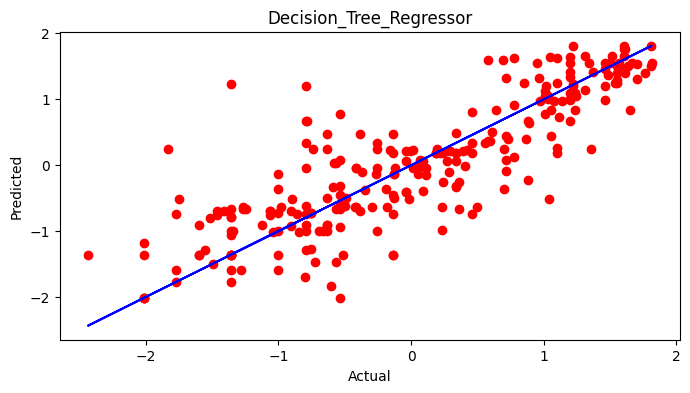

Model: Random_Forest_Regressor
R2 score: 0.8334016934755553
Mean absolute error: 0.29310408178198977
Mean squared error: 0.17592339482898356
Root Mean Squared Error: 0.41943222912525874


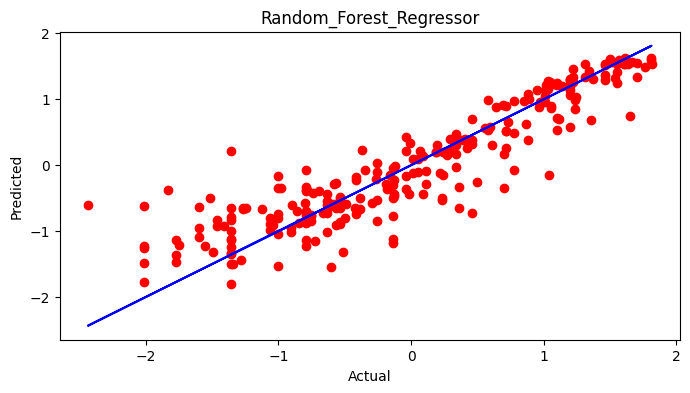

Model: Gradient_Boosting_Regressor
R2 score: 0.8324037083628438
Mean absolute error: 0.30652059403733545
Mean squared error: 0.17697724064938639
Root Mean Squared Error: 0.42068662998648576


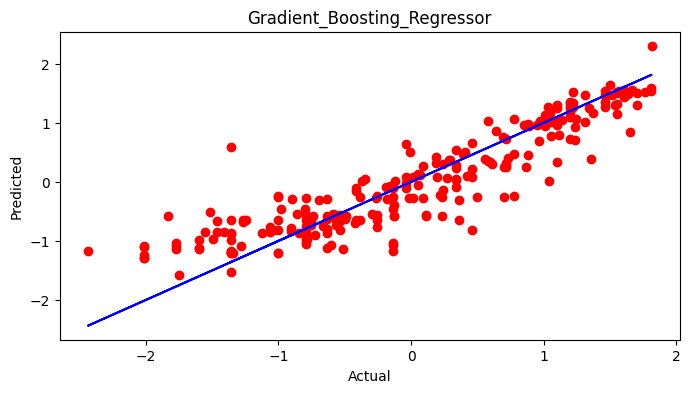

Model: AdaBoost_Regressor
R2 score: 0.763703001568967
Mean absolute error: 0.38547348838703005
Mean squared error: 0.2495233656278901
Root Mean Squared Error: 0.4995231382307431


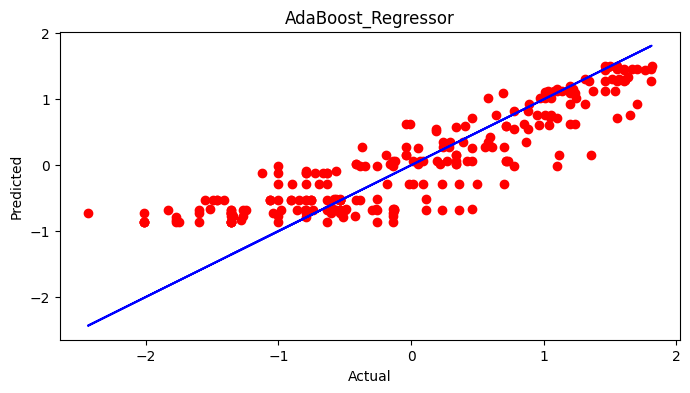

Model: Bagging_Regressor
R2 score: 0.8198047931704928
Mean absolute error: 0.3112074655219231
Mean squared error: 0.19028136106957586
Root Mean Squared Error: 0.43621251824033647


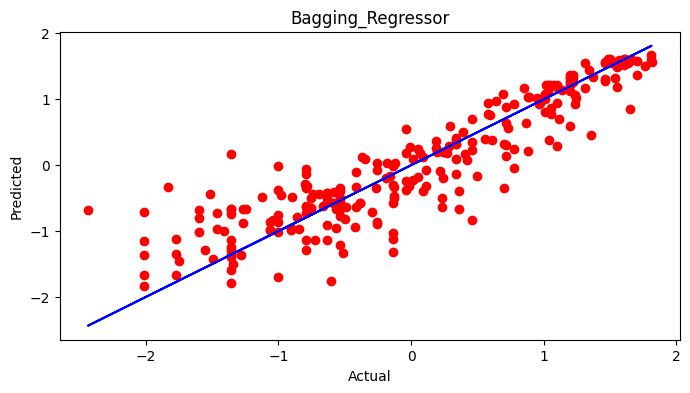

Model: XGBoost_Regressor
R2 score: 0.8518498234204718
Mean absolute error: 0.29278199885497647
Mean squared error: 0.15644265870469562
Root Mean Squared Error: 0.39552832857419407


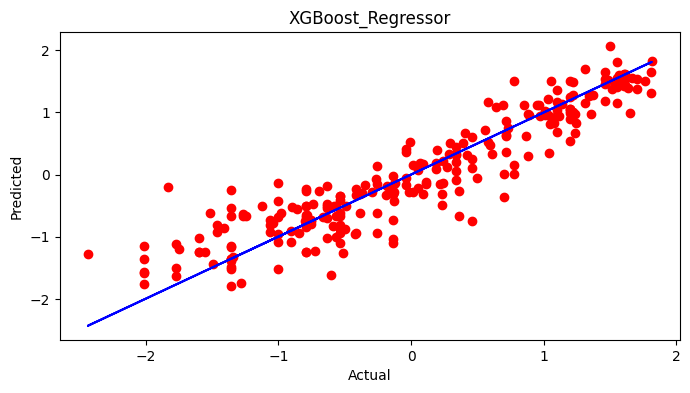

In [ ]:

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

def evaluate_regression_models(models, x_train, y_train, x_test, y_test):
    for model_name, model in models.items():
        evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name)

def evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name):
    # Create and fit the regression model
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, r2, mae, mse, rmse]
    # Print evaluation metrics
    print(f"\033[1mModel: {model_name}\033[0m")
    print("R2 score:", r2)
    print("Mean absolute error:", mae)
    print("Mean squared error:", mse)
    print("Root Mean Squared Error:", rmse)

    # Plot the actual vs. predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(x=y_test, y=predictions, color='red')
    plt.plot(y_test, y_test, color='b')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(model_name)
    plt.show()

# Define the list of regression models to evaluate
regression_models = {
    "Linear_Regression": LinearRegression(),
    "Ridge_": Ridge(),
    "Lasso_": Lasso(),
    "Elastic_Net": ElasticNet(),
    "SGD_Regressor": SGDRegressor(),
    "Decision_Tree_Regressor": DecisionTreeRegressor(),
    "Random_Forest_Regressor": RandomForestRegressor(),
    "Gradient_Boosting_Regressor": GradientBoostingRegressor(),
    "AdaBoost_Regressor": AdaBoostRegressor(),
    "Bagging_Regressor": BaggingRegressor(),
    "XGBoost_Regressor": XGBRegressor(),
}

# Example usage to evaluate multiple regression models
evaluate_regression_models(regression_models, x_train, y_train, x_test, y_test)

In [ ]:
results_df

Model  R2 Score  Mean Absolute Error  \
0             Linear_Regression  0.505428             0.600847   
1                        Ridge_  0.505317             0.601021   
2                        Lasso_ -0.001166             0.879340   
3                   Elastic_Net  0.004014             0.877087   
4                 SGD_Regressor  0.504570             0.602122   
5       Decision_Tree_Regressor  0.691648             0.408366   
6       Random_Forest_Regressor  0.833402             0.293104   
7   Gradient_Boosting_Regressor  0.832404             0.306521   
8            AdaBoost_Regressor  0.763703             0.385473   
9             Bagging_Regressor  0.819805             0.311207   
10            XGBoost_Regressor  0.851850             0.292782   

    Mean Squared Error  Root Mean Squared Error  
0             0.522255                 0.722672  
1             0.522372                 0.722753  
2             1.057205                 1.028205  
3             1.051735                 1.025541  
4             0.523161                 0.723298  
5             0.325611                 0.570624  
6             0.175923                 0.419432  
7             0.176977                 0.420687  
8             0.249523                 0.499523  
9             0.190281                 0.436213  
10            0.156443                 0.395528

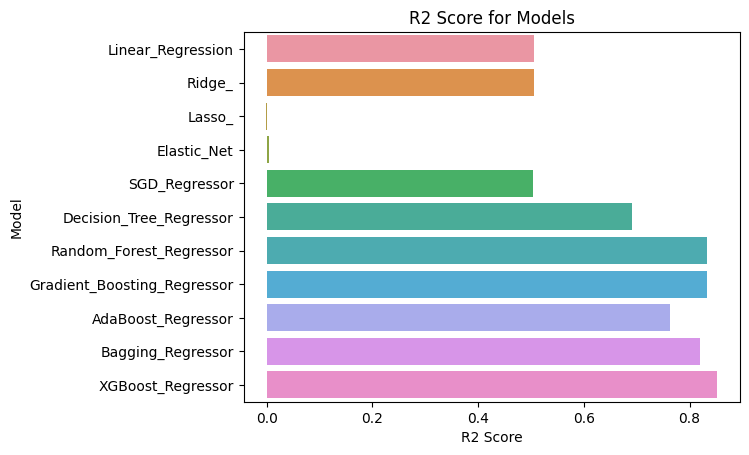

In [ ]:
sns.barplot(data=results_df, y='Model', x='R2 Score')
plt.title('R2 Score for Models')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

**Based on the provided observation of different regression models and their performance metrics:**

* XGBoost Regressor has the highest R2 score of 0.851850, indicating strong predictive capability. It also has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), which suggests it provides the best overall performance among the models.

* Random Forest Regressor follows closely with an R2 score of 0.833402. It also exhibits relatively low MAE, MSE, and RMSE, making it a strong performer for this dataset.

* Gradient Boosting Regressor demonstrates a high R2 score of 0.832404, closely matching Random Forest Regressor. Its MAE, MSE, and RMSE values are also competitive, making it a reliable choice.

* Bagging Regressor and Decision Tree Regressor also perform well with R2 scores of 0.819805 and 0.691648, respectively. They offer a good balance between accuracy and performance metrics.

* AdaBoost Regressor achieves an R2 score of 0.763703, indicating good predictive capability. Its MAE and MSE values are reasonable, but its RMSE is slightly higher compared to the top-performing models.

* Linear Regression, Ridge, SGD Regressor, and Elastic Net show R2 scores around 0.50, suggesting moderate predictive performance. However, their MAE, MSE, and RMSE values are relatively higher compared to the top-performing models.

* Lasso Regressor exhibits a negative R2 score (-0.001166), which implies that the model doesn't fit the data well and performs poorly for this dataset.

**In conclusion, XGBoost Regressor appears to be the best-performing model, closely followed by Random Forest Regressor and Gradient Boosting Regressor, based on the provided metrics. These models have the highest R2 scores and the lowest error metrics, making them suitable choices for regression tasks on this dataset.**

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">K-Fold Cross-Validation</b>
 </div>

In [ ]:
from sklearn.model_selection import cross_val_score

# Create a function to evaluate regression models using cross-validation
def evaluate_regression_models_with_cv(models, x, y, cv=5):
    results_df = pd.DataFrame(columns=['Model', 'R2 Score (Mean)', 'R2 Score (Std)'])

    for model in models:
        model_name = type(model).__name__

        if model_name == 'SVR':
            # For SVR, loop through different kernel options
            for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
                svr_model = SVR(kernel=kernel)
                r2_scores = cross_val_score(svr_model, x, y, cv=cv, scoring='r2')
                results_df.loc[len(results_df)] = [model_name + f" ({kernel} kernel)", r2_scores.mean(), r2_scores.std()]
        else:
            r2_scores = cross_val_score(model, x, y, cv=cv, scoring='r2')
            results_df.loc[len(results_df)] = [model_name, r2_scores.mean(), r2_scores.std()]

    return results_df

# Define the list of regression models to evaluate
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SGDRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    XGBRegressor(),
]

# Example usage to evaluate multiple regression models using cross-validation
results = evaluate_regression_models_with_cv(regression_models, x1, y1, cv=5)

# Display the results
print(results)

                        Model  R2 Score (Mean)  R2 Score (Std)
0            LinearRegression         0.441189        0.028265
1                       Ridge         0.441249        0.028278
2                       Lasso        -0.006170        0.006793
3                  ElasticNet         0.010778        0.011751
4                SGDRegressor         0.442214        0.027546
5       DecisionTreeRegressor         0.637820        0.035217
6       RandomForestRegressor         0.776321        0.024764
7   GradientBoostingRegressor         0.790501        0.019877
8           AdaBoostRegressor         0.733532        0.021617
9            BaggingRegressor         0.769071        0.021039
10               XGBRegressor         0.769663        0.023458


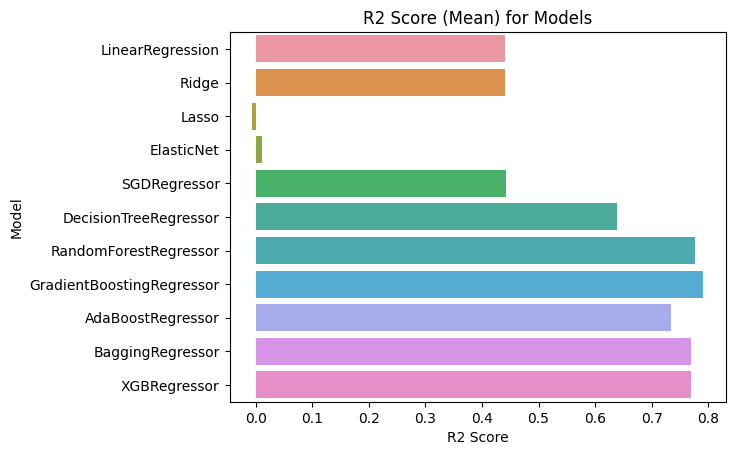

In [ ]:
sns.barplot(data=results, y='Model', x='R2 Score (Mean)')
plt.title('R2 Score (Mean) for Models')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

<div style="background-color: #D2E3C8; padding: 10px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Hyper tunning</b>
 </div>

In [ ]:
%%time
# Split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()

# Initialize GridSearchCV with the GradientBoostingRegressor model and hyperparameter grid
gridsearch_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=10, scoring='r2')

# Fit the model to find the best parameters
gridsearch_gb.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params_gb = gridsearch_gb.best_params_

# Create a GradientBoostingRegressor with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params_gb)

# Fit the best GradientBoostingRegressor on the training data
best_gb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gb = best_gb_model.predict(x_test)

# Evaluate the best model
r2_score_gb = r2_score(y_test, y_pred_gb)
print('Best R-squared Score (GradientBoostingRegressor):', r2_score_gb)

Best R-squared Score (GradientBoostingRegressor): 0.8062288778017418
CPU times: user 23min 19s, sys: 1.24 s, total: 23min 20s
Wall time: 23min 44s


In [ ]:
%%time
# Split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x1, y1, random_state=42, test_size=0.30)

# Define the hyperparameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV with the RandomForestRegressor model and hyperparameter grid
gridsearch_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='r2')

# Fit the model to find the best parameters
gridsearch_rf.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params_rf = gridsearch_rf.best_params_

# Create a RandomForestRegressor with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf)

# Fit the best RandomForestRegressor on the training data
best_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf_model.predict(x_test)

# Evaluate the best model
r2_score_rf = r2_score(y_test, y_pred_rf)
print('Best R-squared Score (RandomForestRegressor):', r2_score_rf)

Best R-squared Score (RandomForestRegressor): 0.8067184614110017
CPU times: user 22min, sys: 4.01 s, total: 22min 4s
Wall time: 22min 24s


After undergoing this process, the conclusion is that RandomForestRegressor outperforms the other models, primarily because it not only has a higher R-squared score but also exhibits superior error performance compared to the alternatives

In [ ]:
#Saving the Predictive Regressor Model using joblib:

from joblib import dump

# Saving the model to a file
filename = 'Global_Power_Plant_Database_Project.joblib'
dump(best_rf_model, filename)

['Global_Power_Plant_Database_Project.joblib']

In [ ]:
#Predict using the saved model:

from joblib import load

# Loading the saved model from a file
loaded_model_r = load(filename)

# Making predictions using the loaded model
predictions = loaded_model_r.predict(x_test)

predictions

array([-0.5995586 , -0.59982157,  0.50265885,  0.0322802 ,  0.34221916,
       -1.12323218,  0.39771111, -0.2478183 , -0.99191607,  0.04451628,
       -0.54279938,  1.19096251, -0.04761392,  1.23134306, -0.17850394,
        1.5729822 , -0.25237294, -0.57085908, -1.53061119,  0.51314646,
        1.59324095, -0.06073661, -0.92957376, -0.40141211, -1.05565776,
       -0.57522842,  1.05337608, -0.53959879,  1.14870905, -0.5991595 ,
       -1.01943074,  0.73889548, -0.60518764,  0.00532408,  1.23944365,
       -1.05237047,  1.08376825, -0.17213028,  1.36679213,  0.25291737,
       -0.24200019, -0.48902617, -0.95153541, -0.88767244,  1.420677  ,
       -0.06992616, -1.27984561, -0.75460983,  1.20047708, -0.37290464,
        1.36779303, -0.31518442, -0.04242848,  0.59725908, -0.1131207 ,
       -0.06637554,  0.05161566, -0.62501095,  0.33514988, -0.76910341,
        1.48754366, -0.52028862, -0.64426919, -0.21875431, -0.56846042,
        0.42329428, -0.05277506,  0.53468043,  0.2389131 , -0.56

In [ ]:
# Predict with the regressor model
predicted = best_rf_model.predict(x_test)

# Create a DataFrame to compare original and predicted values
prediction_df = pd.DataFrame({'Original':y_test, 'Predicted': predicted})

# Display the DataFrame
print(prediction_df)



     Original  Predicted
40  -0.450186  -0.599559
260 -0.663656  -0.599822
326  0.340134   0.502659
97   0.046035   0.032280
204  1.115121   0.342219
..        ...        ...
177  0.220476   0.401241
6   -0.034701  -0.246145
589  1.277110   0.619016
456  0.576421   0.408806
245 -0.134021  -0.629237

[254 rows x 2 columns]


**Explanation:**

The dataset provided encompasses a wealth of information regarding 908 power plants in India. Each power plant is precisely geolocated, and the dataset includes details on plant capacity, generation, ownership, and fuel type. Utilizing data from 2013 to 2017 and various other variables, we constructed models to predict both the fuel type and electrical generating capacity in megawatts.

Within the dataset, the primary fuel category comprises eight distinct fuel types. After a thorough data analysis, I developed classification models. Among these, the Extra Trees Classifier achieved the highest accuracy of 93.75% for fuel type prediction, and I preserved this model for future use. The second aspect of our predictive task involved forecasting the electrical generating capacity in megawatts, a continuous data type. I established different regression models for this purpose. Notably, the best_gb_model delivered the most accurate predictions with an 76% accuracy rate.




